## DATA DICTIONARY
#### * All columns have been mentioned below along with description provided by MachineHack competetion.

MONTH: Month </br>
DAY_OF_WEEK: Day of Week </br>
DEP_DEL15: TARGET Binary of a departure delay over 15 minutes (1 is yes)</br>
DISTANCE_GROUP: Distance group to be flown by departing aircraft</br>
DEP_BLOCK: Departure block</br>
SEGMENT_NUMBER: The segment that this tail number is on for the day</br>
CONCURRENT_FLIGHTS: Concurrent flights leaving from the airport in the same departure block</br>
NUMBER_OF_SEATS: Number of seats on the aircraft</br>
CARRIER_NAME: Carrier</br>
AIRPORT_FLIGHTS_MONTH: Avg Airport Flights per Month</br>
AIRLINE_FLIGHTS_MONTH: Avg Airline Flights per Month</br>
AIRLINE_AIRPORT_FLIGHTS_MONTH: Avg Flights per month for Airline AND Airport</br>
AVG_MONTHLY_PASS_AIRPORT: Avg Passengers for the departing airport for the month</br>
AVG_MONTHLY_PASS_AIRLINE: Avg Passengers for the airline for the month</br>
FLT_ATTENDANTS_PER_PASS: Flight attendants per passenger for airline</br>
GROUND_SERV_PER_PASS: Ground service employees (service desk) per passenger for airline</br>
PLANE_AGE: Age of departing aircraft</br>
DEPARTING_AIRPORT: Departing Airport</br>
LATITUDE: Latitude of departing airport</br>
LONGITUDE: Longitude of departing airport</br>
PREVIOUS_AIRPORT: Previous airport that aircraft departed from</br>
PRCP: Inches of precipitation for the day</br>
SNOW: Inches of snowfall for the day</br>
SNWD: Inches of snow on the ground for the day</br>
TMAX: Max temperature for the day</br>
AWND: Max wind speed for the day</br>

## Required libraries are imported

In [1]:
!pip install dython
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler, StandardScaler, MinMaxScaler, LabelEncoder
from dython.nominal import associations
from dython.nominal import identify_nominal_columns
%matplotlib inline

In [2]:
pd.get_option("display.max_columns")
df = pd.read_csv('./Participants_data/participants_dataset_DES.csv')
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

In [3]:
df.head()

,AIRPLANE_ID,YEAR,MONTH,DAY_OF_WEEK,DEP_DEL15,DEP_TIME_BLK,DISTANCE_GROUP,SEGMENT_NUMBER,CONCURRENT_FLIGHTS,NUMBER_OF_SEATS,CARRIER_NAME,AIRPORT_FLIGHTS_MONTH,AIRLINE_FLIGHTS_MONTH,AIRLINE_AIRPORT_FLIGHTS_MONTH,AVG_MONTHLY_PASS_AIRPORT,AVG_MONTHLY_PASS_AIRLINE,FLT_ATTENDANTS_PER_PASS,GROUND_SERV_PER_PASS,PLANE_AGE,DEPARTING_AIRPORT,LATITUDE,LONGITUDE,PREVIOUS_AIRPORT,PRCP,SNOW,SNWD,TMAX,AWND
0,608900,2020.0,1.0,4,0,0800-0859,NaN,3.0,22.0,NaN,Southwest Airlines Co.,4728.0,107363.0,NaN,2711399.0,13382999.0,0.000061,NaN,11.0,Minneapolis-St Paul International,33.291,-75.177,McCarran International,NaN,NaN,0.0,NaN,NaN
1,211610,2020.0,1.0,4,0,0600-0659,5.0,3.0,25.0,76.0,Southwest Airlines Co.,NaN,61899.0,189.0,1022110.0,3027151.0,0.000116,0.000099,2.0,Dallas Fort Worth Regional,34.163,-71.006,Orlando International,0.00,NaN,0.0,57.0,4.93
2,566705,NaN,1.0,4,0,1200-1259,3.0,NaN,19.0,174.0,United Air Lines Inc.,NaN,45432.0,94.0,1686287.0,2742196.0,0.000000,0.000099,11.0,Norfolk International,29.534,-81.622,Chicago Midway International,NaN,0.0,0.0,77.0,7.58
3,338088,2020.0,NaN,3,1,1000-1059,7.0,NaN,NaN,143.0,Southwest Airlines Co.,4150.0,NaN,684.0,165157.0,13382999.0,NaN,0.000099,6.0,Dallas Fort Worth Regional,38.836,-91.015,Syracuse Hancock International,0.00,0.0,1.2,39.0,6.98
4,216070,2020.0,1.0,3,1,2200-2259,NaN,NaN,28.0,49.0,Delta Air Lines Inc.,7565.0,23248.0,277.0,1485501.0,11680845.0,0.000098,0.000177,NaN,Newark Liberty International,36.090,-95.852,Los Angeles International,0.34,0.4,NaN,35.0,13.79


In [4]:
df.shape

(200000, 28)

### * Here we do our first feature engineering
### * We have the column previous_airport which has lot of unique values and we need to club the airport according to the states so interpretation can be done easily.
### * we start with defining all the satates and select the aiports that fall under those states.
### * add the respective airports to the list of its respective state.
### * now we replace all the airport names with the satate which will be much easier to interpert the air traffic and frequency of air traffic.
### * we now drop the previous airport and use the new column 'previous_airport_region'

In [5]:
len(df.PREVIOUS_AIRPORT.unique())

331

In [6]:
alabama = ['Dannelly Field', 'Birmingham Airport', 'Dothan Regional',
           'Huntsville International-Carl T Jones Field', 'Mobile Regional']
alaska = ['Cordova Mile 13', 'Anchorage International', 'Bethel Airport',
          'Fairbanks International', 'Juneau International',
          'Ketchikan International', 'Kodiak Airport', 'Ralph Wien Memorial',
          'Nome Airport', 'Wiley Post/Will Rogers Memorial']
arizona = ['Williams Gateway', 'Prescott Municipal', 'Flagstaff Pulliam',
           'Phoenix Sky Harbor International', 'Tucson International',
           'Douglas Municipal', 'Yuma MCAS/Yuma International']
arkansas = ['Searcy Field', 'Northwest Arkansas Regional', 'Fort Smith Regional',
            'Adams Field', 'Texarkana Muni/Webb Field']
california = ['Arcata', 'Meadows Field', 'Hollywood-Burbank Midpoint',
              'Fresno Air Terminal', 'Long Beach Daugherty Field',
              'Los Angeles International', 'Mammoth Lakes Airport',
              'Monterey Peninsula', 'Metropolitan Oakland International',
              'Ontario International', 'Orange County',
              'Palm Springs International', 'Redding Municipal',
              'Sacramento International', 'San Diego International Lindbergh Fl',
              'San Francisco International', 'San Jose International',
              'San Luis Obispo County Regional',
              'Santa Maria Public/Capt. G. Allan Hancock Field', 'Santa Barbara Municipal',
              'Charles M. Schulz - Sonoma County', 'Stockton Metropolitan']
colorado = ['La Plata County', 'Stapleton International',
            'Aspen Pitkin County Sardy Field', 'Eagle County Regional',
            'Walker Field', 'Gunnison-Crested Butte Regional', 'Yampa Valley',
            'Montrose Regional', 'Pueblo Memorial']
connecticut = ['Bradley International', 'Tweed New Haven']
florida = ['Charlotte County', 'Tallahassee Regional', 'Palm Beach International',
           'Daytona Beach Regional', 'Fort Lauderdale-Hollywood International',
           'Southwest Florida International', 'Gainesville Regional',
           'Jacksonville International', 'Tampa International', 'Key West International',
           'Melbourne Regional', 'Miami International', 'Orlando International',
           'Northwest Florida Regional', 'Northwest Florida Beaches International',
           'Pensacola Regional', 'Sanford NAS', 'Sarasota/Bradenton Airport',
           'St. Petersburg-Clearwater International']
georgia = ['Peterson Field', 'Glynco Jetport', 'Southwest Georgia Regional',
           'Bush Field', 'Savannah/Hilton Head International', 'Valdosta Regional',
           'Atlanta Municipal']
guam = ['Agana Field']
hawaii = ['General Lyman Field',  'Kahului Airport', 'Keahole', 'Lihue Airport', 'Honolulu International']
idaho = ['Boise Air Terminal', 'Friedman Memorial', 'Fanning Field',
         'Lewiston Nez Perce County', 'Pocatello Regional',
         'Joslin Field - Magic Valley Regional']
illinois = ['Scott AFB', 'Central Illinois Regional',
            'University of Illinois/Willard', 'Chicago Midway International',
            "Chicago O'Hare International", 'Quad City International',
            'Greater Peoria', 'Quincy Regional-Baldwin Field',
            'Chicago/Rockford International']
indiana = ['Rochester Monroe County', 'Michiana Regional',
           'Evansville Dress Regional', 'Fort Wayne Municipal',
           'Indianapolis Muni/Weir Cook']
iowa = ['Cedar Rapids Municipal', 'Des Moines Municipal',  'Dubuque Regional',
        'Sioux City Gateway', 'Waterloo Regional']
kansas = ['Liberal Municipal', 'Garden City Municipal', 'Hays Municipal',
          'Manhattan Regional', 'Salina Municipal', 'Wichita Mid-Continent']
kentucky = ['Capital City', 'Cincinnati/Northern Kentucky International',
            'Blue Grass', 'Standiford Field', 'Barkley Regional']
louisiana = ['England AFB', 'Baton Rouge Metropolitan/Ryan Field',
             'Lafayette Regional', 'Lake Charles Regional', 'Monroe Regional',
             'Louis Armstrong New Orleans International', 'Shreveport Regional']
maine = ['Bangor International', 'Portland International Jetport']
massachusetts = ['Logan International', 'Worcester Regional']
maryland = ['Friendship International']
michigan = ['Kent County', 'Marquette County',  'Kincheloe AFB',
            'Phelps/Collins', 'Detroit Metro Wayne County', 'Delta County',
            'Bishop International', 'Ford', 'Houghton County Memorial',
            'Kalamazoo/Battle Creek International', 'Muskegon County',
            'Pellston Regional Airport of Emmet County', 'Cherry Capital']
minnesota = ['Bemidji Municipal', 'Brainerd/Crow Wing County',
             'Duluth International', 'Chisholm/Hibbing', 'Falls International',
             'Minneapolis-St Paul International', 'Rochester Municipal']
mississippi = ['Allen C Thompson Field', 'Golden Triangle Regional',
               'Gulfport-Biloxi International', 'Key Field']
missouri = ['Harry S Truman', 'Cape Girardeau Regional', 'Columbia Regional',
            'Joplin Municipal', 'Kansas City International',
            'Lambert-St. Louis International', 'Springfield-Branson National']
montana = ['Billings Logan International', 'Gallatin Field', 'Bert Mooney',
           'Great Falls International', 'Helena Regional',
           'Glacier Park International', 'Missoula International']
nebraska = ['Grand Island Air Park', 'Kearney Regional', 'Lincoln Airport',
            'North Platte Regional Airport Lee Bird Field', 'Eppley Airfield',
            'William B. Heilig Field']
nevada = ['Elko Regional', 'Reno/Tahoe International', 'McCarran International']
new_hampshire = ['Grenier Field/Manchester Municipal', 'Portsmouth Pease International']
new_jersey = ['Nafec Atlantic City', 'Newark Liberty International','Mercer County']
new_mexico = ['Albuquerque International Sunport', 'Lea County Hobbs',
              'Roswell International Air Center', 'Santa Fe Municipal']
new_york = ['Albany International', 'Greater Binghamton/Edwin A. Link Field',
            'Greater Buffalo International', 'Elmira/Corning Regional',
            'Ithaca Tompkins Regional', 'John F. Kennedy International',
            'LaGuardia', 'Long Island MacArthur', 'Stewart International',
            'Niagara Falls International', 'Plattsburgh International',
            'Syracuse Hancock International', 'Watertown International',
            'Westchester County']
north_carolina = ['Asheville Regional', 'Concord Regional',
                  'Fayetteville Regional/Grannis Field',
                  'Piedmont Triad International', 'Albert J Ellis',
                  'Craven County Regional', 'Raleigh-Durham International',
                  'Wilmington International']
north_dakota = ['Devils Lake Regional', 'Sloulin Field International',
                'Bismarck Municipal', 'Hector Field',
                'Grand Forks International', 'Jamestown Regional',
                'Minot International']
ohio = ['Columbus Metropolitan', 'Akron-Canton Regional',
        'Cleveland-Hopkins International', 'James M Cox/Dayton International',
        'Toledo Express', 'Port Columbus International']
oklahoma = ['Lawton-Fort Sill Regional', 'Will Rogers World', 'Tulsa International']
oregon = ['Medford Jackson County', 'Mahlon Sweet Field', 'North Bend Municipal',
          'Portland International', 'Roberts Field']
pennsylvania = ['State College Air Depot', 'Latrobe Airport',
                'Lehigh Valley International', 'Erie International',
                'Harrisburg International', 'Philadelphia International',
                'Pittsburgh International', 'Wilkes Barre Scranton International']
puerto_rico = ['Puerto Rico International', 'Ramey AFB', 'Ponce Airport', 'Capital']
rhode_island = ['Theodore Francis Green State']
south_carolina = ['Charleston International', 'Columbia Metropolitan', 'Greenville-Spartanburg',
                  'Hilton Head Airport', 'Myrtle Beach International']
south_dakota = ['Aberdeen Regional', 'Rapid City Regional', 'Joe Foss Field']
tennessee = ['Lovell Field', 'McGhee Tyson', 'Memphis International',
             'Nashville International', 'Tri-Cities Regional TN/VA']
texas = ['San Angelo Regional/Mathis Field', 'Del Rio International',
         'Abilene Regional', 'Amarillo International', 'Austin - Bergstrom International',
         'Brownsville South Padre Island International', 'Easterwood Field',
         'Corpus Christi International', 'Dallas Love Field',
         'Dallas Fort Worth Regional', 'El Paso International',
         'Valley International', 'William P Hobby', 'Robert Gray AAF',
         'Laredo AFB', 'East Texas Regional', 'Lubbock Regional',
         'McAllen Miller International', 'Midland Regional Air Trml',
         'San Antonio International', 'Tyler Pounds Regional',
         'Waco Regional', 'Sheppard AFB/Wichita Falls Municipal', 'Houston Intercontinental']
uthah = ['Cedar City Regional', 'Canyonlands Field', 'Provo Municipal',
         'Salt Lake City International', 'St George Municipal', 'Vernal Regional']
vermont = ['Burlington International']
virgin_islands = ['Alexander Hamilton']
virginia = ['Charlottesville Albemarle', 'Lynchburg Regional/Preston Glenn Field',
            'Patrick Henry International', 'Norfolk International', 'Roanoke Regional/Woodrum Field',
            'Shenandoah Valley Regional', 'Ronald Reagan Washington National',
            'Washington Dulles International']
washington = ['Jefferson County', 'Bellingham International', 'Tri Cities',
              'Seattle International', 'Spokane International',
              'Richmond International']
west_virginia = ['Benedum', 'Kanawha', 'Tri City', 'Greenbrier Valley']
wisconsin = ['Outagamie County Regional', 'Rhinelander/Oneida County',
             'General Mitchell Field', 'Eau Claire Municipal',
             'La Crosse Municipal', 'Truax Field','Central Wisconsin',
             'Austin Straubel International']
wyoming = ['General Brees Field', 'Cheyenne Regional/Jerry Olson Field',
           'Casper/Natrona County International', 'Yellowstone Regional',
           'Gillette Campbell County', 'Jackson Hole', 'Rock Springs Sweetwater County']
PREVIOUS_AIRPORT_REGION = list()
for k in df.PREVIOUS_AIRPORT:
    if k in alabama:
        PREVIOUS_AIRPORT_REGION.append('alabama')
    elif k in alaska:
        PREVIOUS_AIRPORT_REGION.append('alaska')
    elif k in arizona:
        PREVIOUS_AIRPORT_REGION.append('arizona')
    elif k in arkansas:
        PREVIOUS_AIRPORT_REGION.append('arkansas')
    elif k in california:
        PREVIOUS_AIRPORT_REGION.append('california')
    elif k in colorado:
        PREVIOUS_AIRPORT_REGION.append('colorado')
    elif k in connecticut:
        PREVIOUS_AIRPORT_REGION.append('connecticut')
    elif k in florida:
        PREVIOUS_AIRPORT_REGION.append('florida')
    elif k in georgia:
        PREVIOUS_AIRPORT_REGION.append('georgia')
    elif k in guam:
        PREVIOUS_AIRPORT_REGION.append('guam')
    elif k in hawaii:
        PREVIOUS_AIRPORT_REGION.append('hawaii')
    elif k in idaho:
        PREVIOUS_AIRPORT_REGION.append('idaho')
    elif k in illinois:
        PREVIOUS_AIRPORT_REGION.append('illinois')
    elif k in indiana:
        PREVIOUS_AIRPORT_REGION.append('indiana')
    elif k in iowa:
        PREVIOUS_AIRPORT_REGION.append('iowa')
    elif k in kansas:
        PREVIOUS_AIRPORT_REGION.append('kansas')
    elif k in kentucky:
        PREVIOUS_AIRPORT_REGION.append('kentucky')
    elif k in louisiana:
        PREVIOUS_AIRPORT_REGION.append('louisiana')
    elif k in maine:
        PREVIOUS_AIRPORT_REGION.append('maine')
    elif k in massachusetts:
        PREVIOUS_AIRPORT_REGION.append('massachusetts')
    elif k in maryland:
        PREVIOUS_AIRPORT_REGION.append('maryland')
    elif k in michigan:
        PREVIOUS_AIRPORT_REGION.append('michigan')
    elif k in minnesota:
        PREVIOUS_AIRPORT_REGION.append('minnesota')
    elif k in mississippi:
        PREVIOUS_AIRPORT_REGION.append('mississippi')
    elif k in missouri:
        PREVIOUS_AIRPORT_REGION.append('missouri')
    elif k in montana:
        PREVIOUS_AIRPORT_REGION.append('montana')
    elif k in nebraska:
        PREVIOUS_AIRPORT_REGION.append('nebraska')
    elif k in nevada:
        PREVIOUS_AIRPORT_REGION.append('nevada')
    elif k in new_hampshire:
        PREVIOUS_AIRPORT_REGION.append('new_hampshire')
    elif k in new_jersey:
        PREVIOUS_AIRPORT_REGION.append('new_jersey')
    elif k in new_mexico:
        PREVIOUS_AIRPORT_REGION.append('new_mexico')
    elif k in new_york:
        PREVIOUS_AIRPORT_REGION.append('new_york')
    elif k in north_carolina:
        PREVIOUS_AIRPORT_REGION.append('north_carolina')
    elif k in north_dakota:
        PREVIOUS_AIRPORT_REGION.append('north_dakota')
    elif k in ohio:
        PREVIOUS_AIRPORT_REGION.append('ohio')
    elif k in oklahoma:
        PREVIOUS_AIRPORT_REGION.append('oklahoma')
    elif k in oregon:
        PREVIOUS_AIRPORT_REGION.append('oregon')
    elif k in pennsylvania:
        PREVIOUS_AIRPORT_REGION.append('pennsylvania')
    elif k in puerto_rico:
        PREVIOUS_AIRPORT_REGION.append('puerto_rico')
    elif k in rhode_island:
        PREVIOUS_AIRPORT_REGION.append('rhode_island')
    elif k in south_carolina:
        PREVIOUS_AIRPORT_REGION.append('south_carolina')
    elif k in south_dakota:
        PREVIOUS_AIRPORT_REGION.append('south_dakota')
    elif k in tennessee:
        PREVIOUS_AIRPORT_REGION.append('tennessee')
    elif k in texas:
        PREVIOUS_AIRPORT_REGION.append('texas')
    elif k in uthah:
        PREVIOUS_AIRPORT_REGION.append('uthah')
    elif k in vermont:
        PREVIOUS_AIRPORT_REGION.append('vermont')
    elif k in virgin_islands:
        PREVIOUS_AIRPORT_REGION.append('virgin_islands')
    elif k in virginia:
        PREVIOUS_AIRPORT_REGION.append('virginia')
    elif k in washington:
        PREVIOUS_AIRPORT_REGION.append('washington')
    elif k in west_virginia:
        PREVIOUS_AIRPORT_REGION.append('west_virginia')
    elif k in wisconsin:
        PREVIOUS_AIRPORT_REGION.append('wisconsin')
    elif k in wyoming:
        PREVIOUS_AIRPORT_REGION.append('wyoming')
    else:
        PREVIOUS_AIRPORT_REGION.append(k)
df['PREVIOUS_AIRPORT_REGION'] = PREVIOUS_AIRPORT_REGION
df.PREVIOUS_AIRPORT_REGION.unique()

array(['nevada', 'florida', 'illinois', 'new_york', 'california', 'NONE',
       'michigan', 'washington', 'tennessee', 'texas', 'virginia',
       'georgia', 'ohio', 'missouri', 'minnesota', 'vermont', 'alabama',
       'oklahoma', 'wisconsin', 'kentucky', 'uthah', 'kansas', 'arkansas',
       'hawaii', 'arizona', 'colorado', 'indiana', 'south_carolina',
       'massachusetts', 'oregon', 'pennsylvania', 'alaska', 'iowa',
       'south_dakota', 'louisiana', 'montana', 'maryland', 'nebraska',
       'new_jersey', 'north_dakota', 'connecticut', 'north_carolina',
       'maine', 'idaho', 'puerto_rico', 'west_virginia', 'rhode_island',
       'new_mexico', 'wyoming', 'mississippi', 'new_hampshire',
       'virgin_islands', 'guam'], dtype=object)

# Dropping Insignificant variables

In [7]:
df.drop(['AIRPLANE_ID', 'YEAR', 'MONTH', 'LATITUDE', 'LONGITUDE', 'PREVIOUS_AIRPORT', 'DEP_TIME_BLK'], axis=1, inplace=True)

# NaN values handling

In [8]:
(df.isnull().sum() / df.shape[0]) * 100

DAY_OF_WEEK                       0.0
DEP_DEL15                         0.0
DISTANCE_GROUP                   20.0
SEGMENT_NUMBER                   20.0
CONCURRENT_FLIGHTS               20.0
NUMBER_OF_SEATS                  20.0
CARRIER_NAME                      0.0
AIRPORT_FLIGHTS_MONTH            20.0
AIRLINE_FLIGHTS_MONTH            20.0
AIRLINE_AIRPORT_FLIGHTS_MONTH    20.0
AVG_MONTHLY_PASS_AIRPORT         20.0
AVG_MONTHLY_PASS_AIRLINE         20.0
FLT_ATTENDANTS_PER_PASS          20.0
GROUND_SERV_PER_PASS             20.0
PLANE_AGE                        20.0
DEPARTING_AIRPORT                 0.0
PRCP                             20.0
SNOW                             20.0
SNWD                             20.0
TMAX                             20.0
AWND                             20.0
PREVIOUS_AIRPORT_REGION           0.0
dtype: float64

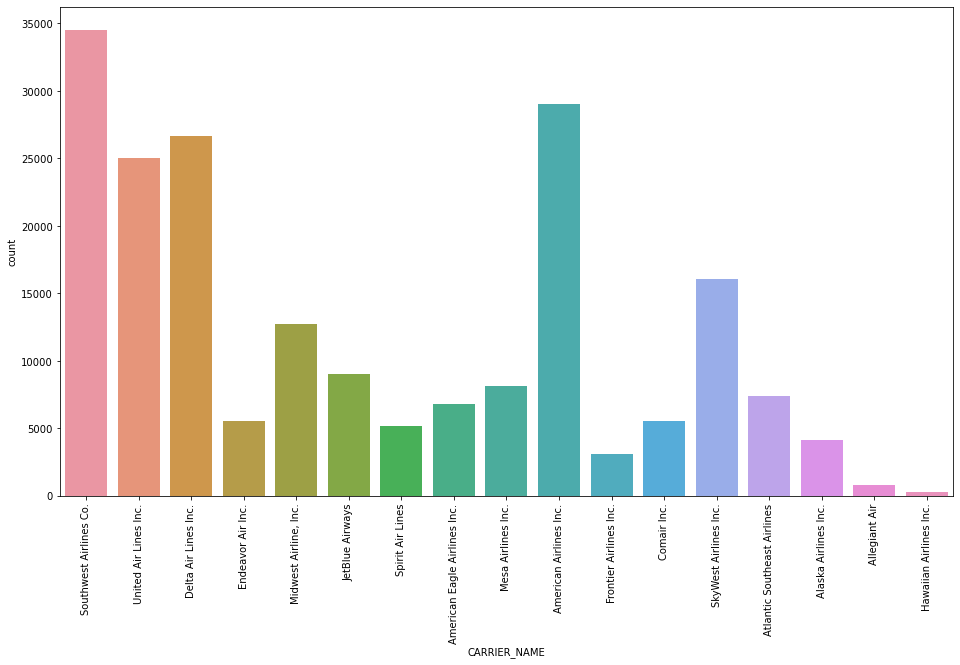

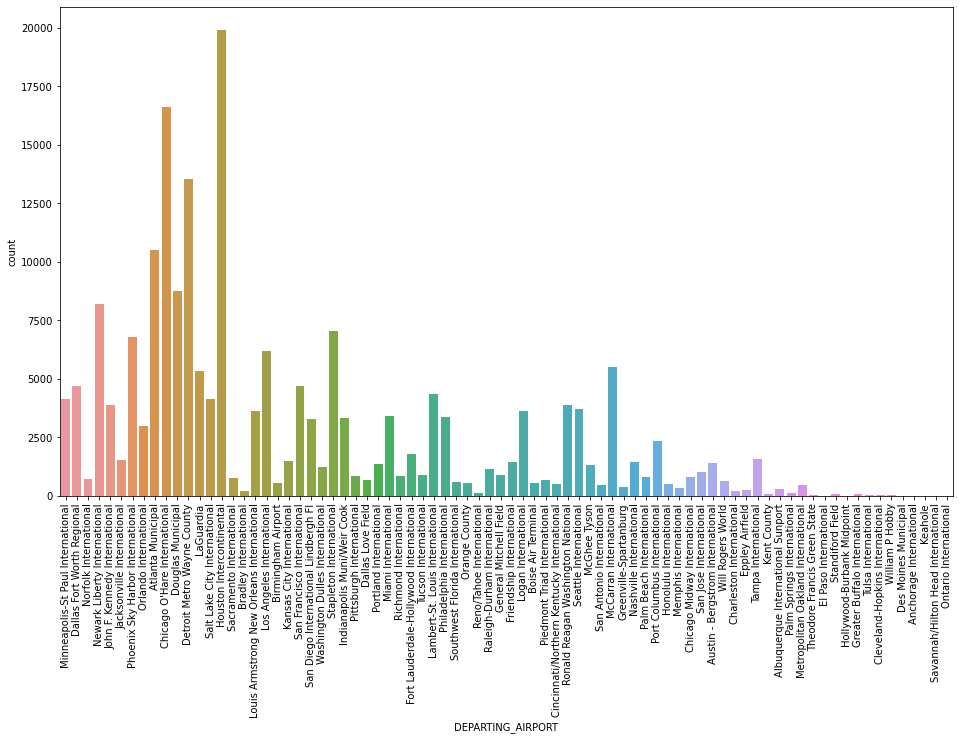

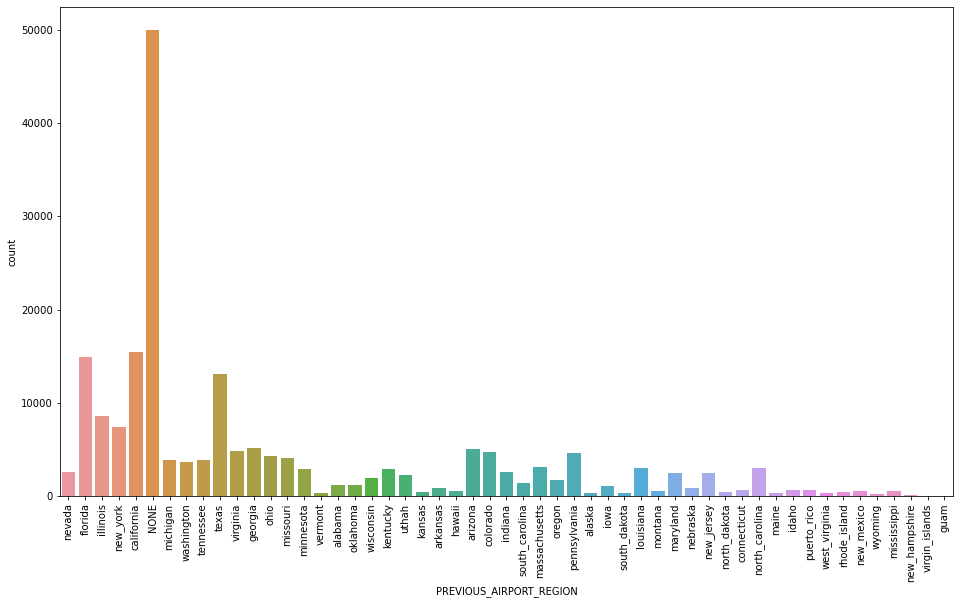

In [9]:
df_cat = df.select_dtypes(include='object')
for i in df_cat.columns:
    plt.figure(figsize=(16, 9))
    sns.countplot(data=df_cat, x=i)
    plt.xticks(rotation=90)
    plt.show()

### *From the above codes, we can infer that there are 20% null values in the following columns: -
### * Year, Month, Distance_group, Segment_score, concurrent_flight, number_of_seats, airport_flights_month, AIRLINE_FLIGHTS_MONTH, AIRLINE_AIRPORT_FLIGHTS_MONTH, AVG_MONTHLY_PASS_AIRPORT, AVG_MONTHLY_PASS_AIRLINE,
### *FLT_ATTENDANTS_PER_PASS, GROUND_SERV_PER_PASS, PLANE_AGE, PRCP, SNOW, SNWD, TMAX, AWND

# OUTLIERS

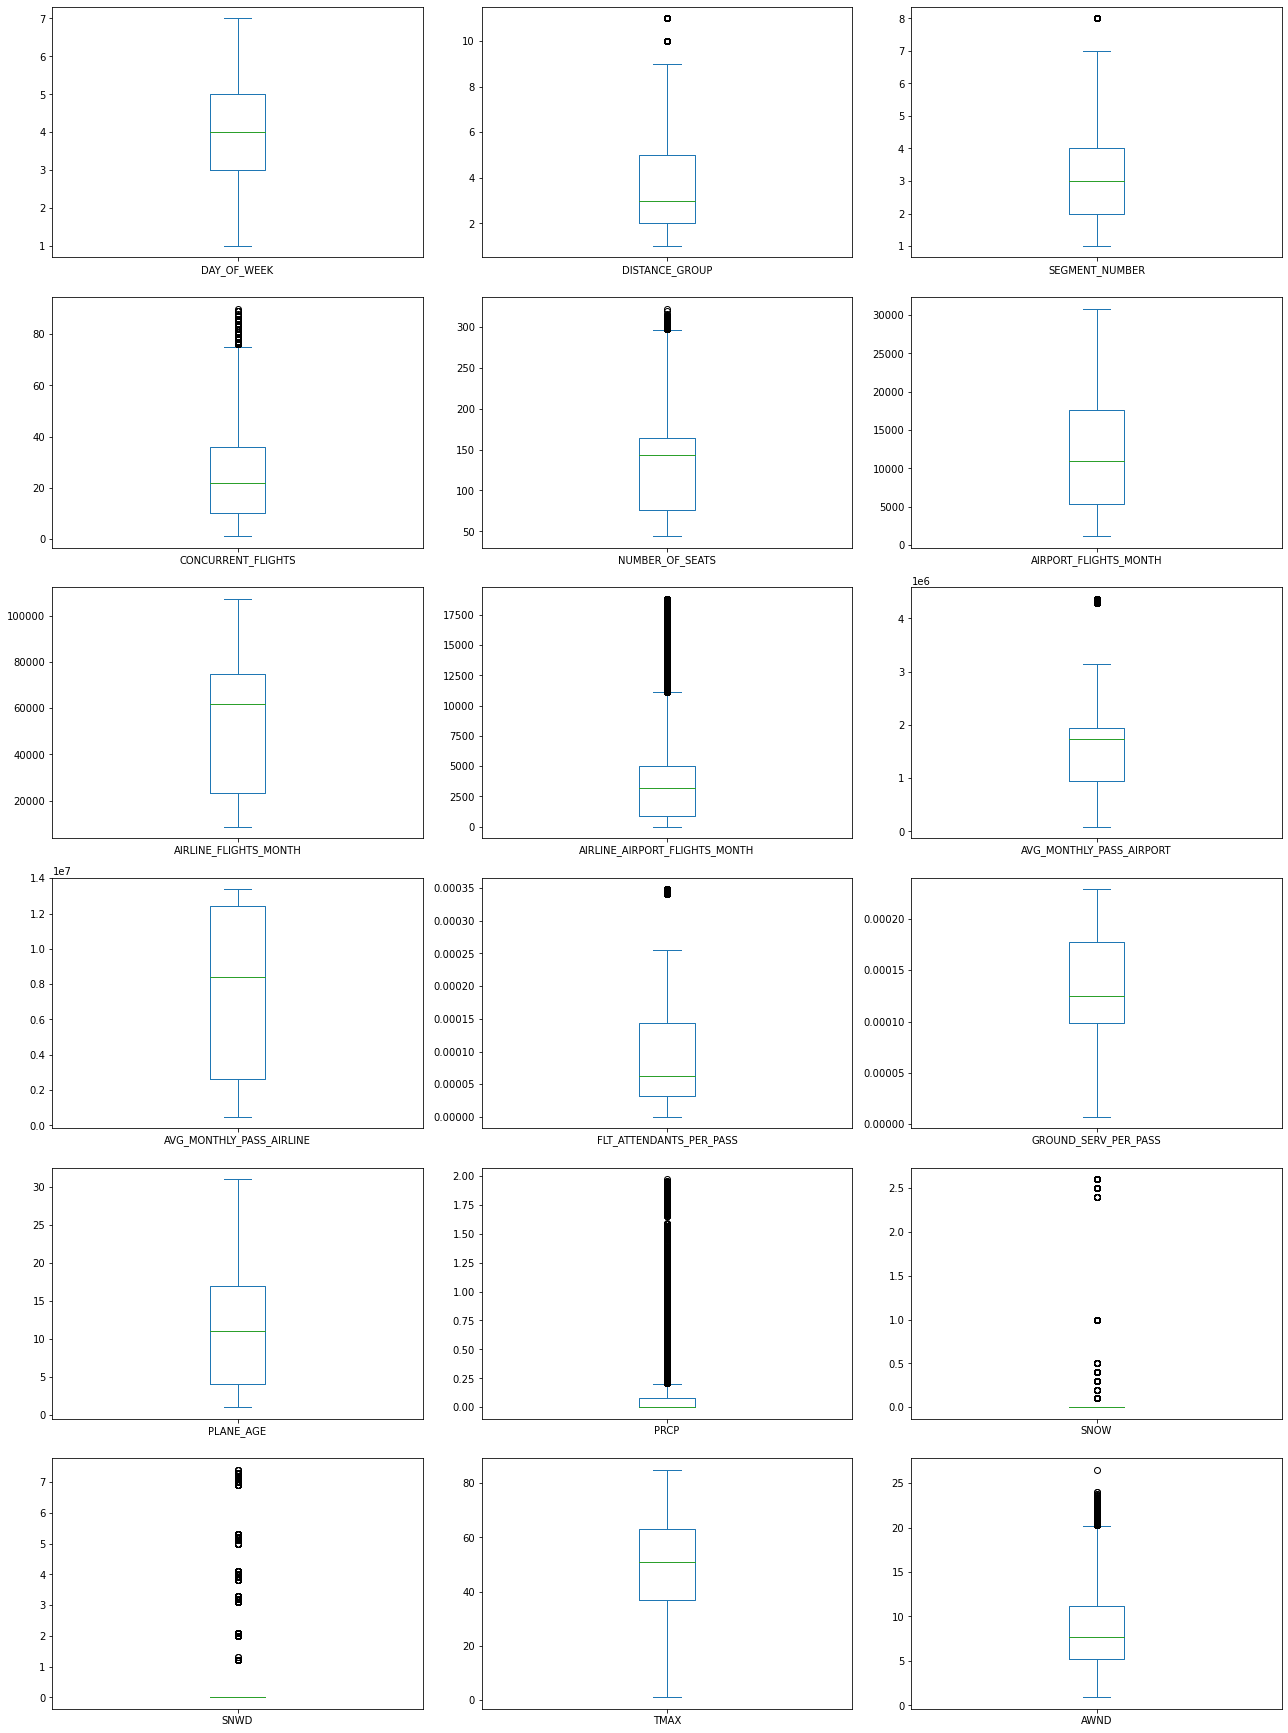

In [11]:
df.drop(columns=['DEP_DEL15'], axis=1).plot(kind='box', subplots=True, layout=(8, 3), figsize=(18, 32), sharex=False)
plt.tight_layout()
# For Checking The Outliers

### * We can see several columns have outliers so further analysis need to be done to understand nature of these outliers 

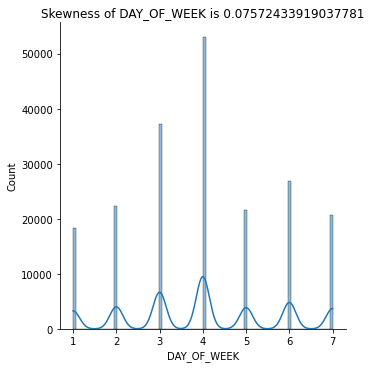

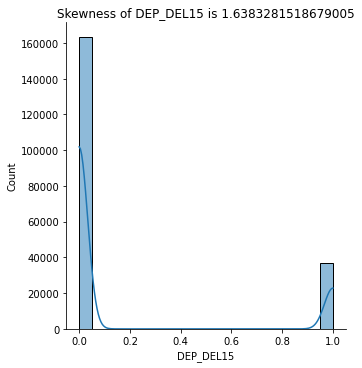

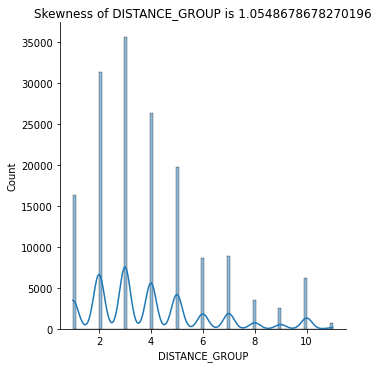

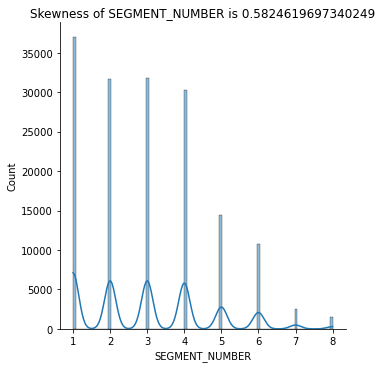

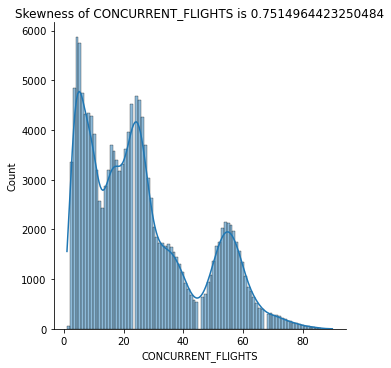

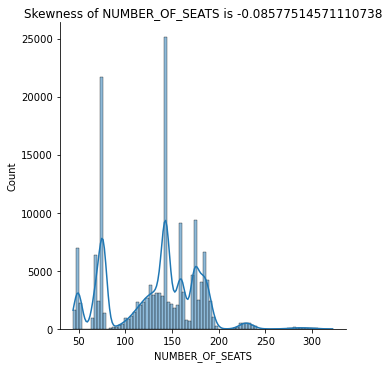

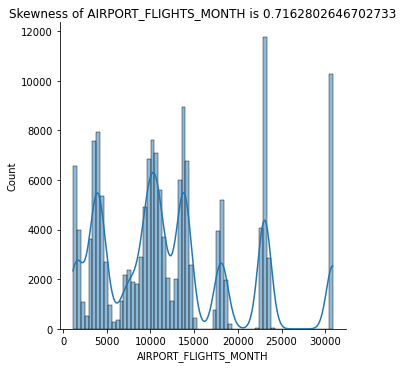

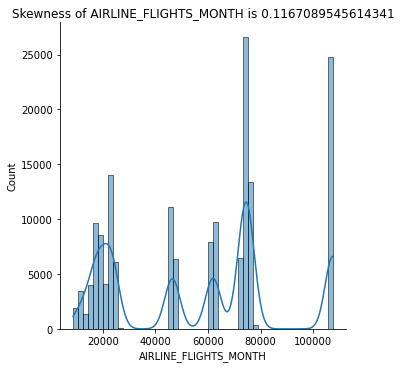

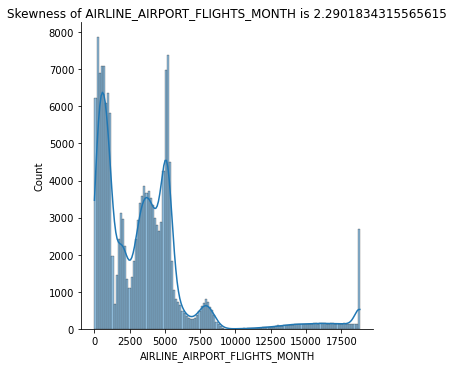

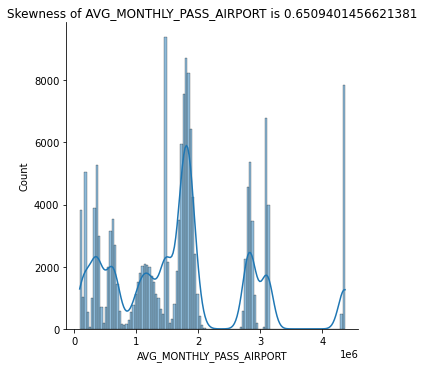

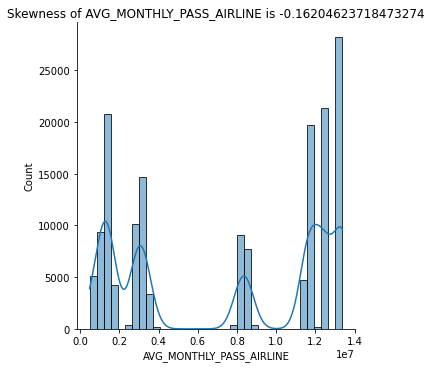

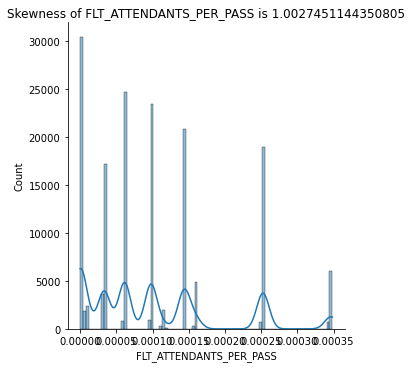

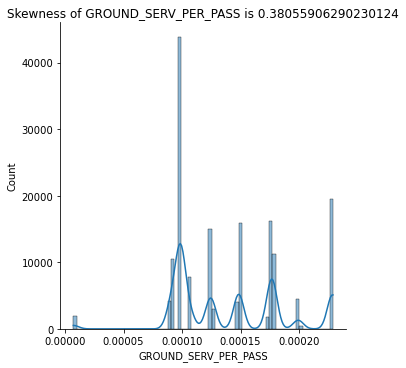

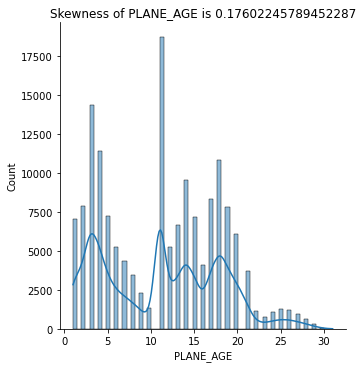

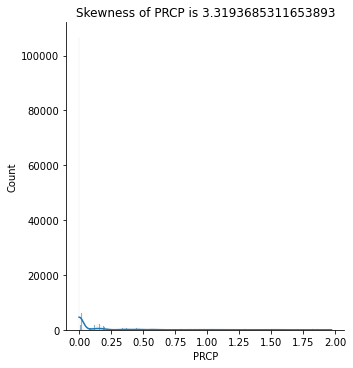

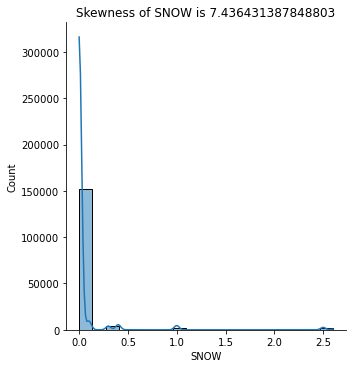

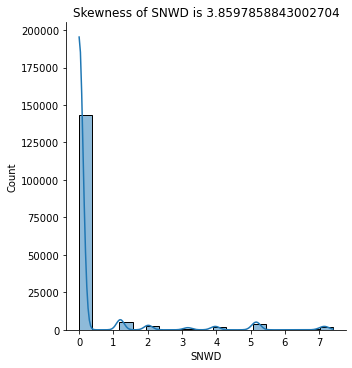

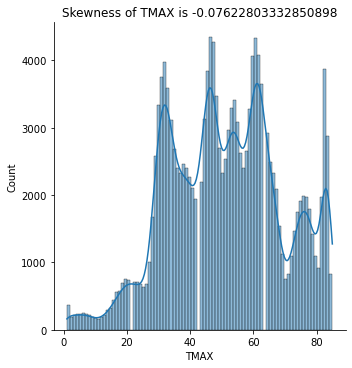

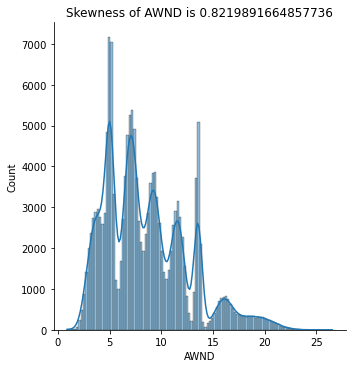

In [12]:
df_num = df.select_dtypes(include=np.number)
for i in df_num.columns:
    sns.displot(data=df_num, x=i, kde=True)
    plt.title(f'Skewness of {i} is {df_num[i].skew()}')
    plt.show()

# Null Value imputation

In [13]:
df['AVG_MONTHLY_PASS_AIRPORT'].dtypes  # Checking For Data Type 

dtype('float64')

C:\Users\shiva\.conda\envs\tf\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='AVG_MONTHLY_PASS_AIRPORT'>

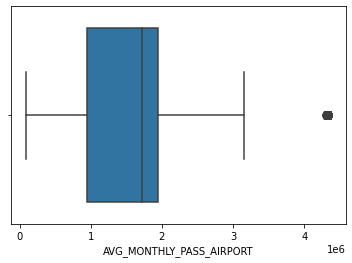

In [14]:
sns.boxplot(df['AVG_MONTHLY_PASS_AIRPORT'])  # Checking For Outliers so we Could know that how to deal with this variable 

In [15]:
df['AVG_MONTHLY_PASS_AIRPORT'] = df.AVG_MONTHLY_PASS_AIRPORT.replace(to_replace=np.nan, 
                                                                     value=round(df.AVG_MONTHLY_PASS_AIRPORT.median()))

In [16]:
df['AVG_MONTHLY_PASS_AIRPORT'].isnull().sum()
# So Here we found Outlier affected thats why we use Median method to remove Null Values.

0

C:\Users\shiva\.conda\envs\tf\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='DAY_OF_WEEK'>

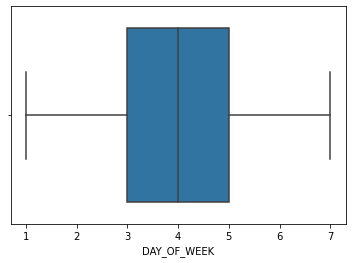

In [17]:
sns.boxplot(df['DAY_OF_WEEK'])
# There is no OLutlier Present 

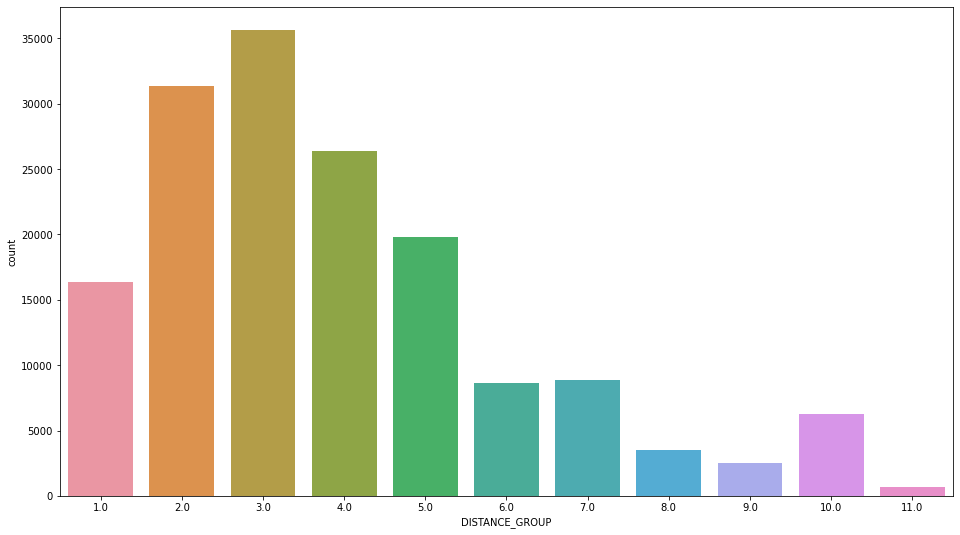

In [18]:
plt.figure(figsize=(16, 9))
sns.countplot(data=df, x='DISTANCE_GROUP')
plt.show()

In [19]:
df['DISTANCE_GROUP'] = df['DISTANCE_GROUP'].fillna(method='bfill')
df['DISTANCE_GROUP'].isnull().sum()

0

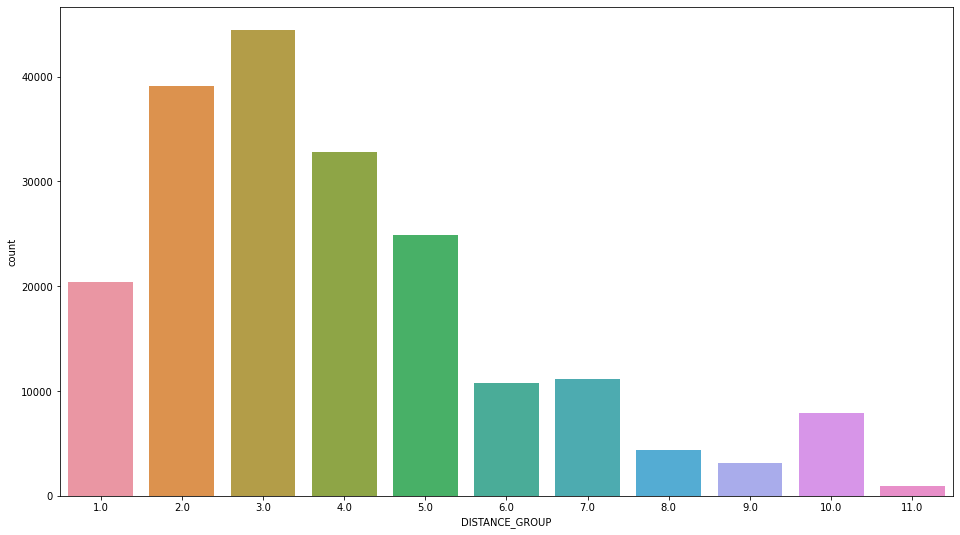

In [20]:
plt.figure(figsize=(16, 9))
sns.countplot(data=df, x='DISTANCE_GROUP')
plt.show()

In [21]:
df['SEGMENT_NUMBER'] = df['SEGMENT_NUMBER'].fillna(method='bfill')
df['SEGMENT_NUMBER'].isnull().sum()

0

In [22]:
df['CONCURRENT_FLIGHTS'] = df['CONCURRENT_FLIGHTS'].fillna(method='bfill')
df['CONCURRENT_FLIGHTS'].isnull().sum()

0

In [23]:
df['NUMBER_OF_SEATS'] = df['NUMBER_OF_SEATS'].fillna(df['NUMBER_OF_SEATS'].median())
df['NUMBER_OF_SEATS'].isnull().sum()

0

In [24]:
df['AIRPORT_FLIGHTS_MONTH'] = df['AIRPORT_FLIGHTS_MONTH'].fillna(method='ffill')
df['AIRPORT_FLIGHTS_MONTH'].isnull().sum()

0

In [25]:
df['AIRLINE_FLIGHTS_MONTH'] = df['AIRLINE_FLIGHTS_MONTH'].fillna(df['AIRLINE_FLIGHTS_MONTH'].median())
df['AIRPORT_FLIGHTS_MONTH'].isnull().sum()

0

In [26]:
df['AIRLINE_AIRPORT_FLIGHTS_MONTH'] = df['AIRLINE_AIRPORT_FLIGHTS_MONTH'].fillna(method='ffill')
df['AIRLINE_AIRPORT_FLIGHTS_MONTH'].isnull().sum()

1

In [27]:
df['AIRLINE_AIRPORT_FLIGHTS_MONTH'] = df['AIRLINE_AIRPORT_FLIGHTS_MONTH'].fillna(df['AIRLINE_AIRPORT_FLIGHTS_MONTH'].median())
df['AIRLINE_AIRPORT_FLIGHTS_MONTH'].isnull().sum()

0

In [28]:
df['AVG_MONTHLY_PASS_AIRLINE'] = df['AVG_MONTHLY_PASS_AIRLINE'].fillna(method='ffill')
df['AVG_MONTHLY_PASS_AIRLINE'].isnull().sum()

0

In [29]:
df['FLT_ATTENDANTS_PER_PASS'] = df['FLT_ATTENDANTS_PER_PASS'].fillna(method='ffill')
df['FLT_ATTENDANTS_PER_PASS'].isnull().sum()

0

In [30]:
df['GROUND_SERV_PER_PASS'] = df['GROUND_SERV_PER_PASS'].fillna(method='bfill')
df['GROUND_SERV_PER_PASS'].isnull().sum()

2

In [31]:
df['PLANE_AGE'] = df['PLANE_AGE'].fillna(method='ffill')
df['PLANE_AGE'].isnull().sum()

0

In [32]:
df['SNOW'] = df['SNOW'].fillna(method='bfill')
df['SNOW'].isnull().sum()

0

In [33]:
df['PRCP'] = df['PRCP'].fillna(method='bfill')
df['PRCP'].isnull().sum()

0

In [34]:
df['AWND'] = df['AWND'].fillna(method='bfill')
df['AWND'].isnull().sum()

0

In [35]:
df['TMAX'] = df['TMAX'].fillna(method='ffill')
df['TMAX'].isnull().sum()

1

In [36]:
df['SNWD'] = df['SNWD'].fillna(method='ffill')
df['SNWD'].isnull().sum()

0

In [37]:
df.isnull().sum()

DAY_OF_WEEK                      0
DEP_DEL15                        0
DISTANCE_GROUP                   0
SEGMENT_NUMBER                   0
CONCURRENT_FLIGHTS               0
NUMBER_OF_SEATS                  0
CARRIER_NAME                     0
AIRPORT_FLIGHTS_MONTH            0
AIRLINE_FLIGHTS_MONTH            0
AIRLINE_AIRPORT_FLIGHTS_MONTH    0
AVG_MONTHLY_PASS_AIRPORT         0
AVG_MONTHLY_PASS_AIRLINE         0
FLT_ATTENDANTS_PER_PASS          0
GROUND_SERV_PER_PASS             2
PLANE_AGE                        0
DEPARTING_AIRPORT                0
PRCP                             0
SNOW                             0
SNWD                             0
TMAX                             1
AWND                             0
PREVIOUS_AIRPORT_REGION          0
dtype: int64

### * We can see that 2 columns still have null values so we will use median to fill these missing values
### * we have tried not to drop any missing values from columns so data integrity is maintained 

In [38]:
df['GROUND_SERV_PER_PASS'] = df['GROUND_SERV_PER_PASS'].fillna(df['GROUND_SERV_PER_PASS'].median())
df['TMAX'] = df['TMAX'].fillna(df['TMAX'].median())

In [39]:
df.isnull().sum()

DAY_OF_WEEK                      0
DEP_DEL15                        0
DISTANCE_GROUP                   0
SEGMENT_NUMBER                   0
CONCURRENT_FLIGHTS               0
NUMBER_OF_SEATS                  0
CARRIER_NAME                     0
AIRPORT_FLIGHTS_MONTH            0
AIRLINE_FLIGHTS_MONTH            0
AIRLINE_AIRPORT_FLIGHTS_MONTH    0
AVG_MONTHLY_PASS_AIRPORT         0
AVG_MONTHLY_PASS_AIRLINE         0
FLT_ATTENDANTS_PER_PASS          0
GROUND_SERV_PER_PASS             0
PLANE_AGE                        0
DEPARTING_AIRPORT                0
PRCP                             0
SNOW                             0
SNWD                             0
TMAX                             0
AWND                             0
PREVIOUS_AIRPORT_REGION          0
dtype: int64

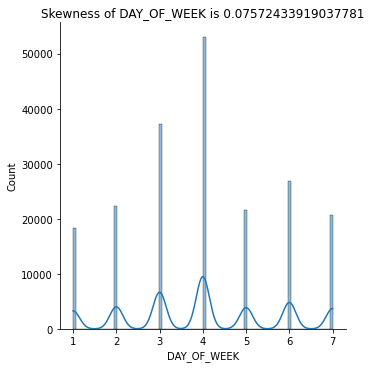

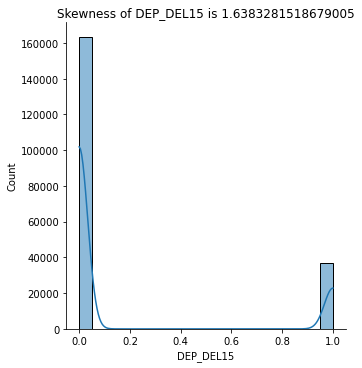

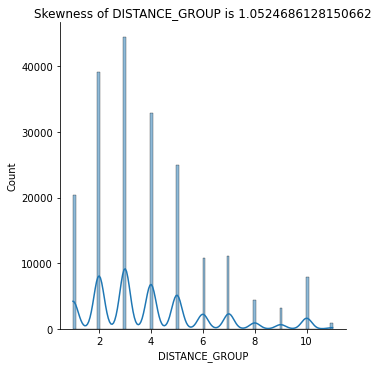

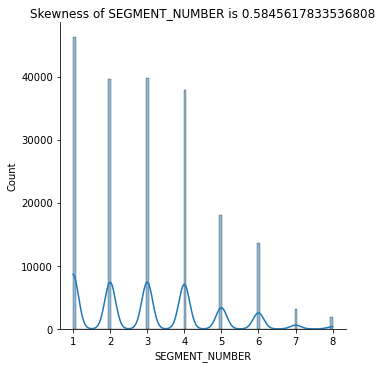

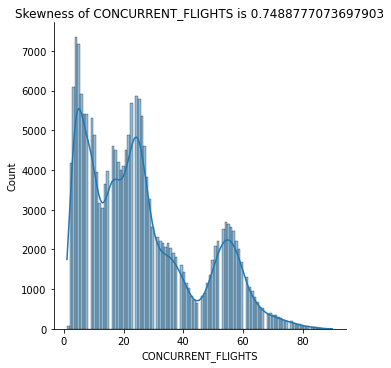

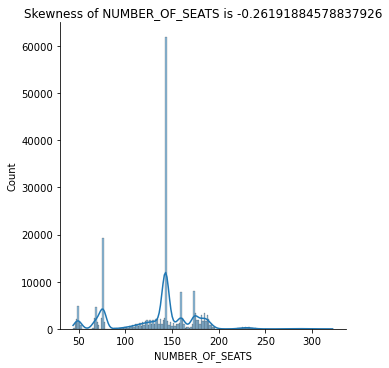

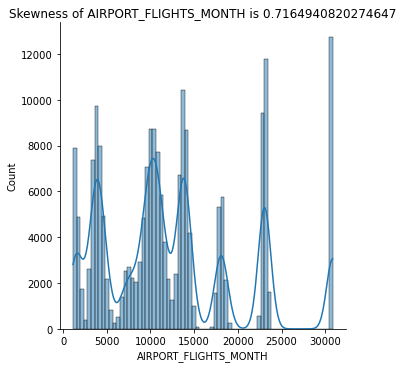

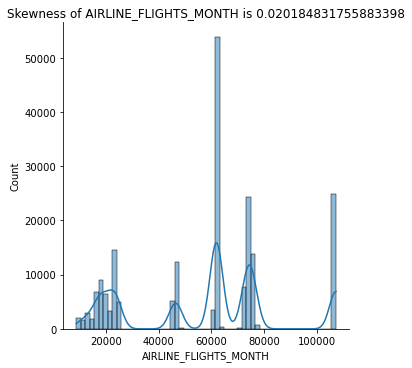

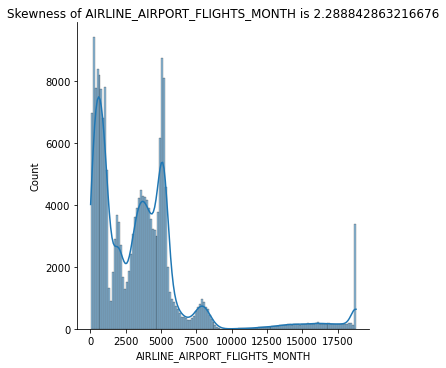

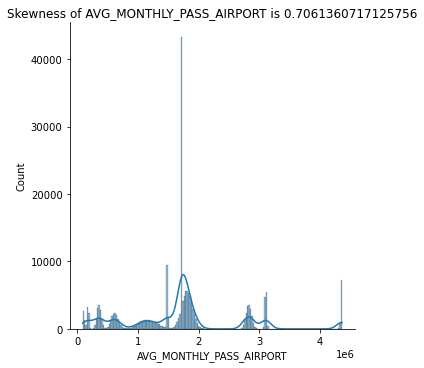

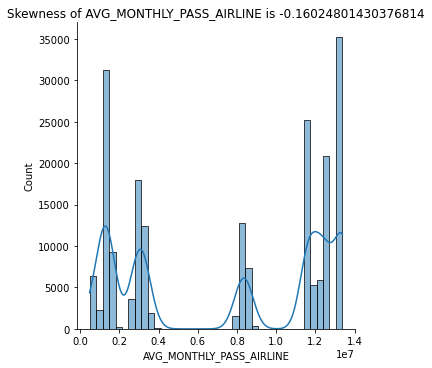

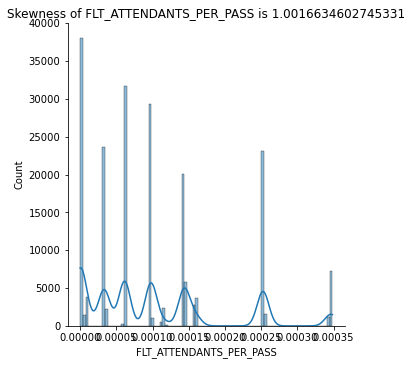

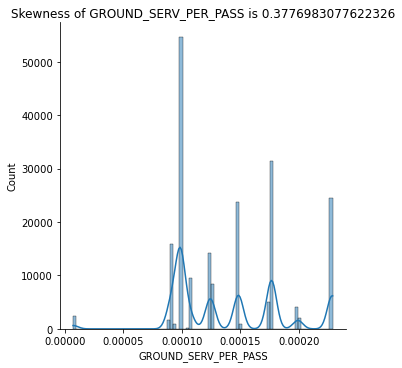

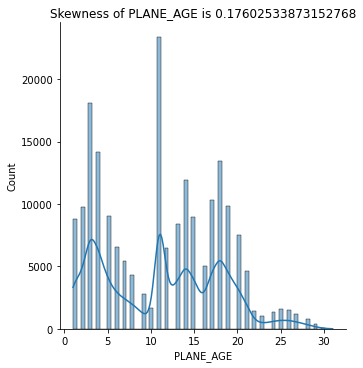

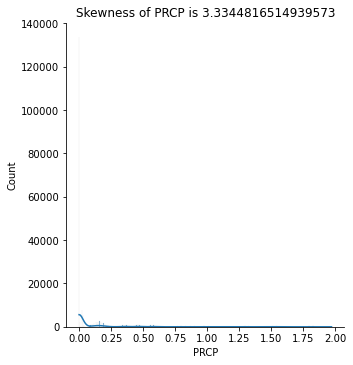

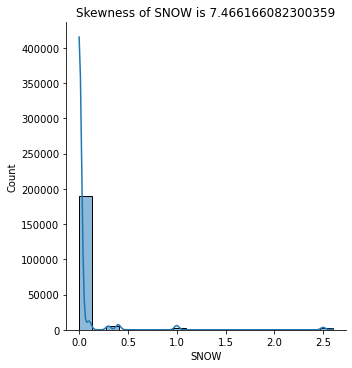

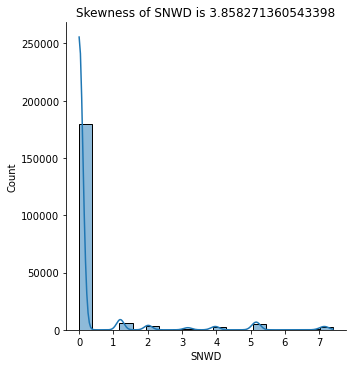

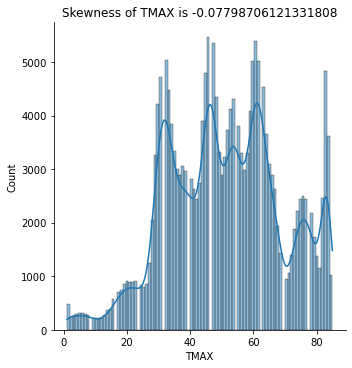

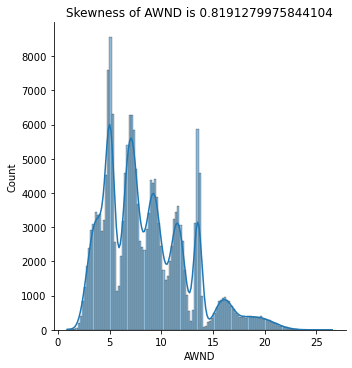

In [40]:
df_num = df.select_dtypes(include=np.number)
for i in df_num.columns:
    sns.displot(data=df_num, x=i, kde=True)
    plt.title(f'Skewness of {i} is {df_num[i].skew()}')
    plt.show()

# OUTLIER TREATMENT

In [41]:
def detect_outliers_zscore(data):
    outliers = []
    thres = 3
    mean = np.mean(data)
    std = np.std(data)
    # print(mean, std)
    for i in data:
        z_score = (i-mean)/std
        if (np.abs(z_score) > thres):
            outliers.append(i)
    return outliers

In [42]:
sample_outliers = detect_outliers_zscore(df.DISTANCE_GROUP)
print(f'Outliers from z-score method in DISTANCE_GROUP: {sorted(set(sample_outliers))}', end='\n\n\n')

Outliers from z-score method in DISTANCE_GROUP: [11.0]




In [43]:
df.DISTANCE_GROUP.replace(to_replace=11.0, value=10.0, inplace=True)

In [44]:
sample_outliers = detect_outliers_zscore(df.DISTANCE_GROUP)
print(f'Outliers from z-score method in DISTANCE_GROUP: {sorted(set(sample_outliers))}', end='\n\n\n')

Outliers from z-score method in DISTANCE_GROUP: []




In [45]:
sample_outliers = detect_outliers_zscore(df.SEGMENT_NUMBER)
print(f'Outliers from z-score method in SEGMENT_NUMBER: {sorted(set(sample_outliers))}', end='\n\n\n')

Outliers from z-score method in SEGMENT_NUMBER: []




In [46]:
sorted(df.SEGMENT_NUMBER.unique())

[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0]

In [47]:
sample_outliers = detect_outliers_zscore(df.CONCURRENT_FLIGHTS)
print(f'Outliers from z-score method in CONCURRENT_FLIGHTS: {sorted(set(sample_outliers))}', end='\n\n\n')

Outliers from z-score method in CONCURRENT_FLIGHTS: [82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0]




In [48]:
df.CONCURRENT_FLIGHTS.replace(to_replace=[82.0, 83.0, 84.0, 85.0, 86.0, 87.0,
                                          88.0, 89.0, 90.0],
                              value=81.0, inplace=True)

In [49]:
sample_outliers = detect_outliers_zscore(df.CONCURRENT_FLIGHTS)
print(f'Outliers from z-score method in CONCURRENT_FLIGHTS: {sorted(set(sample_outliers))}', end='\n\n\n')

Outliers from z-score method in CONCURRENT_FLIGHTS: []




In [50]:
sample_outliers = detect_outliers_zscore(df.NUMBER_OF_SEATS)
print(f'Outliers from z-score method in NUMBER_OF_SEATS: {sorted(set(sample_outliers))}', end='\n\n\n')
otlr = sorted(set(sample_outliers))

Outliers from z-score method in NUMBER_OF_SEATS: [264.0, 265.0, 266.0, 267.0, 268.0, 269.0, 270.0, 271.0, 272.0, 273.0, 274.0, 275.0, 276.0, 277.0, 278.0, 279.0, 280.0, 281.0, 282.0, 283.0, 284.0, 285.0, 286.0, 287.0, 288.0, 289.0, 290.0, 291.0, 292.0, 293.0, 294.0, 295.0, 296.0, 297.0, 298.0, 299.0, 300.0, 301.0, 302.0, 303.0, 304.0, 305.0, 306.0, 307.0, 308.0, 309.0, 310.0, 311.0, 312.0, 313.0, 314.0, 315.0, 319.0, 322.0]




In [51]:
sorted(df.NUMBER_OF_SEATS.unique())

[44.0,
 45.0,
 46.0,
 47.0,
 48.0,
 49.0,
 50.0,
 51.0,
 52.0,
 53.0,
 54.0,
 55.0,
 59.0,
 64.0,
 65.0,
 66.0,
 67.0,
 68.0,
 69.0,
 70.0,
 71.0,
 72.0,
 73.0,
 74.0,
 75.0,
 76.0,
 77.0,
 78.0,
 79.0,
 80.0,
 81.0,
 82.0,
 83.0,
 84.0,
 85.0,
 86.0,
 87.0,
 88.0,
 89.0,
 90.0,
 91.0,
 92.0,
 93.0,
 94.0,
 95.0,
 96.0,
 97.0,
 98.0,
 99.0,
 100.0,
 101.0,
 102.0,
 103.0,
 104.0,
 105.0,
 106.0,
 107.0,
 108.0,
 109.0,
 110.0,
 111.0,
 112.0,
 113.0,
 114.0,
 115.0,
 116.0,
 117.0,
 118.0,
 119.0,
 120.0,
 121.0,
 122.0,
 123.0,
 124.0,
 125.0,
 126.0,
 127.0,
 128.0,
 129.0,
 130.0,
 131.0,
 132.0,
 133.0,
 134.0,
 135.0,
 136.0,
 137.0,
 138.0,
 139.0,
 140.0,
 141.0,
 142.0,
 143.0,
 144.0,
 145.0,
 146.0,
 147.0,
 148.0,
 149.0,
 150.0,
 151.0,
 152.0,
 153.0,
 154.0,
 155.0,
 156.0,
 157.0,
 158.0,
 159.0,
 160.0,
 161.0,
 162.0,
 163.0,
 164.0,
 165.0,
 166.0,
 167.0,
 168.0,
 169.0,
 170.0,
 171.0,
 172.0,
 173.0,
 174.0,
 175.0,
 176.0,
 177.0,
 178.0,
 179.0,
 180.0,
 181.0,
 

In [52]:
df.NUMBER_OF_SEATS.replace(to_replace=otlr, value=np.median(df.NUMBER_OF_SEATS), inplace=True)

In [53]:
sample_outliers = detect_outliers_zscore(df.NUMBER_OF_SEATS)
print(f'Outliers from z-score method in NUMBER_OF_SEATS: {sorted(set(sample_outliers))}', end='\n\n\n')

Outliers from z-score method in NUMBER_OF_SEATS: []




In [54]:
sample_outliers = detect_outliers_zscore(df.AIRLINE_AIRPORT_FLIGHTS_MONTH)
print(f'Outliers from z-score method in AIRLINE_AIRPORT_FLIGHTS_MONTH: {sorted(set(sample_outliers))}', end='\n\n\n')
otlr = sorted(set(sample_outliers))

Outliers from z-score method in AIRLINE_AIRPORT_FLIGHTS_MONTH: [14762.0, 14763.0, 14764.0, 14765.0, 14766.0, 14767.0, 14770.0, 14771.0, 14774.0, 14775.0, 14776.0, 14777.0, 14779.0, 14780.0, 14782.0, 14783.0, 14785.0, 14787.0, 14788.0, 14789.0, 14791.0, 14794.0, 14795.0, 14796.0, 14797.0, 14798.0, 14800.0, 14802.0, 14803.0, 14805.0, 14806.0, 14808.0, 14811.0, 14812.0, 14813.0, 14817.0, 14819.0, 14821.0, 14825.0, 14826.0, 14827.0, 14829.0, 14830.0, 14832.0, 14833.0, 14834.0, 14835.0, 14837.0, 14839.0, 14840.0, 14842.0, 14843.0, 14848.0, 14852.0, 14854.0, 14857.0, 14859.0, 14861.0, 14867.0, 14868.0, 14875.0, 14876.0, 14878.0, 14882.0, 14885.0, 14887.0, 14890.0, 14891.0, 14892.0, 14895.0, 14897.0, 14898.0, 14902.0, 14906.0, 14907.0, 14908.0, 14909.0, 14910.0, 14912.0, 14913.0, 14914.0, 14915.0, 14916.0, 14919.0, 14922.0, 14924.0, 14925.0, 14926.0, 14927.0, 14928.0, 14934.0, 14935.0, 14937.0, 14939.0, 14940.0, 14943.0, 14944.0, 14945.0, 14946.0, 14947.0, 14948.0, 14950.0, 14951.0, 14952.0, 

In [55]:
len(otlr)
min = otlr[0]
max = otlr[-1]
lnsp = np.linspace(min, max, 10)
lnsp, min

(array([14762.        , 15211.66666667, 15661.33333333, 16111.        ,
        16560.66666667, 17010.33333333, 17460.        , 17909.66666667,
        18359.33333333, 18809.        ]),
 14762.0)

In [56]:
b = round(min)
for i in range(len(lnsp) - 1):
    a = range(b, round(lnsp[i + 1] + 1))
    b = int(round(lnsp[i + 1] + 1))
    c = round(np.mean(a))
    df.AIRLINE_AIRPORT_FLIGHTS_MONTH.replace(to_replace=list(a),
                                             value=c, inplace=True)

In [57]:
df.AIRLINE_AIRPORT_FLIGHTS_MONTH.replace(to_replace=otlr,
                                         value=np.median(df.AIRLINE_AIRPORT_FLIGHTS_MONTH),
                                         inplace=True)

In [58]:
sample_outliers = detect_outliers_zscore(df.AIRLINE_AIRPORT_FLIGHTS_MONTH)
print(f'Outliers from z-score method in AIRLINE_AIRPORT_FLIGHTS_MONTH: {sorted(set(sample_outliers))}', end='\n\n\n')
otlr = sorted(set(sample_outliers))

Outliers from z-score method in AIRLINE_AIRPORT_FLIGHTS_MONTH: [10540.0, 10541.0, 10543.0, 10552.0, 10568.0, 10572.0, 10599.0, 10614.0, 10617.0, 10648.0, 10652.0, 10665.0, 10672.0, 10707.0, 10724.0, 10741.0, 10748.0, 10763.0, 10795.0, 10804.0, 10808.0, 10852.0, 10859.0, 10862.0, 10870.0, 10877.0, 10902.0, 10945.0, 10963.0, 10974.0, 10975.0, 10980.0, 10981.0, 10984.0, 10989.0, 11030.0, 11045.0, 11050.0, 11067.0, 11093.0, 11095.0, 11121.0, 11122.0, 11132.0, 11136.0, 11141.0, 11145.0, 11155.0, 11158.0, 11159.0, 11174.0, 11177.0, 11180.0, 11187.0, 11207.0, 11208.0, 11209.0, 11210.0, 11217.0, 11252.0, 11258.0, 11278.0, 11287.0, 11296.0, 11314.0, 11320.0, 11331.0, 11353.0, 11358.0, 11360.0, 11362.0, 11364.0, 11373.0, 11377.0, 11390.0, 11401.0, 11405.0, 11406.0, 11411.0, 11415.0, 11418.0, 11425.0, 11440.0, 11473.0, 11483.0, 11487.0, 11489.0, 11493.0, 11500.0, 11504.0, 11512.0, 11517.0, 11518.0, 11528.0, 11530.0, 11531.0, 11536.0, 11538.0, 11542.0, 11546.0, 11552.0, 11559.0, 11567.0, 11570.0, 

In [59]:
df.AIRLINE_AIRPORT_FLIGHTS_MONTH.replace(to_replace=otlr,
                                         value=sorted(df.AIRLINE_AIRPORT_FLIGHTS_MONTH.unique())[(len(otlr) + 1) * -1],
                                         inplace=True)

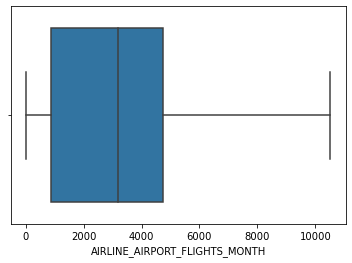

In [60]:
sns.boxplot(data=df, x='AIRLINE_AIRPORT_FLIGHTS_MONTH')
plt.show()

In [61]:
sample_outliers = detect_outliers_zscore(df.AVG_MONTHLY_PASS_AIRPORT)
print(f'Outliers from z-score method in AVG_MONTHLY_PASS_AIRPORT: {sorted(set(sample_outliers))}', end='\n\n\n')
otlr = sorted(set(sample_outliers))

Outliers from z-score method in AVG_MONTHLY_PASS_AIRPORT: []




In [62]:
sample_outliers = detect_outliers_zscore(df.FLT_ATTENDANTS_PER_PASS)
print(f'Outliers from z-score method in FLT_ATTENDANTS_PER_PASS: {sorted(set(sample_outliers))}', end='\n\n\n')
otlr = sorted(set(sample_outliers))

Outliers from z-score method in FLT_ATTENDANTS_PER_PASS: []




In [63]:
sample_outliers = detect_outliers_zscore(df.PRCP)
print(f'Outliers from z-score method in PRCP: {sorted(set(sample_outliers))}', end='\n\n\n')
otlr = sorted(set(sample_outliers))

Outliers from z-score method in PRCP: [1.11, 1.12, 1.13, 1.14, 1.15, 1.16, 1.17, 1.18, 1.19, 1.2, 1.21, 1.22, 1.23, 1.24, 1.25, 1.26, 1.27, 1.28, 1.29, 1.3, 1.31, 1.32, 1.33, 1.34, 1.35, 1.36, 1.37, 1.38, 1.39, 1.4, 1.41, 1.42, 1.43, 1.44, 1.45, 1.46, 1.47, 1.48, 1.49, 1.5, 1.51, 1.52, 1.53, 1.54, 1.55, 1.56, 1.57, 1.58, 1.59, 1.65, 1.66, 1.67, 1.68, 1.69, 1.7, 1.71, 1.72, 1.73, 1.74, 1.75, 1.76, 1.77, 1.78, 1.79, 1.8, 1.81, 1.82, 1.83, 1.84, 1.85, 1.86, 1.87, 1.88, 1.89, 1.9, 1.91, 1.92, 1.93, 1.94, 1.95, 1.96, 1.97]




In [64]:
len(otlr)
min = otlr[0]
max = otlr[-1]
lnsp = np.linspace(min, max, 10)
lnsp

array([1.11      , 1.20555556, 1.30111111, 1.39666667, 1.49222222,
       1.58777778, 1.68333333, 1.77888889, 1.87444444, 1.97      ])

In [65]:
len(df.PRCP.unique())

191

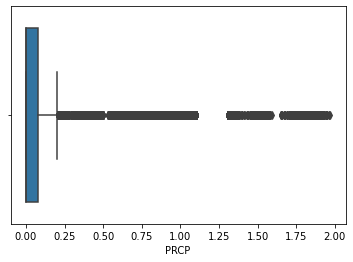

In [66]:
a = [1.11, 1.12, 1.13, 1.14, 1.15, 1.16, 1.17, 1.18, 1.19, 1.2]
b = [1.21, 1.22, 1.23, 1.24, 1.25, 1.26, 1.27, 1.28, 1.29, 1.3]
c = [1.31, 1.32, 1.33, 1.34, 1.35, 1.36, 1.37, 1.38, 1.39, 1.4]
d = [1.41, 1.42, 1.43, 1.44, 1.45, 1.46, 1.47, 1.48, 1.49, 1.5]
e = [1.51, 1.52, 1.53, 1.54, 1.55, 1.56, 1.57, 1.58, 1.59]
f = [1.65, 1.66, 1.67, 1.68, 1.69, 1.7, 1.71, 1.72, 1.73, 1.74, 1.75, 1.76, 1.77]
g = [1.78, 1.79, 1.8, 1.81, 1.82, 1.83, 1.84, 1.85, 1.86, 1.87]
h = [1.88, 1.89, 1.9, 1.91, 1.92, 1.93, 1.94, 1.95, 1.96, 1.97]
df.PRCP.replace(to_replace=a, value=round(np.mean(a), 2), inplace=True)
df.PRCP.replace(to_replace=b, value=round(np.mean(b), 2), inplace=True)
df.PRCP.replace(to_replace=a, value=round(np.mean(c), 2), inplace=True)
df.PRCP.replace(to_replace=b, value=round(np.mean(d), 2), inplace=True)
df.PRCP.replace(to_replace=a, value=round(np.mean(e), 2), inplace=True)
df.PRCP.replace(to_replace=b, value=round(np.mean(f), 2), inplace=True)
df.PRCP.replace(to_replace=a, value=round(np.mean(g), 2), inplace=True)
df.PRCP.replace(to_replace=b, value=round(np.mean(h), 2), inplace=True)
sns.boxplot(data=df, x='PRCP')
plt.show()

In [67]:
len(df.PRCP.unique())

171

In [68]:
sample_outliers = detect_outliers_zscore(df.PRCP)
print(f'Outliers from z-score method in PRCP: {sorted(set(sample_outliers))}', end='\n\n\n')
otlr = sorted(set(sample_outliers))

Outliers from z-score method in PRCP: [1.31, 1.32, 1.33, 1.34, 1.35, 1.36, 1.37, 1.38, 1.39, 1.4, 1.41, 1.42, 1.43, 1.44, 1.45, 1.46, 1.47, 1.48, 1.49, 1.5, 1.51, 1.52, 1.53, 1.54, 1.55, 1.56, 1.57, 1.58, 1.59, 1.65, 1.66, 1.67, 1.68, 1.69, 1.7, 1.71, 1.72, 1.73, 1.74, 1.75, 1.76, 1.77, 1.78, 1.79, 1.8, 1.81, 1.82, 1.83, 1.84, 1.85, 1.86, 1.87, 1.88, 1.89, 1.9, 1.91, 1.92, 1.93, 1.94, 1.95, 1.96, 1.97]




In [69]:
df.PRCP.replace(to_replace=otlr,
                value=sorted(df.PRCP.unique())[(len(otlr) + 1) * -1],
                inplace=True)

In [70]:
sample_outliers = detect_outliers_zscore(df.PRCP)
print(f'Outliers from z-score method in PRCP: {sorted(set(sample_outliers))}', end='\n\n\n')
otlr = sorted(set(sample_outliers))

Outliers from z-score method in PRCP: [0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99, 1.0, 1.01, 1.02, 1.03, 1.04, 1.05, 1.06, 1.07, 1.08, 1.09, 1.1]




In [71]:
sample_outliers = detect_outliers_zscore(df.SNOW)
print(f'Outliers from z-score method in SNOW: {sorted(set(sample_outliers))}', end='\n\n\n')
otlr = sorted(set(sample_outliers))

Outliers from z-score method in SNOW: [1.0, 2.4, 2.5, 2.6]




In [72]:
sorted(df.SNOW.unique())

[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 1.0, 2.4, 2.5, 2.6]

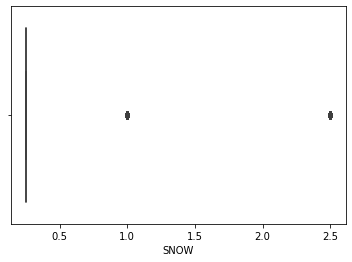

In [73]:
a = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5]
b = [2.4, 2.5, 2.6]
df.SNOW.replace(to_replace=a, value=np.mean(a), inplace=True)
df.SNOW.replace(to_replace=b, value=np.mean(b), inplace=True)
sns.boxplot(data=df, x='SNOW')
plt.show()

In [74]:
sample_outliers = detect_outliers_zscore(df.SNOW)
print(f'Outliers from z-score method in SNOW: {sorted(set(sample_outliers))}', end='\n\n\n')
otlr = sorted(set(sample_outliers))

Outliers from z-score method in SNOW: [1.0, 2.5]




In [75]:
sample_outliers = detect_outliers_zscore(df.SNWD)
print(f'Outliers from z-score method in SNWD: {sorted(set(sample_outliers))}', end='\n\n\n')
otlr = sorted(set(sample_outliers))

Outliers from z-score method in SNWD: [5.0, 5.1, 5.2, 5.3, 6.9, 7.0, 7.1, 7.2, 7.3, 7.4]




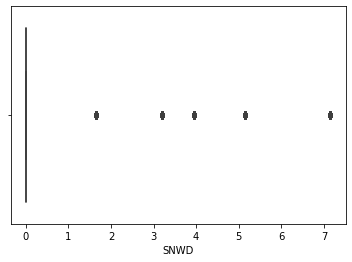

In [76]:
a = [1.2, 1.3, 2.0, 2.1]
b = [3.1, 3.2, 3.3]
c = [3.8, 3.9, 4.0, 4.1]
d = [5.0, 5.1, 5.2, 5.3]
e = [6.9, 7.0, 7.1, 7.2, 7.3, 7.4]
df.SNWD.replace(to_replace=a, value=round(np.mean(a), 2), inplace=True)
df.SNWD.replace(to_replace=b, value=round(np.mean(b), 2), inplace=True)
df.SNWD.replace(to_replace=c, value=round(np.mean(c), 2), inplace=True)
df.SNWD.replace(to_replace=d, value=round(np.mean(d), 2), inplace=True)
df.SNWD.replace(to_replace=e, value=round(np.mean(e), 2), inplace=True)
sns.boxplot(data=df, x='SNWD')
plt.show()

In [77]:
sample_outliers = detect_outliers_zscore(df.SNWD)
print(f'Outliers from z-score method in SNWD: {sorted(set(sample_outliers))}', end='\n\n\n')
otlr = sorted(set(sample_outliers))

Outliers from z-score method in SNWD: [5.15, 7.15]




In [78]:
sorted(df.SNWD.unique())

[0.0, 1.65, 3.2, 3.95, 5.15, 7.15]

In [79]:
sample_outliers = detect_outliers_zscore(df.AWND)
print(f'Outliers from z-score method in AWND: {sorted(set(sample_outliers))}', end='\n\n\n')
otlr = sorted(set(sample_outliers))

Outliers from z-score method in AWND: [20.62, 20.63, 20.64, 20.65, 20.66, 20.67, 20.68, 20.69, 20.7, 20.71, 20.72, 20.73, 20.74, 20.75, 20.76, 20.77, 20.78, 20.79, 20.8, 20.81, 20.82, 20.83, 20.84, 20.85, 20.86, 20.87, 20.88, 20.89, 20.9, 20.91, 20.92, 20.93, 20.94, 20.95, 20.96, 20.97, 20.98, 20.99, 21.0, 21.01, 21.02, 21.03, 21.04, 21.05, 21.06, 21.07, 21.08, 21.09, 21.1, 21.11, 21.12, 21.13, 21.14, 21.15, 21.16, 21.17, 21.18, 21.19, 21.2, 21.21, 21.22, 21.23, 21.24, 21.25, 21.26, 21.27, 21.28, 21.29, 21.3, 21.31, 21.32, 21.33, 21.34, 21.35, 21.36, 21.37, 21.38, 21.39, 21.4, 21.41, 21.42, 21.43, 21.44, 21.45, 21.46, 21.47, 21.48, 21.49, 21.5, 21.51, 21.52, 21.53, 21.54, 21.55, 21.56, 21.57, 21.58, 21.59, 21.6, 21.61, 21.62, 21.63, 21.64, 21.65, 21.66, 21.67, 21.68, 21.69, 21.7, 21.71, 21.72, 21.73, 21.74, 21.75, 21.76, 21.77, 21.78, 21.79, 21.81, 21.82, 21.83, 21.84, 21.85, 21.86, 21.87, 21.88, 21.89, 21.9, 21.91, 21.92, 21.93, 21.94, 21.95, 21.97, 21.98, 21.99, 22.0, 22.01, 22.02, 2

In [80]:
a = otlr[:-1]
df.AWND.replace(to_replace=a, value=round(np.mean(a), 2), inplace=True)

In [81]:
sample_outliers = detect_outliers_zscore(df.AWND)
print(f'Outliers from z-score method in AWND: {sorted(set(sample_outliers))}', end='\n\n\n')
otlr = sorted(set(sample_outliers))

Outliers from z-score method in AWND: [21.9, 26.53]




In [82]:
for i in df.select_dtypes(include=np.number).columns:
    sample_outliers = detect_outliers_zscore(df[i])
    print(f'Outliers from z-score method in {i}: {sorted(set(sample_outliers))}', end='\n\n\n')

Outliers from z-score method in DAY_OF_WEEK: []


Outliers from z-score method in DEP_DEL15: []


Outliers from z-score method in DISTANCE_GROUP: []


Outliers from z-score method in SEGMENT_NUMBER: []


Outliers from z-score method in CONCURRENT_FLIGHTS: []


Outliers from z-score method in NUMBER_OF_SEATS: []


Outliers from z-score method in AIRPORT_FLIGHTS_MONTH: []


Outliers from z-score method in AIRLINE_FLIGHTS_MONTH: []


Outliers from z-score method in AIRLINE_AIRPORT_FLIGHTS_MONTH: [10013.0, 10038.0, 10098.0, 10109.0, 10167.0, 10205.0, 10213.0, 10233.0, 10237.0, 10292.0, 10352.0, 10377.0, 10382.0, 10397.0, 10399.0, 10418.0, 10462.0, 10473.0, 10486.0, 10505.0, 10515.0]


Outliers from z-score method in AVG_MONTHLY_PASS_AIRPORT: []


Outliers from z-score method in AVG_MONTHLY_PASS_AIRLINE: []


Outliers from z-score method in FLT_ATTENDANTS_PER_PASS: []


Outliers from z-score method in GROUND_SERV_PER_PASS: []


Outliers from z-score method in PLANE_AGE: []


Outliers from z

In [83]:
df_cat = df.select_dtypes(include='object')
for i in df_cat.columns:
    print((df_cat[i].value_counts() / df_cat.shape[0] * 100), end='\n\n')

Southwest Airlines Co.          17.2655
American Airlines Inc.          14.5200
Delta Air Lines Inc.            13.3395
United Air Lines Inc.           12.5190
SkyWest Airlines Inc.            8.0430
Midwest Airline, Inc.            6.3685
JetBlue Airways                  4.5030
Mesa Airlines Inc.               4.0740
Atlantic Southeast Airlines      3.7150
American Eagle Airlines Inc.     3.4055
Comair Inc.                      2.7605
Endeavor Air Inc.                2.7545
Spirit Air Lines                 2.5920
Alaska Airlines Inc.             2.0795
Frontier Airlines Inc.           1.5300
Allegiant Air                    0.3875
Hawaiian Airlines Inc.           0.1430
Name: CARRIER_NAME, dtype: float64

Houston Intercontinental                      9.9460
Chicago O'Hare International                  8.3140
Detroit Metro Wayne County                    6.7725
Atlanta Municipal                             5.2615
Douglas Municipal                             4.3790
Newark Liberty Inte

### *From the above, we can infer that there are outliers in the following columns:-
### *AWND, Longitude, PRCP, SNOW, Latitude, FLT_attendants per pass, avg monthly pass airport, AIRLINE Aiport flights month, concurrent flights, number of seats, segment number, distance group, dep del 15
### * we have onl used z-score to check for outliers values and binned them with their nearest group as per the business sense dropping the outliers would cause false prediction hence we decided to bin them as per groups.

In [85]:
df['SEGMENT_NUMBER'] = df.SEGMENT_NUMBER.astype(object)
df['DAY_OF_WEEK'] = df.DAY_OF_WEEK.astype(int)
df['DAY_OF_WEEK'] = df.DAY_OF_WEEK.astype(object)
df['DISTANCE_GROUP'] = df.DISTANCE_GROUP.astype(object)
df['DEP_DEL15'] = df.DEP_DEL15.astype(int)
df['DEP_DEL15'] = df.DEP_DEL15.astype(object)
df.dtypes

DAY_OF_WEEK                       object
DEP_DEL15                         object
DISTANCE_GROUP                    object
SEGMENT_NUMBER                    object
CONCURRENT_FLIGHTS               float64
NUMBER_OF_SEATS                  float64
CARRIER_NAME                      object
AIRPORT_FLIGHTS_MONTH            float64
AIRLINE_FLIGHTS_MONTH            float64
AIRLINE_AIRPORT_FLIGHTS_MONTH    float64
AVG_MONTHLY_PASS_AIRPORT         float64
AVG_MONTHLY_PASS_AIRLINE         float64
FLT_ATTENDANTS_PER_PASS          float64
GROUND_SERV_PER_PASS             float64
PLANE_AGE                        float64
DEPARTING_AIRPORT                 object
PRCP                             float64
SNOW                             float64
SNWD                             float64
TMAX                             float64
AWND                             float64
PREVIOUS_AIRPORT_REGION           object
dtype: object

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 22 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   DAY_OF_WEEK                    200000 non-null  object 
 1   DEP_DEL15                      200000 non-null  object 
 2   DISTANCE_GROUP                 200000 non-null  object 
 3   SEGMENT_NUMBER                 200000 non-null  object 
 4   CONCURRENT_FLIGHTS             200000 non-null  float64
 5   NUMBER_OF_SEATS                200000 non-null  float64
 6   CARRIER_NAME                   200000 non-null  object 
 7   AIRPORT_FLIGHTS_MONTH          200000 non-null  float64
 8   AIRLINE_FLIGHTS_MONTH          200000 non-null  float64
 9   AIRLINE_AIRPORT_FLIGHTS_MONTH  200000 non-null  float64
 10  AVG_MONTHLY_PASS_AIRPORT       200000 non-null  float64
 11  AVG_MONTHLY_PASS_AIRLINE       200000 non-null  float64
 12  FLT_ATTENDANTS_PER_PASS       

### * We still have data integrity maintained which will help us with the model building 
### * Till now we have managed to treat the null values and deal with the outliers


In [88]:
df.head()

,DAY_OF_WEEK,DEP_DEL15,DISTANCE_GROUP,SEGMENT_NUMBER,CONCURRENT_FLIGHTS,NUMBER_OF_SEATS,CARRIER_NAME,AIRPORT_FLIGHTS_MONTH,AIRLINE_FLIGHTS_MONTH,AIRLINE_AIRPORT_FLIGHTS_MONTH,AVG_MONTHLY_PASS_AIRPORT,AVG_MONTHLY_PASS_AIRLINE,FLT_ATTENDANTS_PER_PASS,GROUND_SERV_PER_PASS,PLANE_AGE,DEPARTING_AIRPORT,PRCP,SNOW,SNWD,TMAX,AWND,PREVIOUS_AIRPORT_REGION
0,4,0,5.0,3.0,22.0,143.0,Southwest Airlines Co.,4728.0,107363.0,3201.0,2711399.0,13382999.0,0.000061,0.000099,11.0,Minneapolis-St Paul International,0.00,0.25,0.00,51.0,4.93,nevada
1,4,0,5.0,3.0,25.0,76.0,Southwest Airlines Co.,4728.0,61899.0,189.0,1022110.0,3027151.0,0.000116,0.000099,2.0,Dallas Fort Worth Regional,0.00,0.25,0.00,57.0,4.93,florida
2,4,0,3.0,5.0,19.0,174.0,United Air Lines Inc.,4728.0,45432.0,94.0,1686287.0,2742196.0,0.000000,0.000099,11.0,Norfolk International,0.00,0.25,0.00,77.0,7.58,illinois
3,3,1,7.0,5.0,28.0,143.0,Southwest Airlines Co.,4150.0,61925.0,684.0,165157.0,13382999.0,0.000000,0.000099,6.0,Dallas Fort Worth Regional,0.00,0.25,1.65,39.0,6.98,new_york
4,3,1,2.0,5.0,28.0,49.0,Delta Air Lines Inc.,7565.0,23248.0,277.0,1485501.0,11680845.0,0.000098,0.000177,6.0,Newark Liberty International,0.34,0.25,1.65,35.0,13.79,california


## **Univariate Analysis**

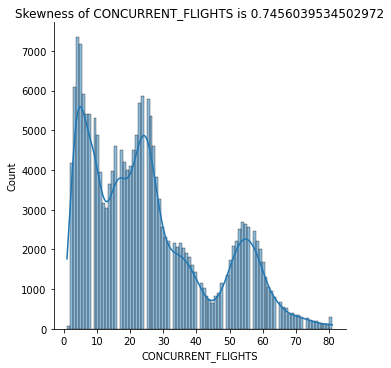

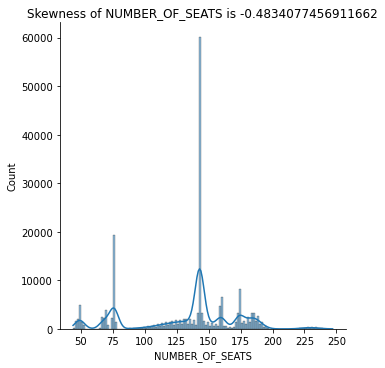

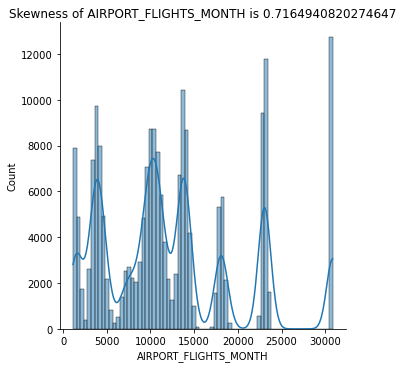

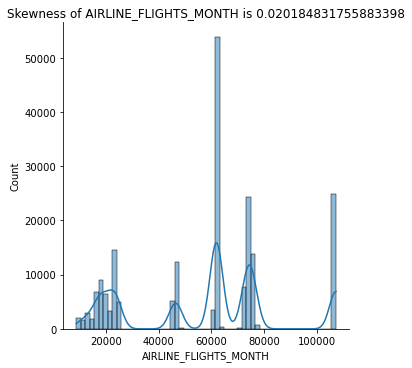

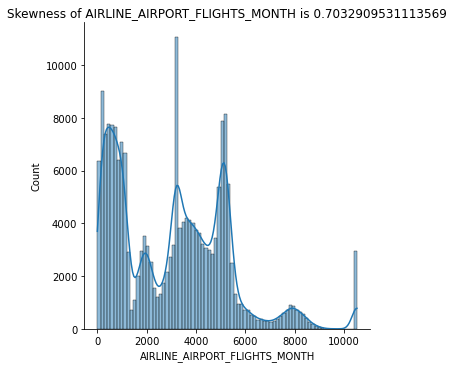

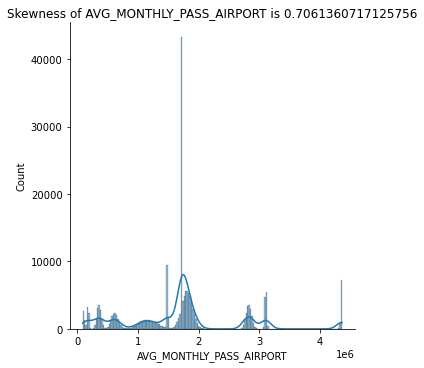

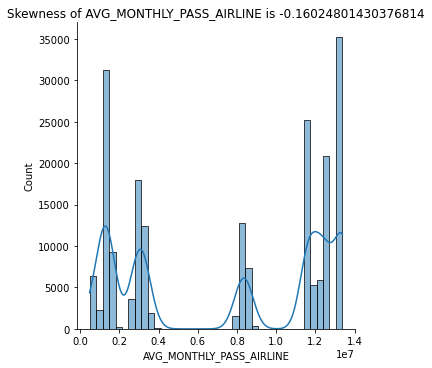

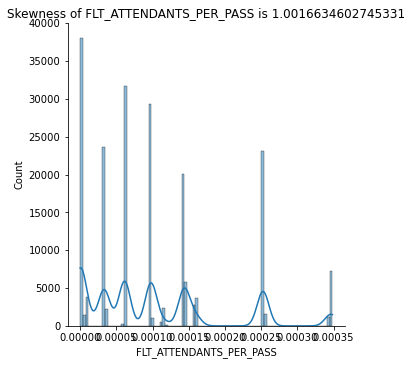

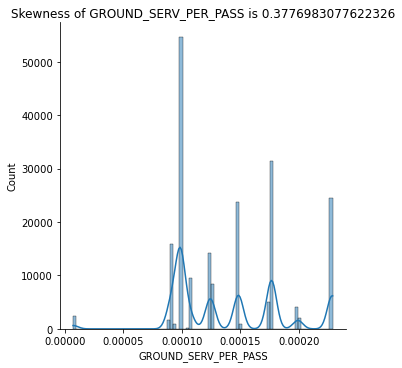

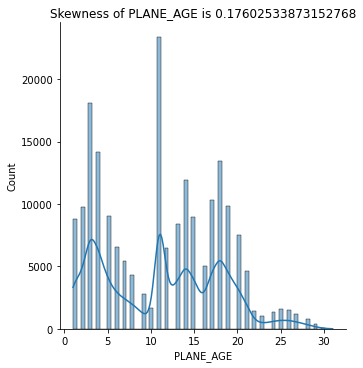

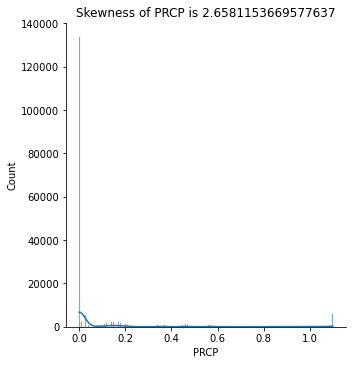

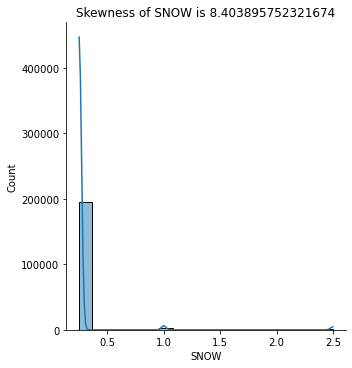

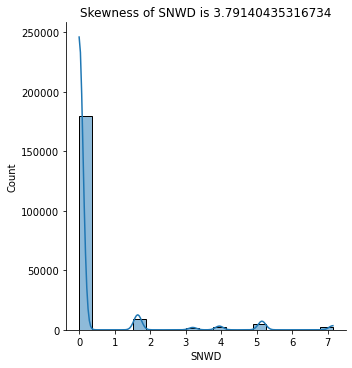

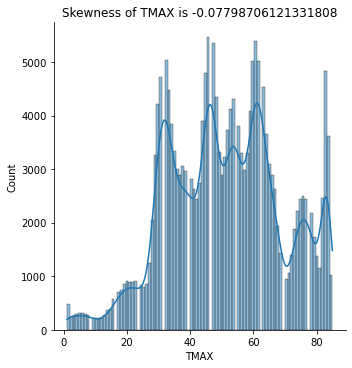

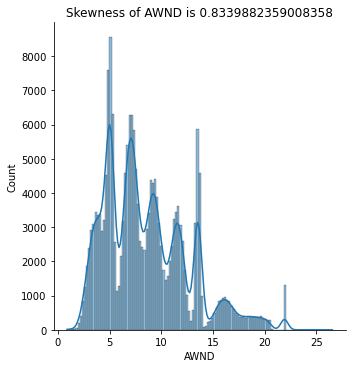

In [89]:
df_num = df.select_dtypes(include=np.number)
for i in df_num.columns:
    sns.displot(data=df_num, x=i, kde=True)
    plt.title(f'Skewness of {i} is {df_num[i].skew()}')
    plt.show()

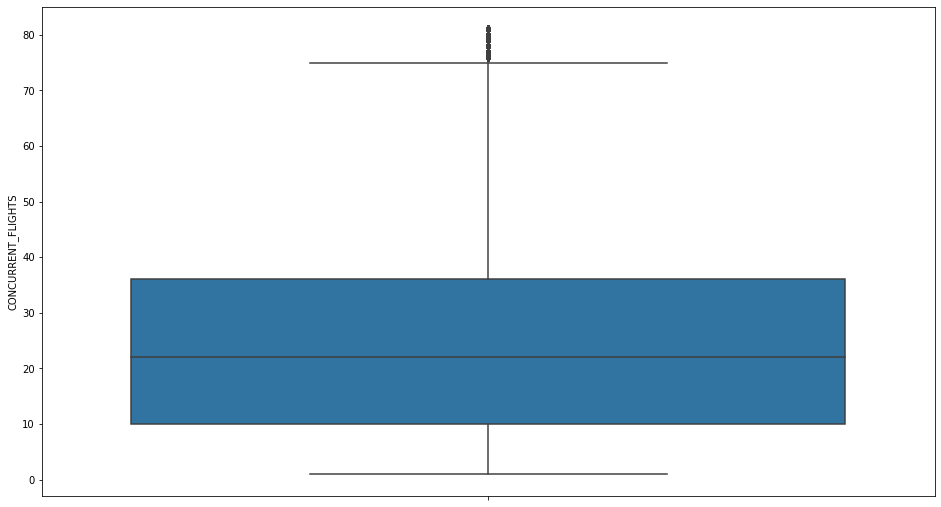

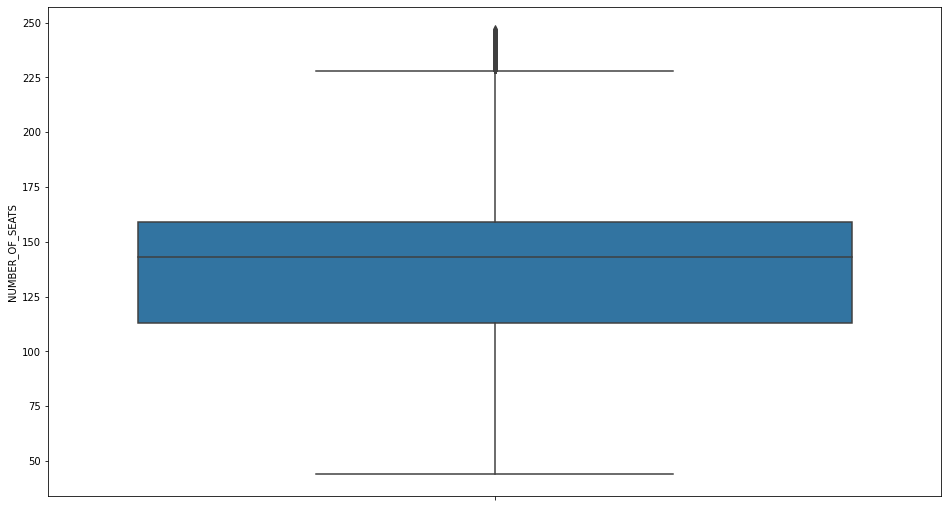

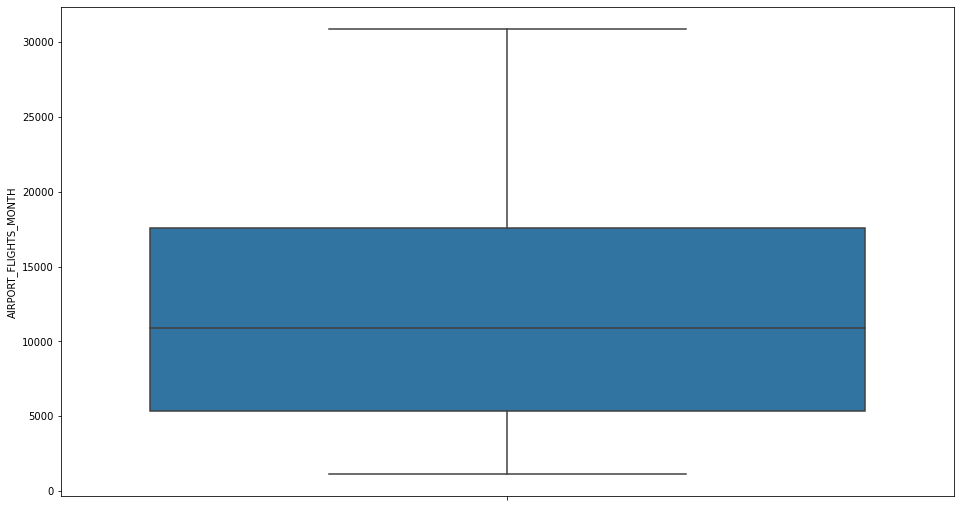

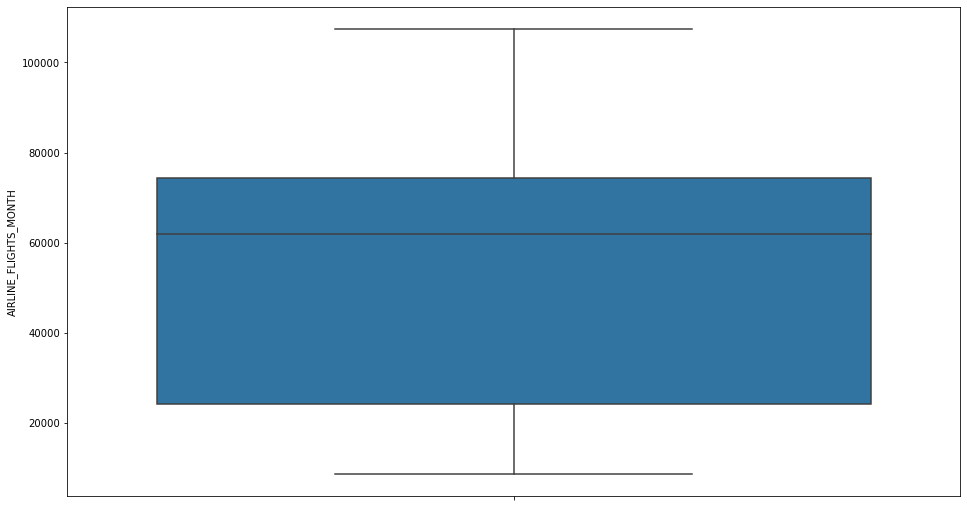

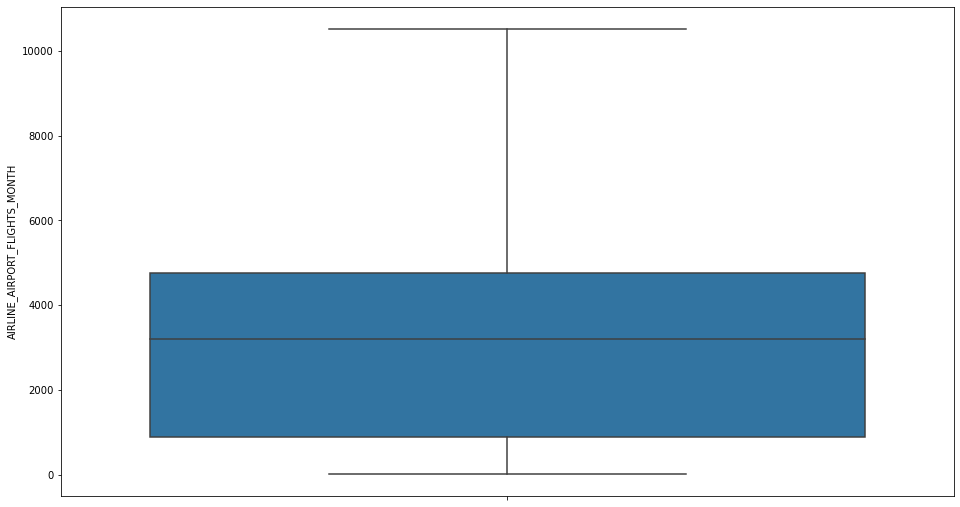

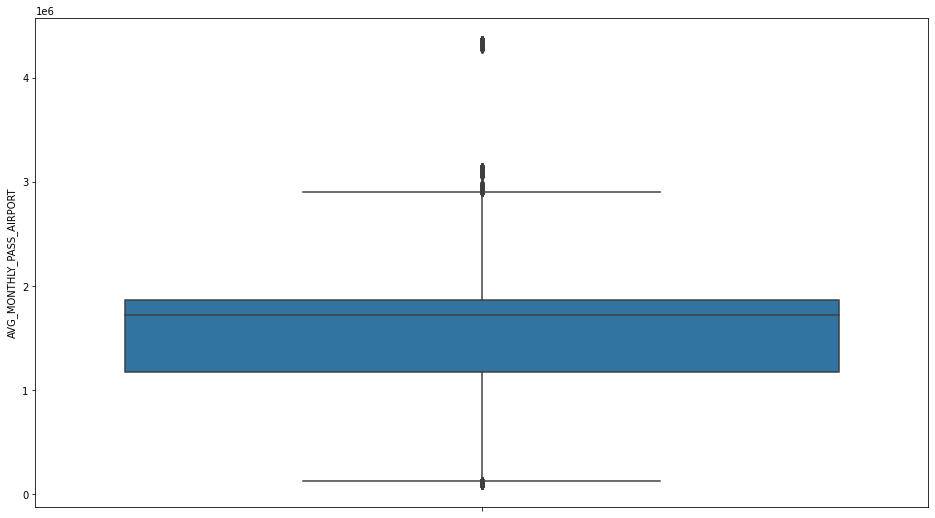

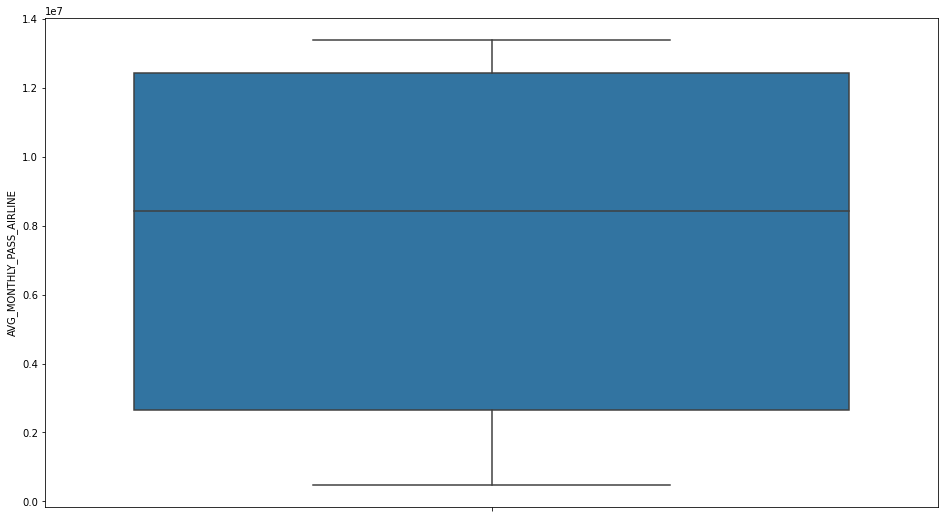

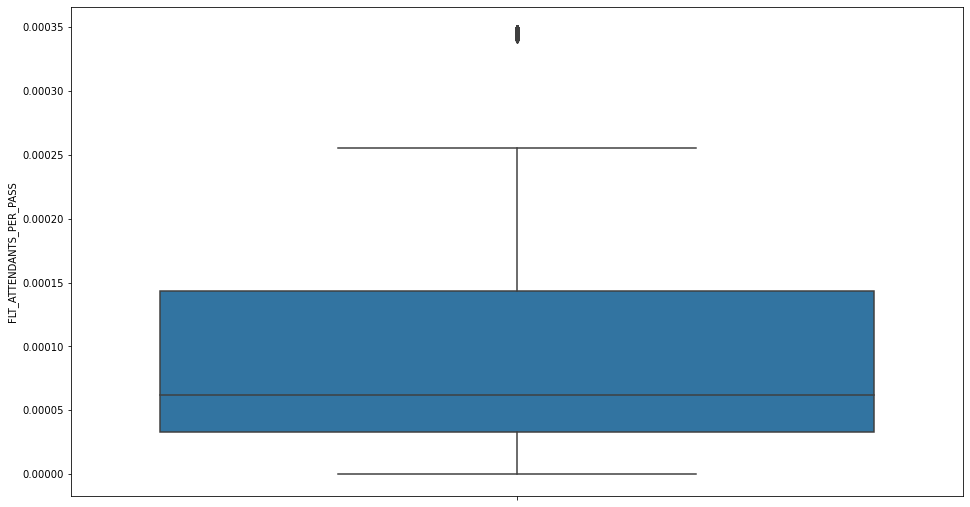

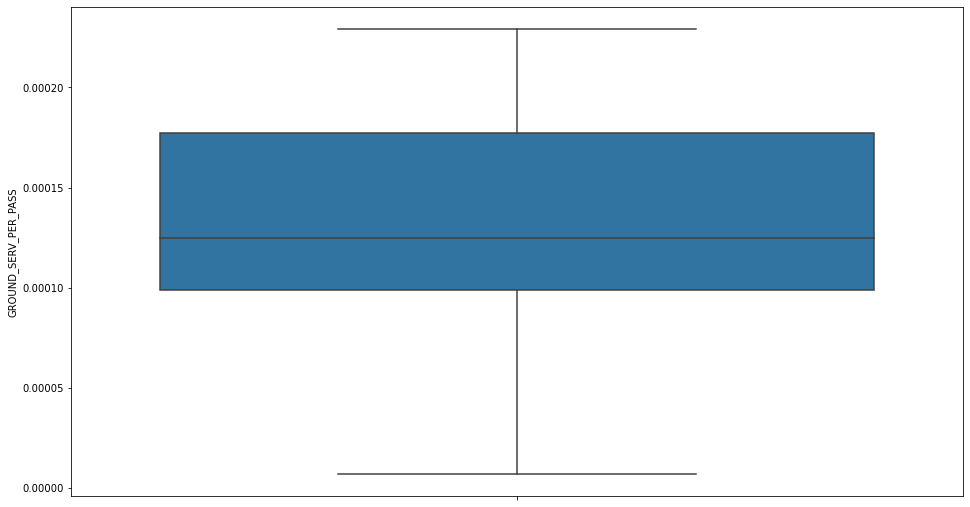

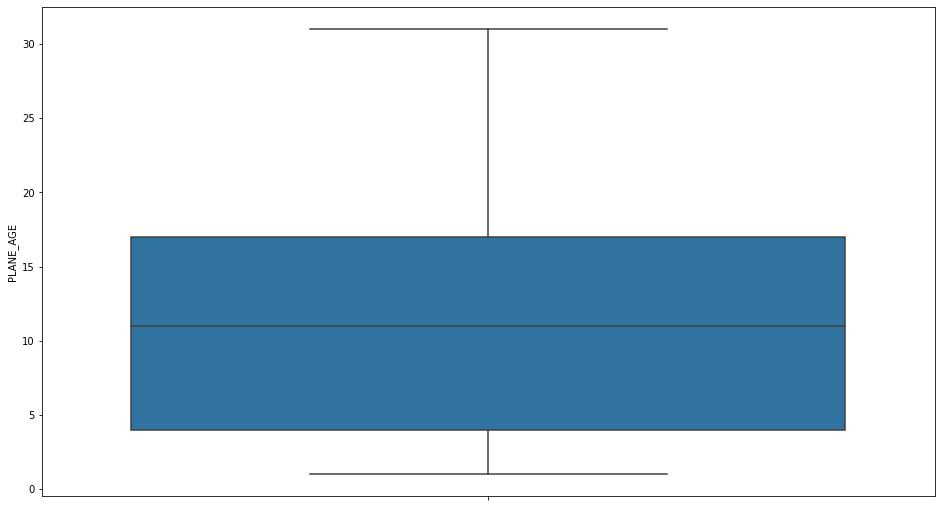

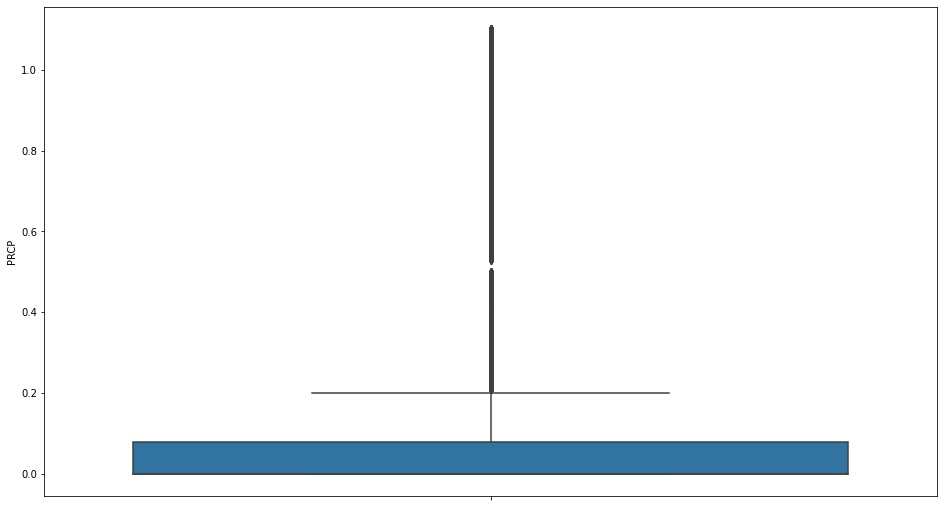

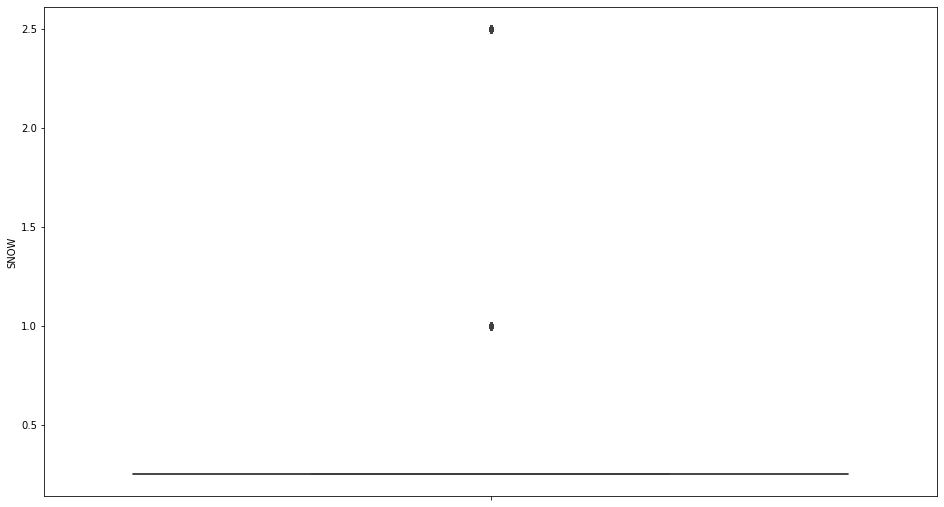

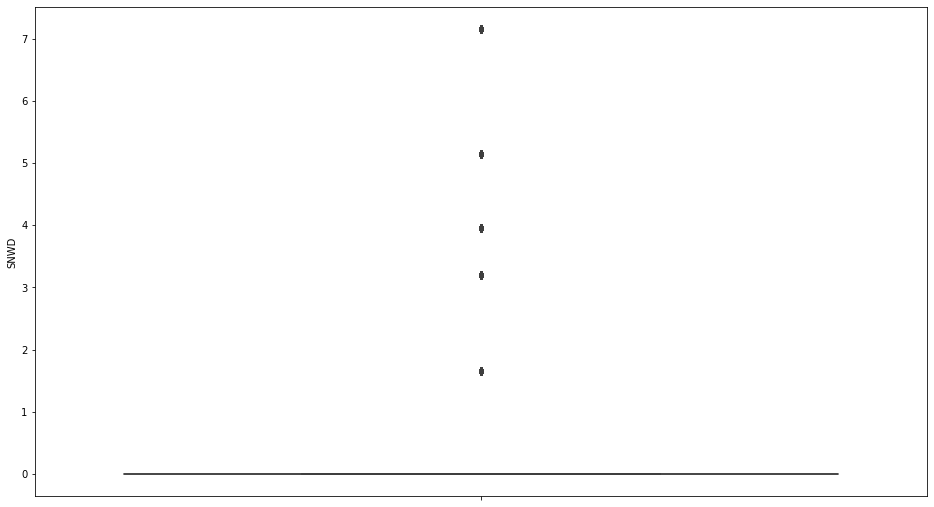

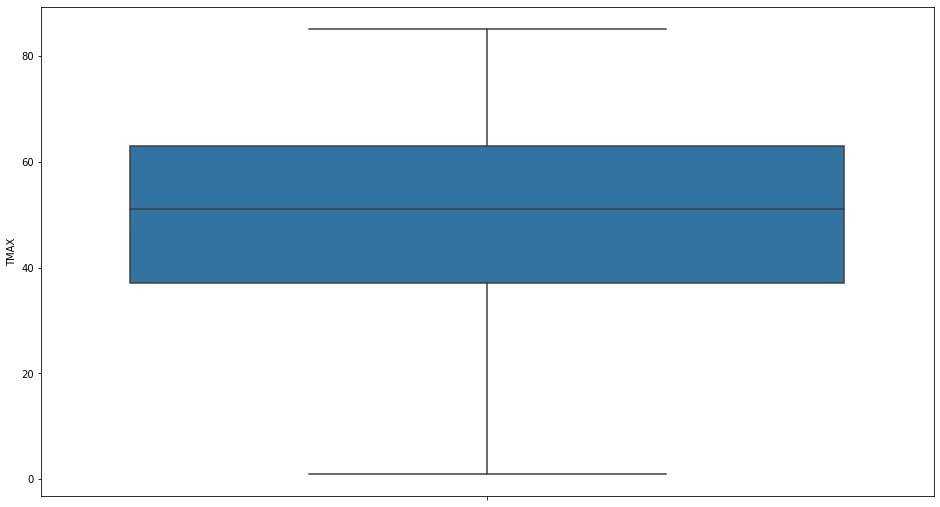

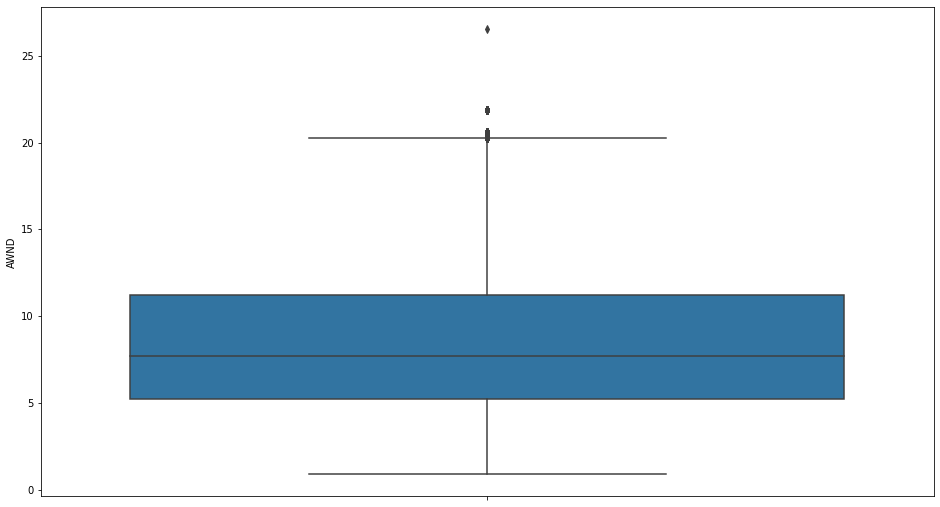

In [90]:
df_num = df.select_dtypes(include=np.number)
for i in df_num.columns:
    plt.figure(figsize=(16, 9))
    sns.boxplot(data=df_num, y=i)
    plt.show()

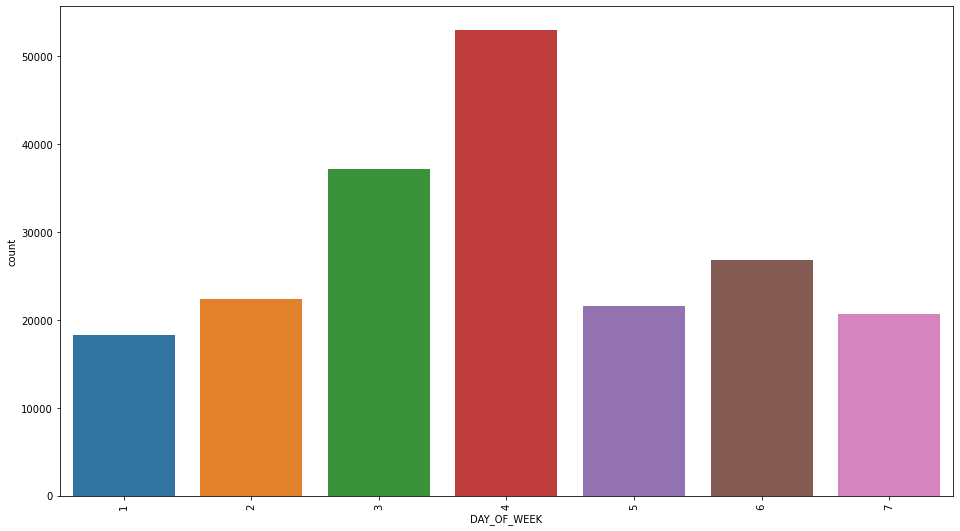

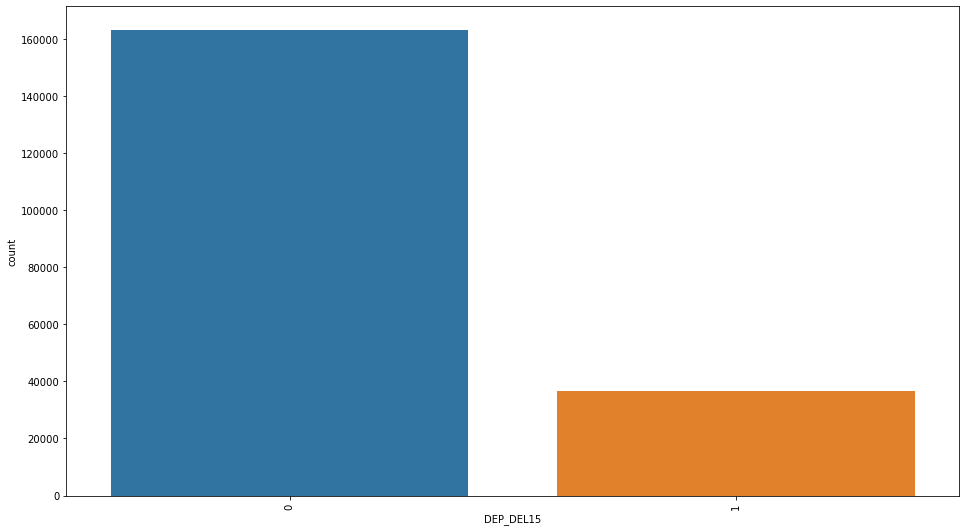

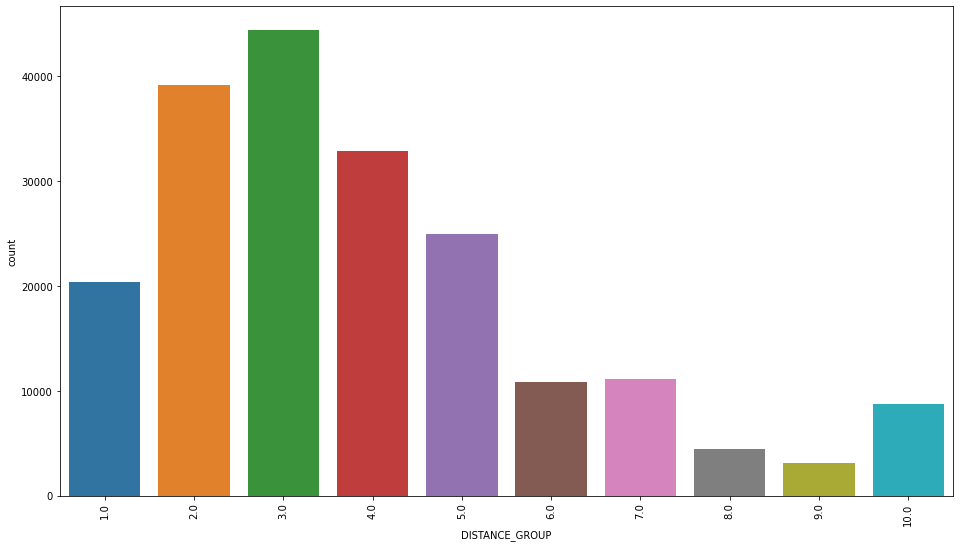

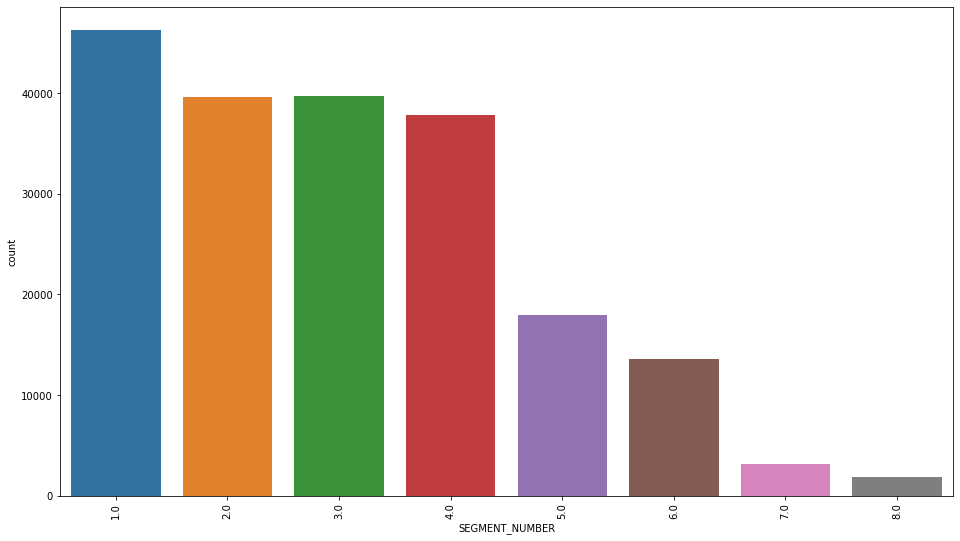

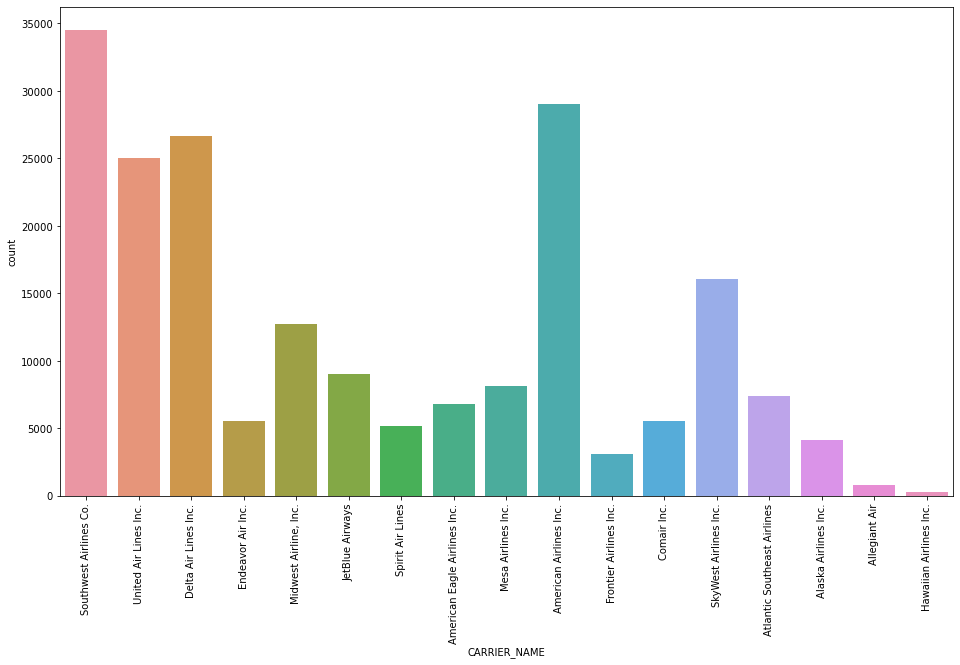

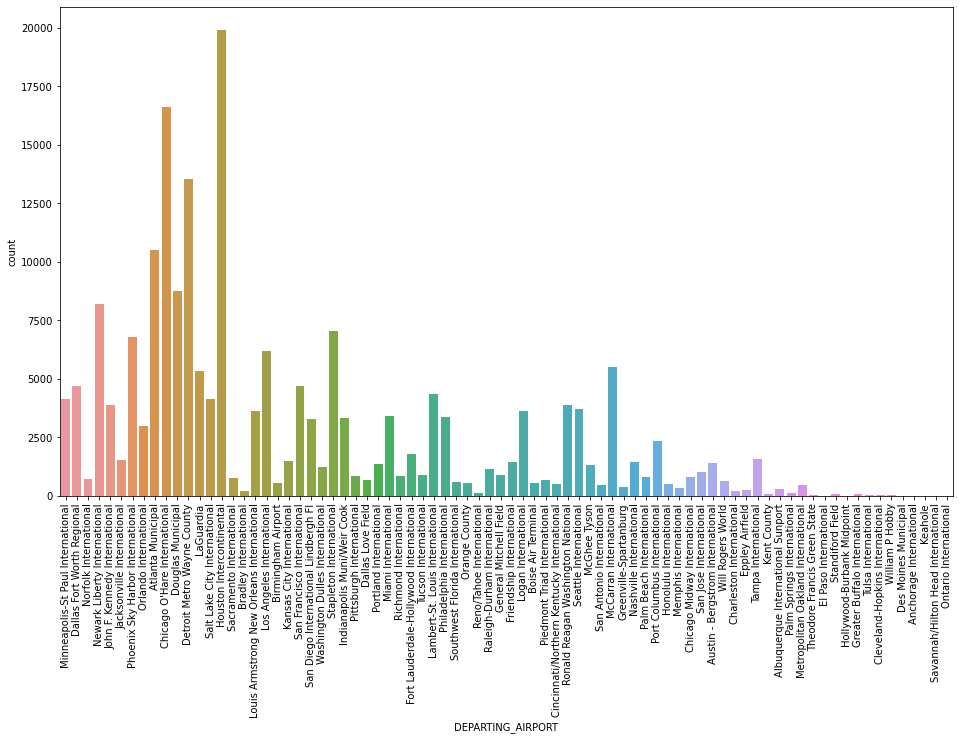

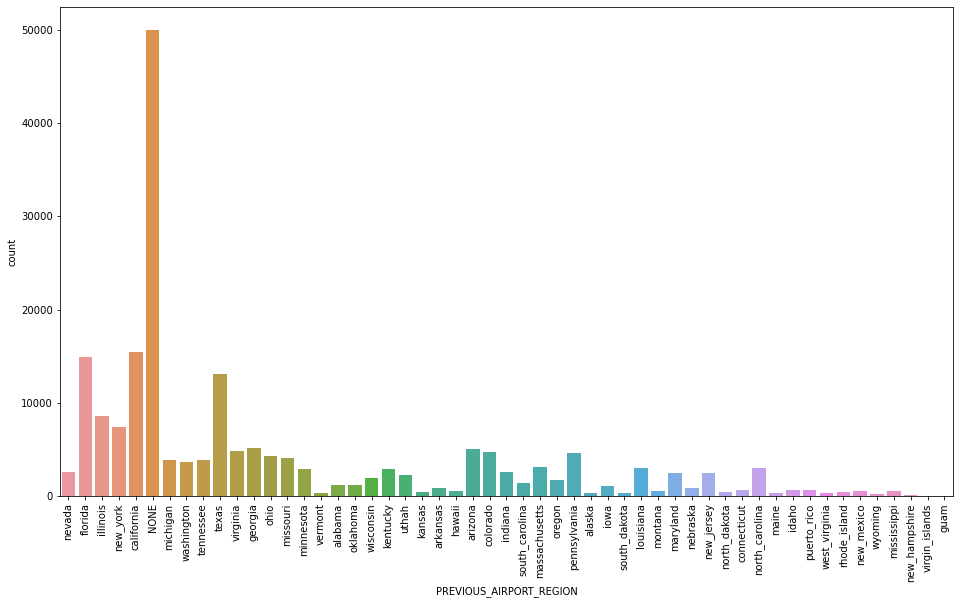

In [91]:
df_cat = df.select_dtypes(include='object')
for i in df_cat.columns:
    plt.figure(figsize=(16, 9))
    sns.countplot(data=df_cat, x=i)
    plt.xticks(rotation=90)
    plt.show()

**INFERENCES**

**CARRIER NAME** - MOST OF THE FLIGHTS ARE OF SOUTHWEST AIRLINES CO., AMERICAN AIRLINES INC. AND DELTA AIRLINES INC.

**DATE** -  HIGHEST NO. OF FLIGHTS WERE ON 4/01/2020, 03/01/2020 AND 06/01/2020.

**LOW** - HIGHEST OCCURENCES FOR LOW IS IN 0700, 




HIGHEST FREQUENCY OF FLIGHTS IS ON 4TH DAY FOLLOWED BY 3 AND 6

MOST OF THE FLIGHTS DID NOT GOT DELAYED BY 15 MINUTES AS 1 WAS FOR DELAY AND 0 WAS FOR NOT DELAYED 

IN THE DISTANCE_GROUP HIGHEST FREQUENCY IS FOR 3 FOLLOWED BY 2 AND 4 

# Bivariate Analysis

## CAT VS CAT 

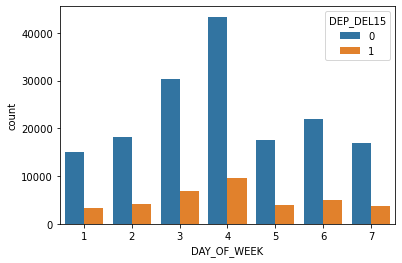

In [92]:
sns.countplot(x = df['DAY_OF_WEEK'], hue = df['DEP_DEL15'], data = df)
plt.show()

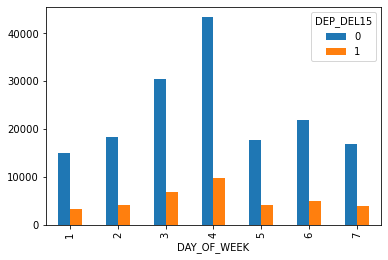

In [93]:
pd.crosstab(df.DAY_OF_WEEK, df.DEP_DEL15).plot(kind = 'bar')
plt.show()

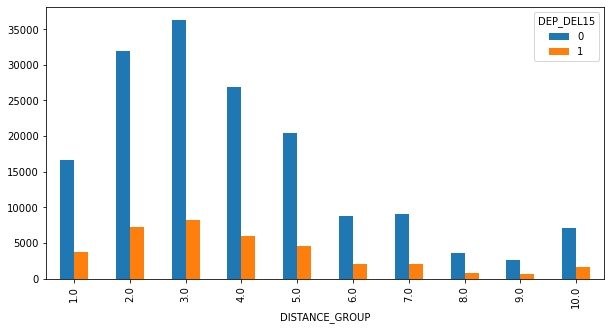

In [94]:
pd.crosstab(df['DISTANCE_GROUP'], df['DEP_DEL15']).plot(kind = 'bar', figsize = (10,5))
plt.show()

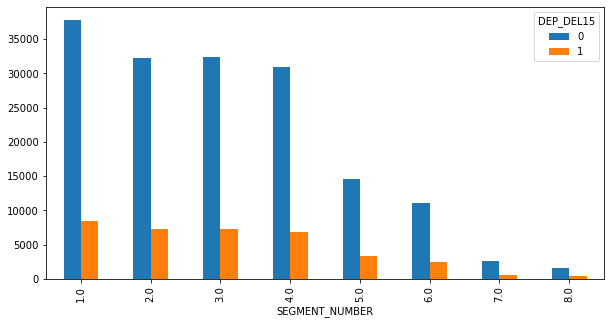

In [95]:
pd.crosstab(df['SEGMENT_NUMBER'], df['DEP_DEL15']).plot(kind = 'bar', figsize = (10,5))
plt.show()

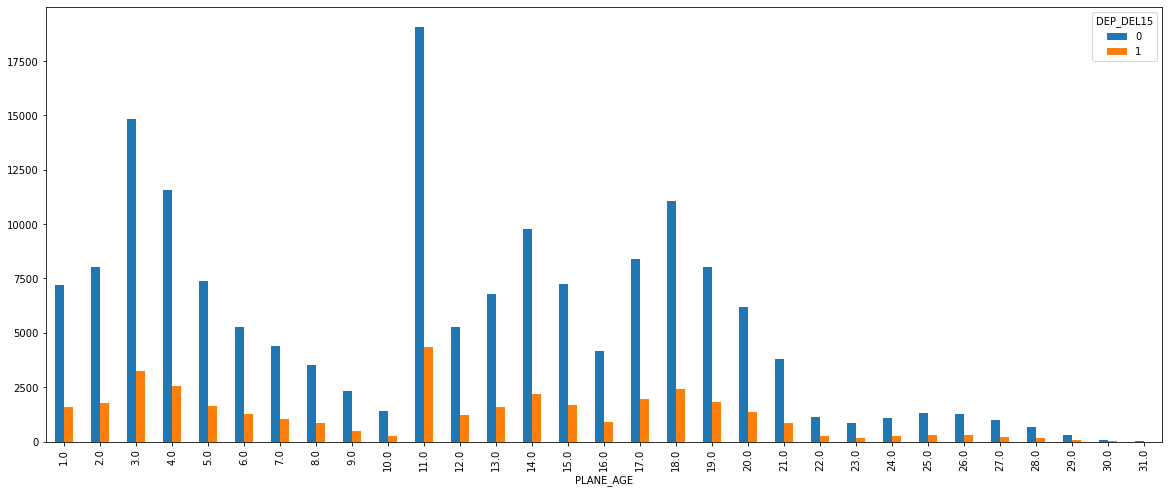

In [96]:
pd.crosstab(df['PLANE_AGE'], df['DEP_DEL15']).plot(kind = 'bar', figsize = (20,8))
plt.show()

## CATEGORICAL VS TARGET VARIABLE PLOTS: 

In [97]:
# sns.pairplot(df)
# plt.show()

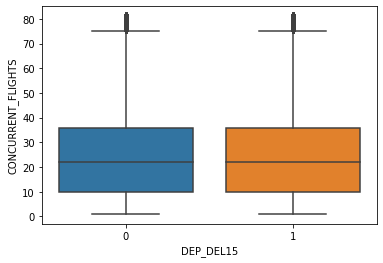

In [98]:
sns.boxplot(y = df['CONCURRENT_FLIGHTS'],x = df['DEP_DEL15'])
plt.show()

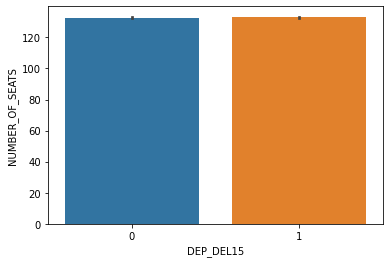

In [99]:
sns.barplot(y = df['NUMBER_OF_SEATS'],x = df['DEP_DEL15'])
plt.show()

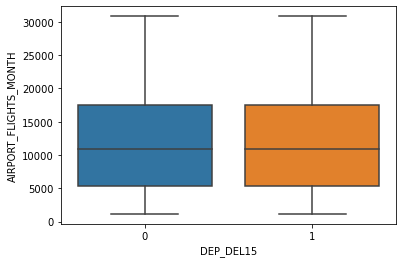

In [100]:
sns.boxplot(y = df['AIRPORT_FLIGHTS_MONTH'],x = df['DEP_DEL15'])
plt.show()

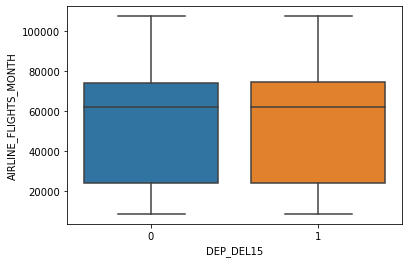

In [101]:
sns.boxplot(y = df['AIRLINE_FLIGHTS_MONTH'],x = df['DEP_DEL15'])
plt.show()

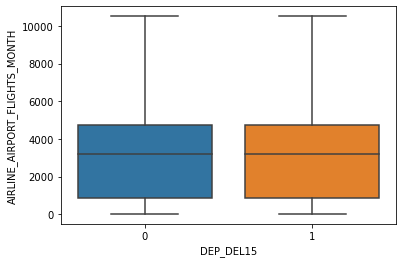

In [102]:
sns.boxplot(y = df['AIRLINE_AIRPORT_FLIGHTS_MONTH'],x = df['DEP_DEL15'])
plt.show()

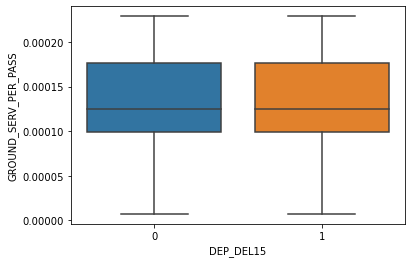

In [103]:
sns.boxplot(y = df['GROUND_SERV_PER_PASS'],x = df['DEP_DEL15'])
plt.show()

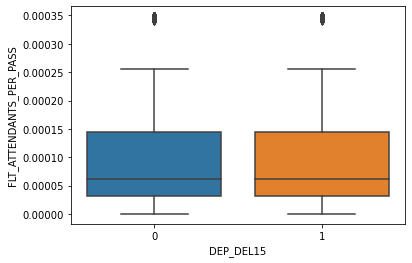

In [104]:
sns.boxplot(y = df['FLT_ATTENDANTS_PER_PASS'],x = df['DEP_DEL15'])
plt.show()

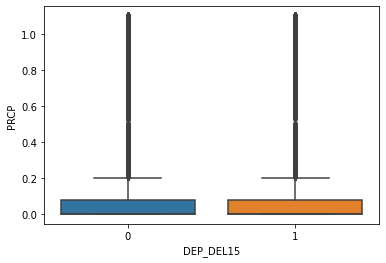

In [105]:
sns.boxplot(y = df['PRCP'],x = df['DEP_DEL15'])
plt.show()

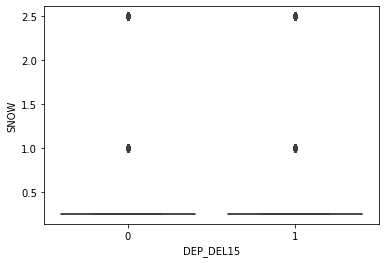

In [106]:
sns.boxplot(y = df['SNOW'],x = df['DEP_DEL15'])
plt.show()

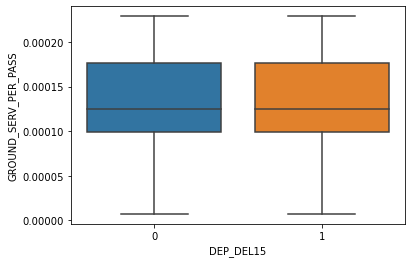

In [107]:
sns.boxplot(y = df['GROUND_SERV_PER_PASS'],x = df['DEP_DEL15'])
plt.show()

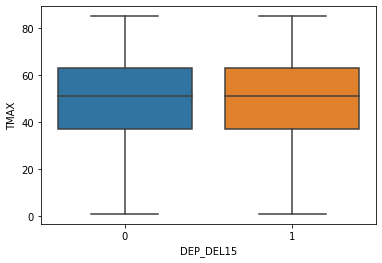

In [108]:
sns.boxplot(y = df['TMAX'],x = df['DEP_DEL15'])
plt.show()

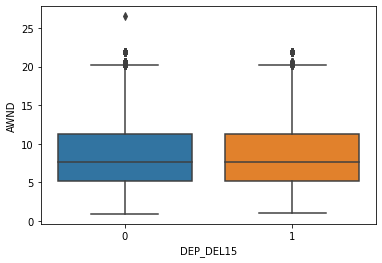

In [109]:
sns.boxplot(y = df['AWND'],x = df['DEP_DEL15'])
plt.show()

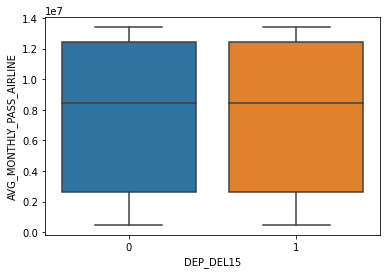

In [110]:
sns.boxplot(y = df['AVG_MONTHLY_PASS_AIRLINE'],x = df['DEP_DEL15'])
plt.show()

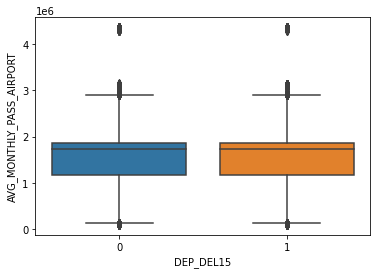

In [111]:
sns.boxplot(y = df['AVG_MONTHLY_PASS_AIRPORT'],x = df['DEP_DEL15'])
plt.show()

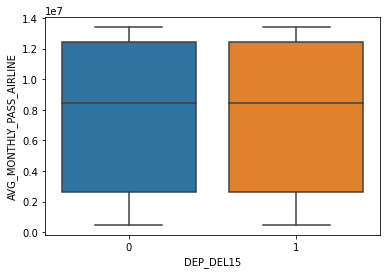

In [112]:
sns.boxplot(y = df['AVG_MONTHLY_PASS_AIRLINE'],x = df['DEP_DEL15'])
plt.show()

## NUMERICAL VS NUMERICAL INFERENCES

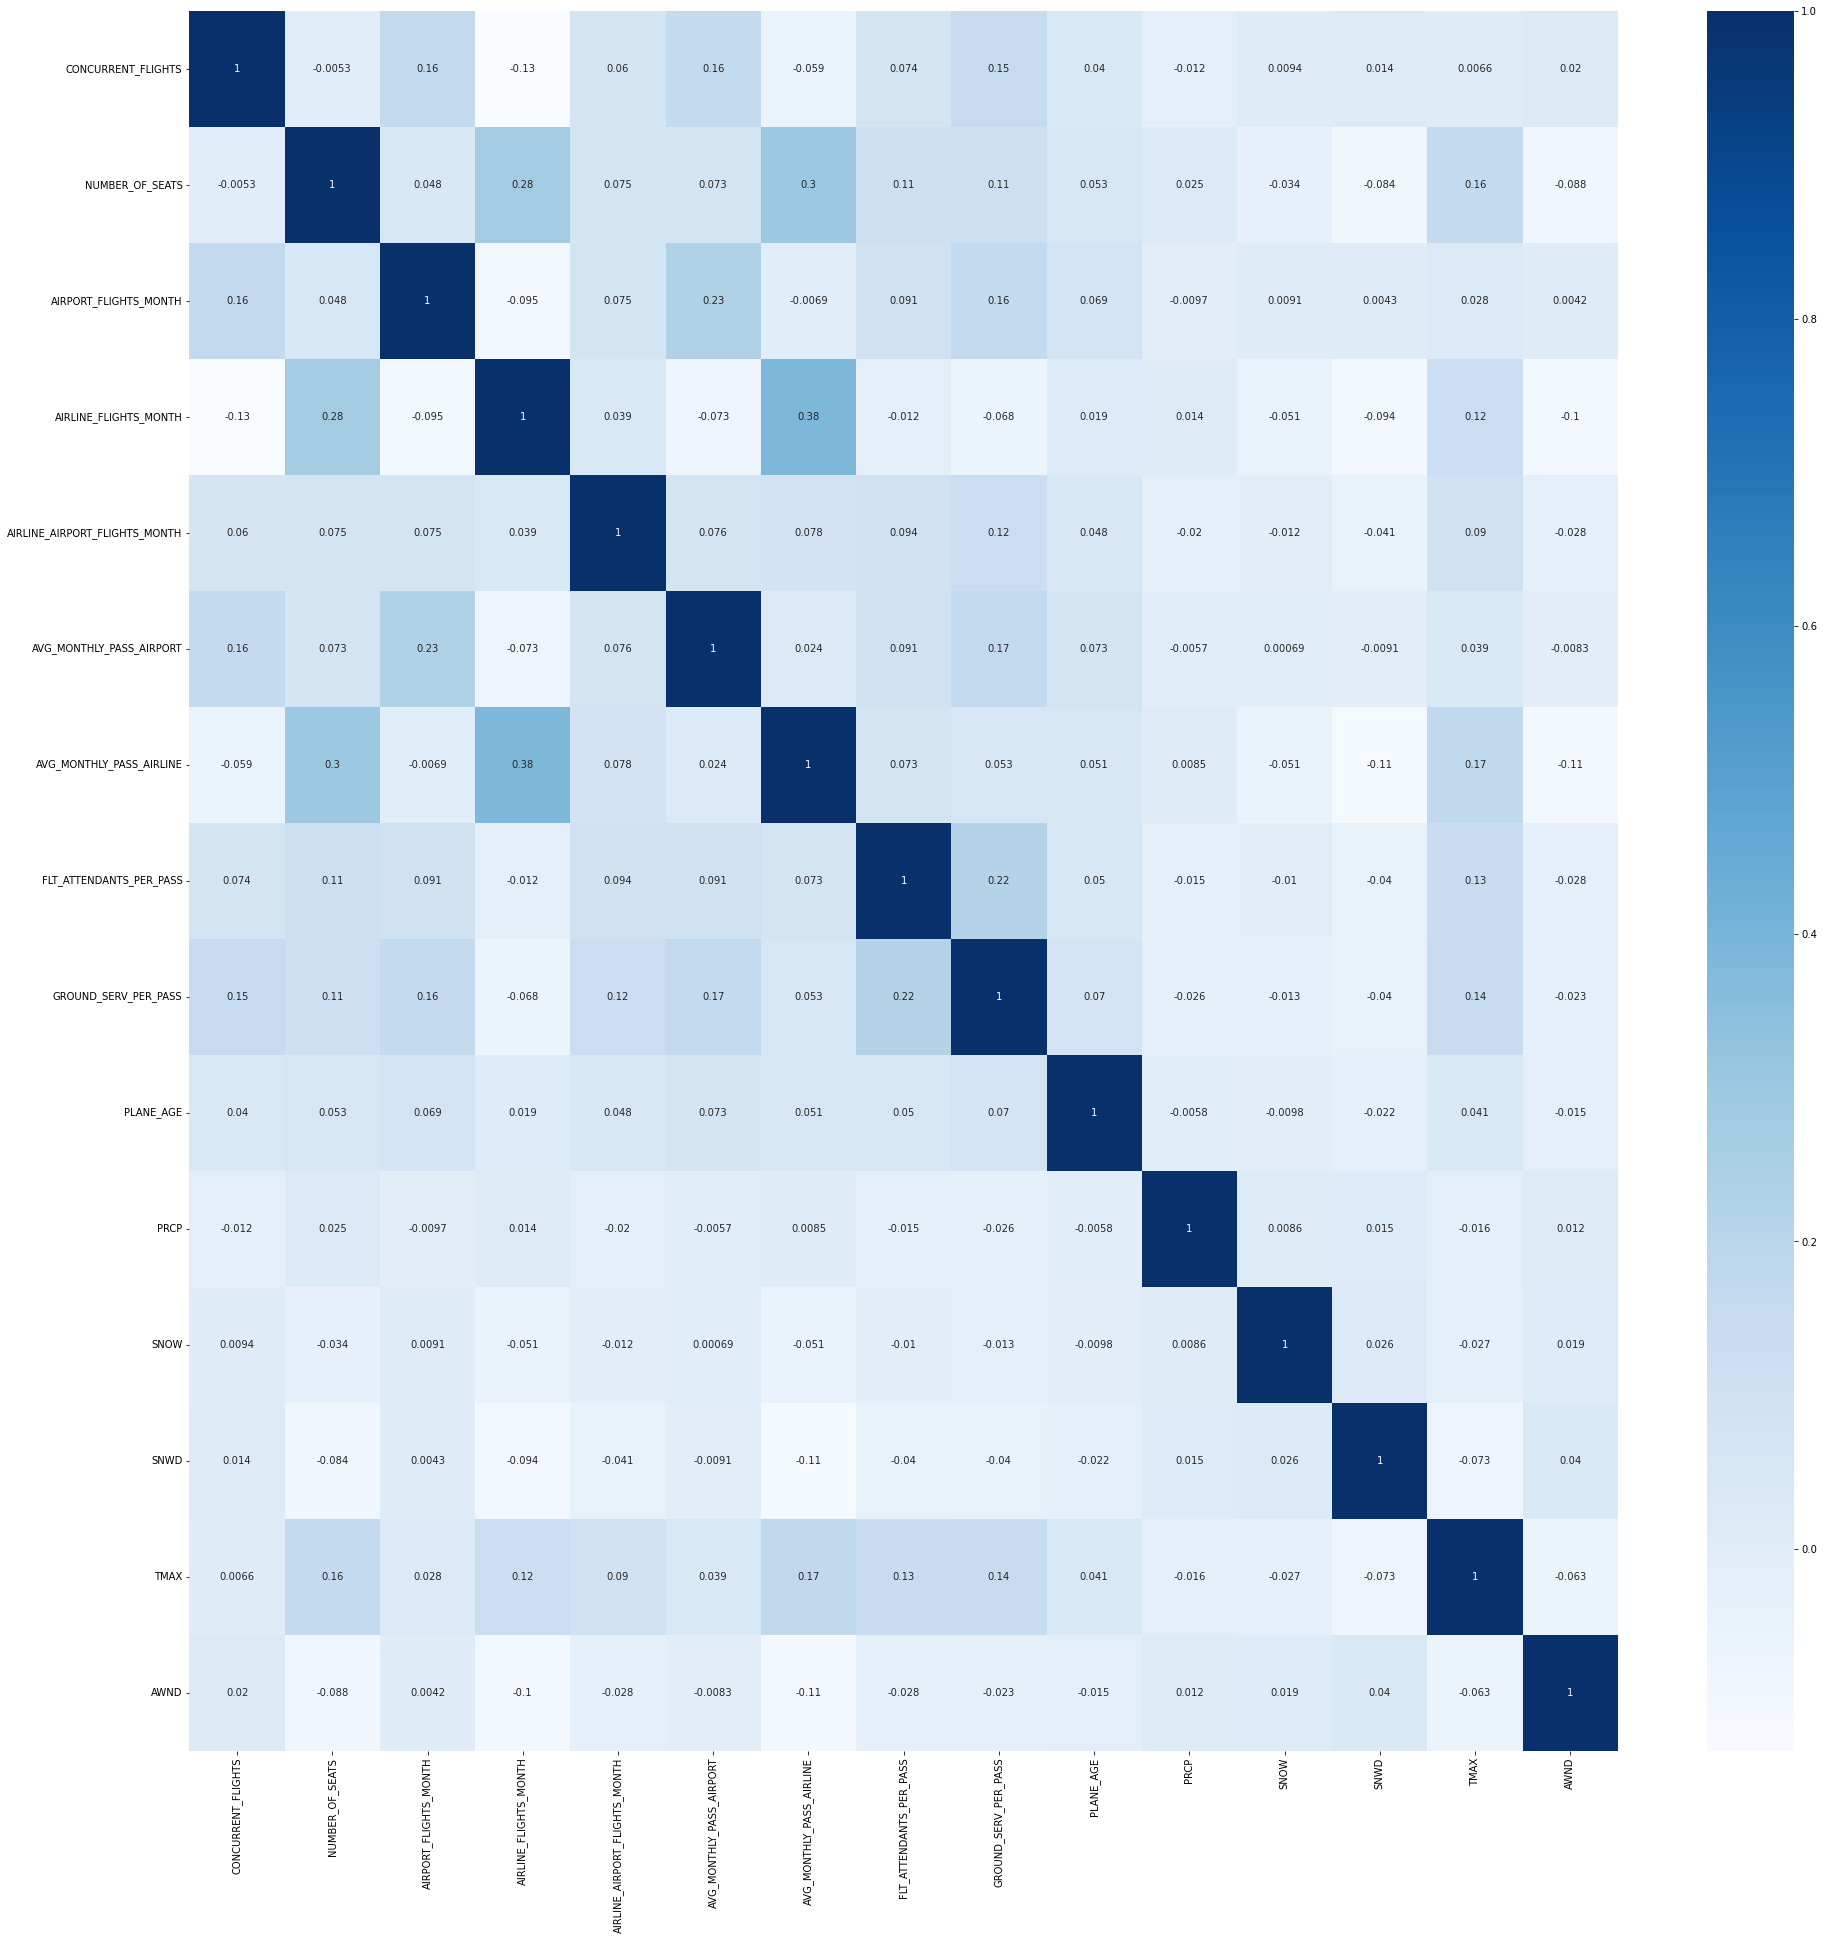

In [113]:
plt.figure(figsize=(32, 32))
sns.heatmap(df_num.corr(), cmap='Blues', annot=True)
plt.show()

In [114]:
categorical_features = identify_nominal_columns(df)
categorical_features

['DAY_OF_WEEK',
 'DEP_DEL15',
 'DISTANCE_GROUP',
 'SEGMENT_NUMBER',
 'CARRIER_NAME',
 'DEPARTING_AIRPORT',
 'PREVIOUS_AIRPORT_REGION']

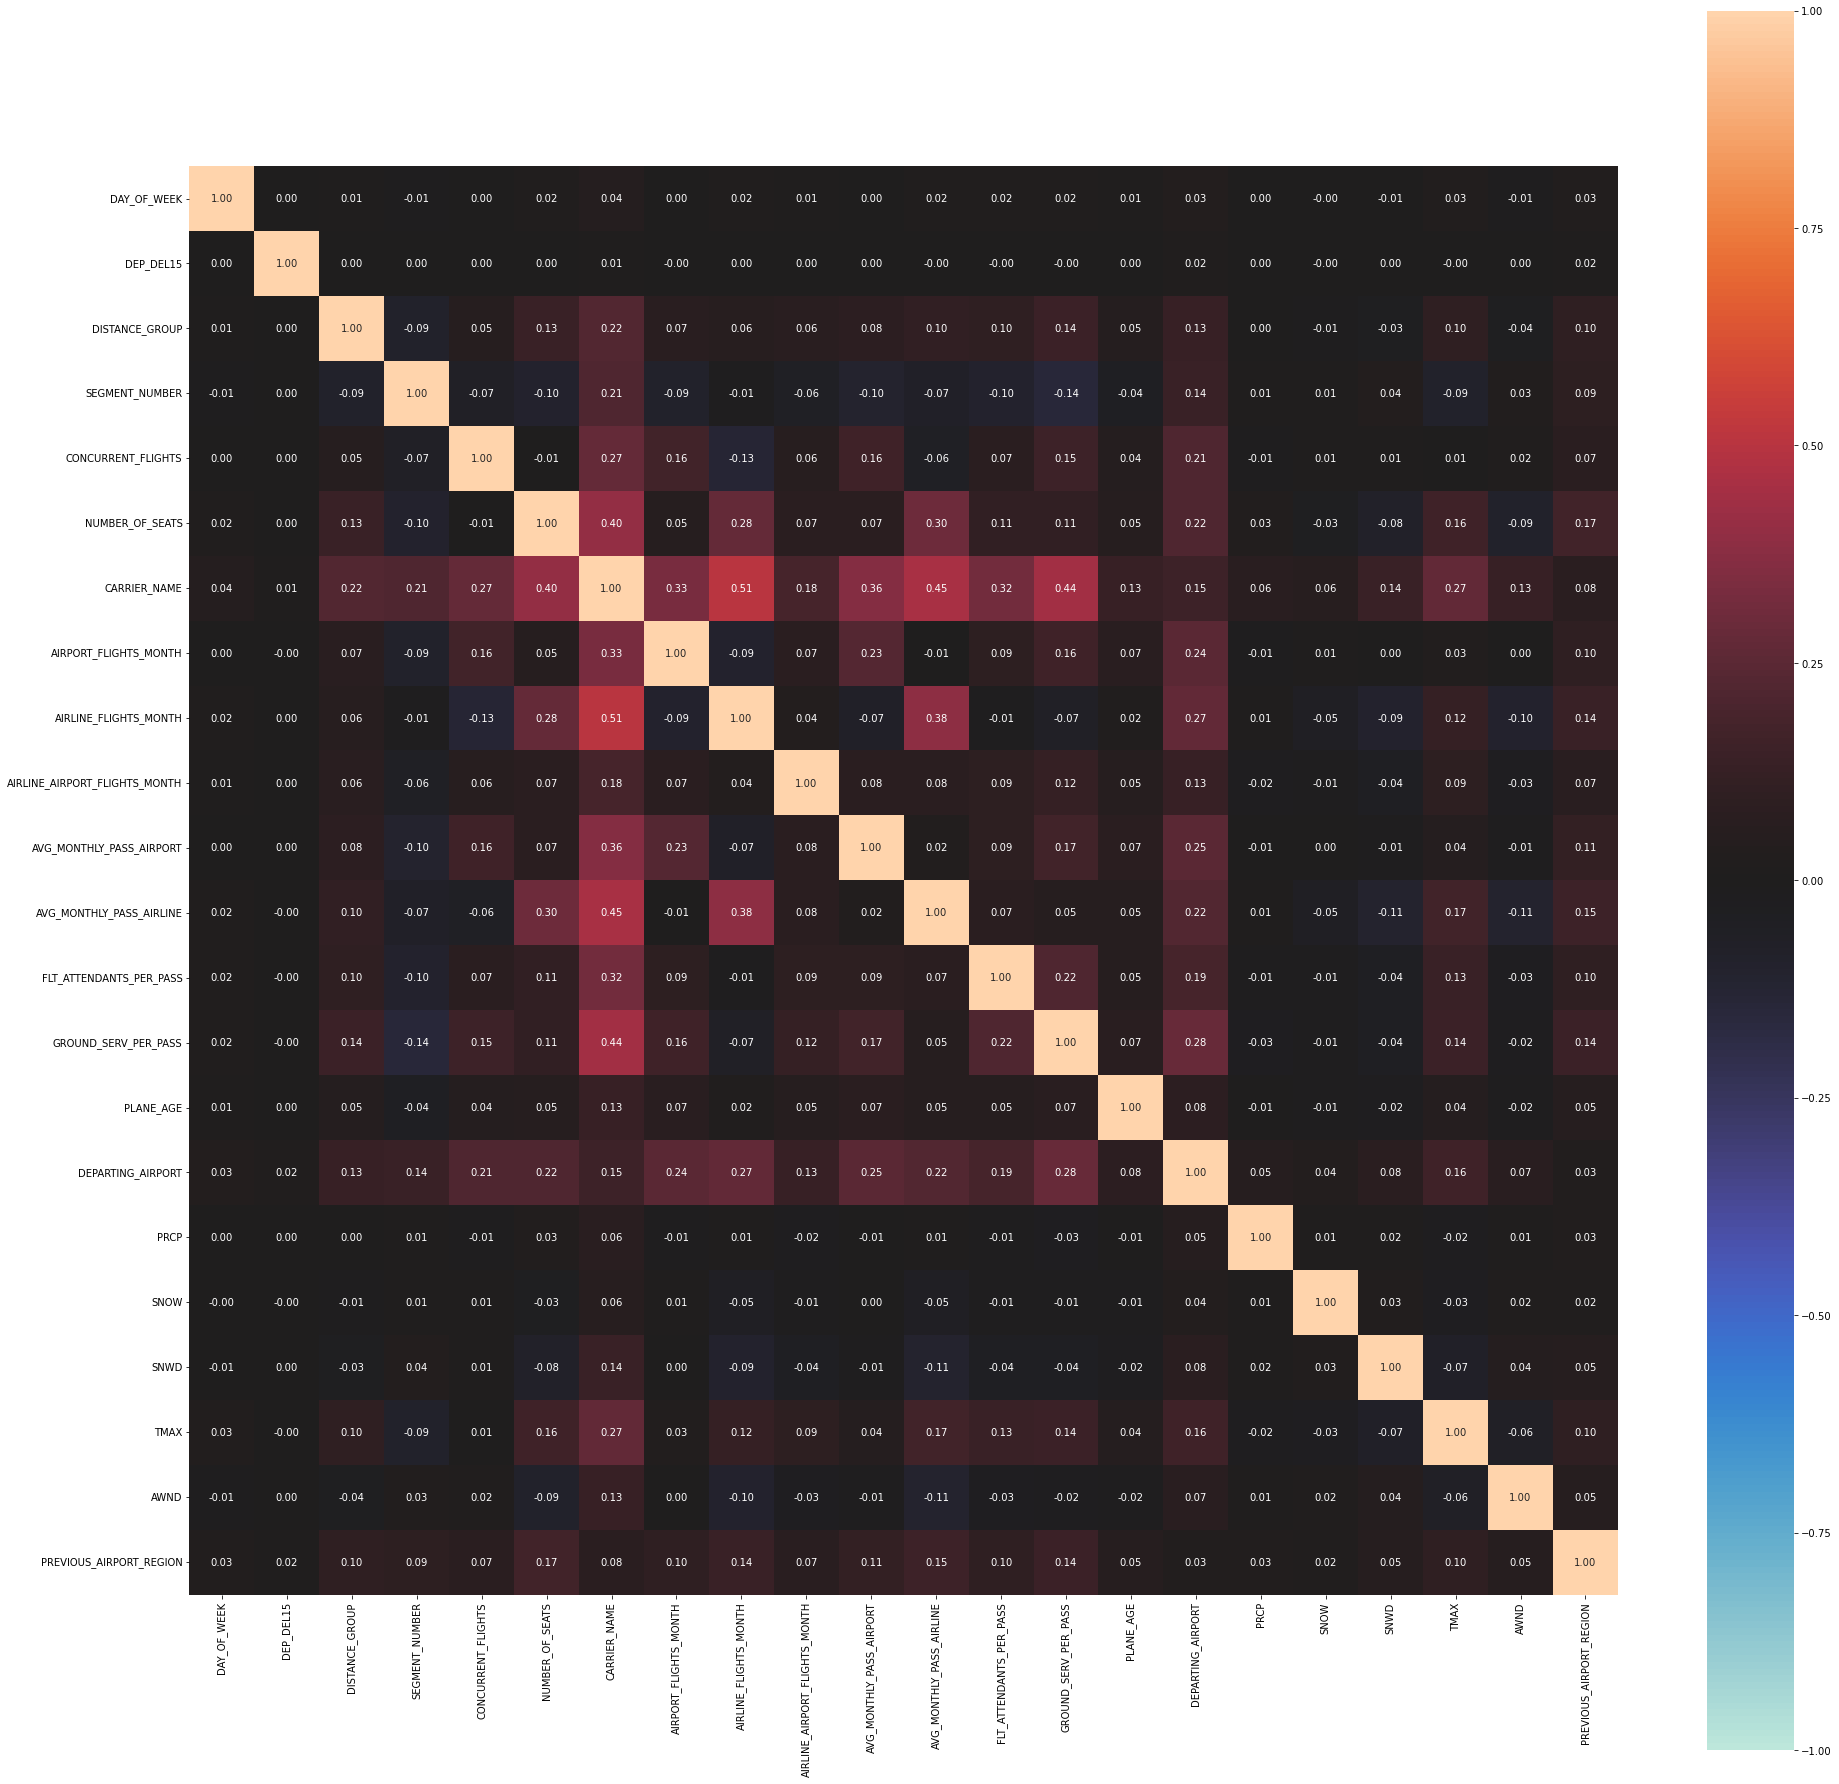

In [115]:
complete_correlation = associations(df, filename='complete_correlation.png',
                                    figsize=(32, 32))

In [116]:
selected_column = df[categorical_features]
categorical_df = selected_column.copy()

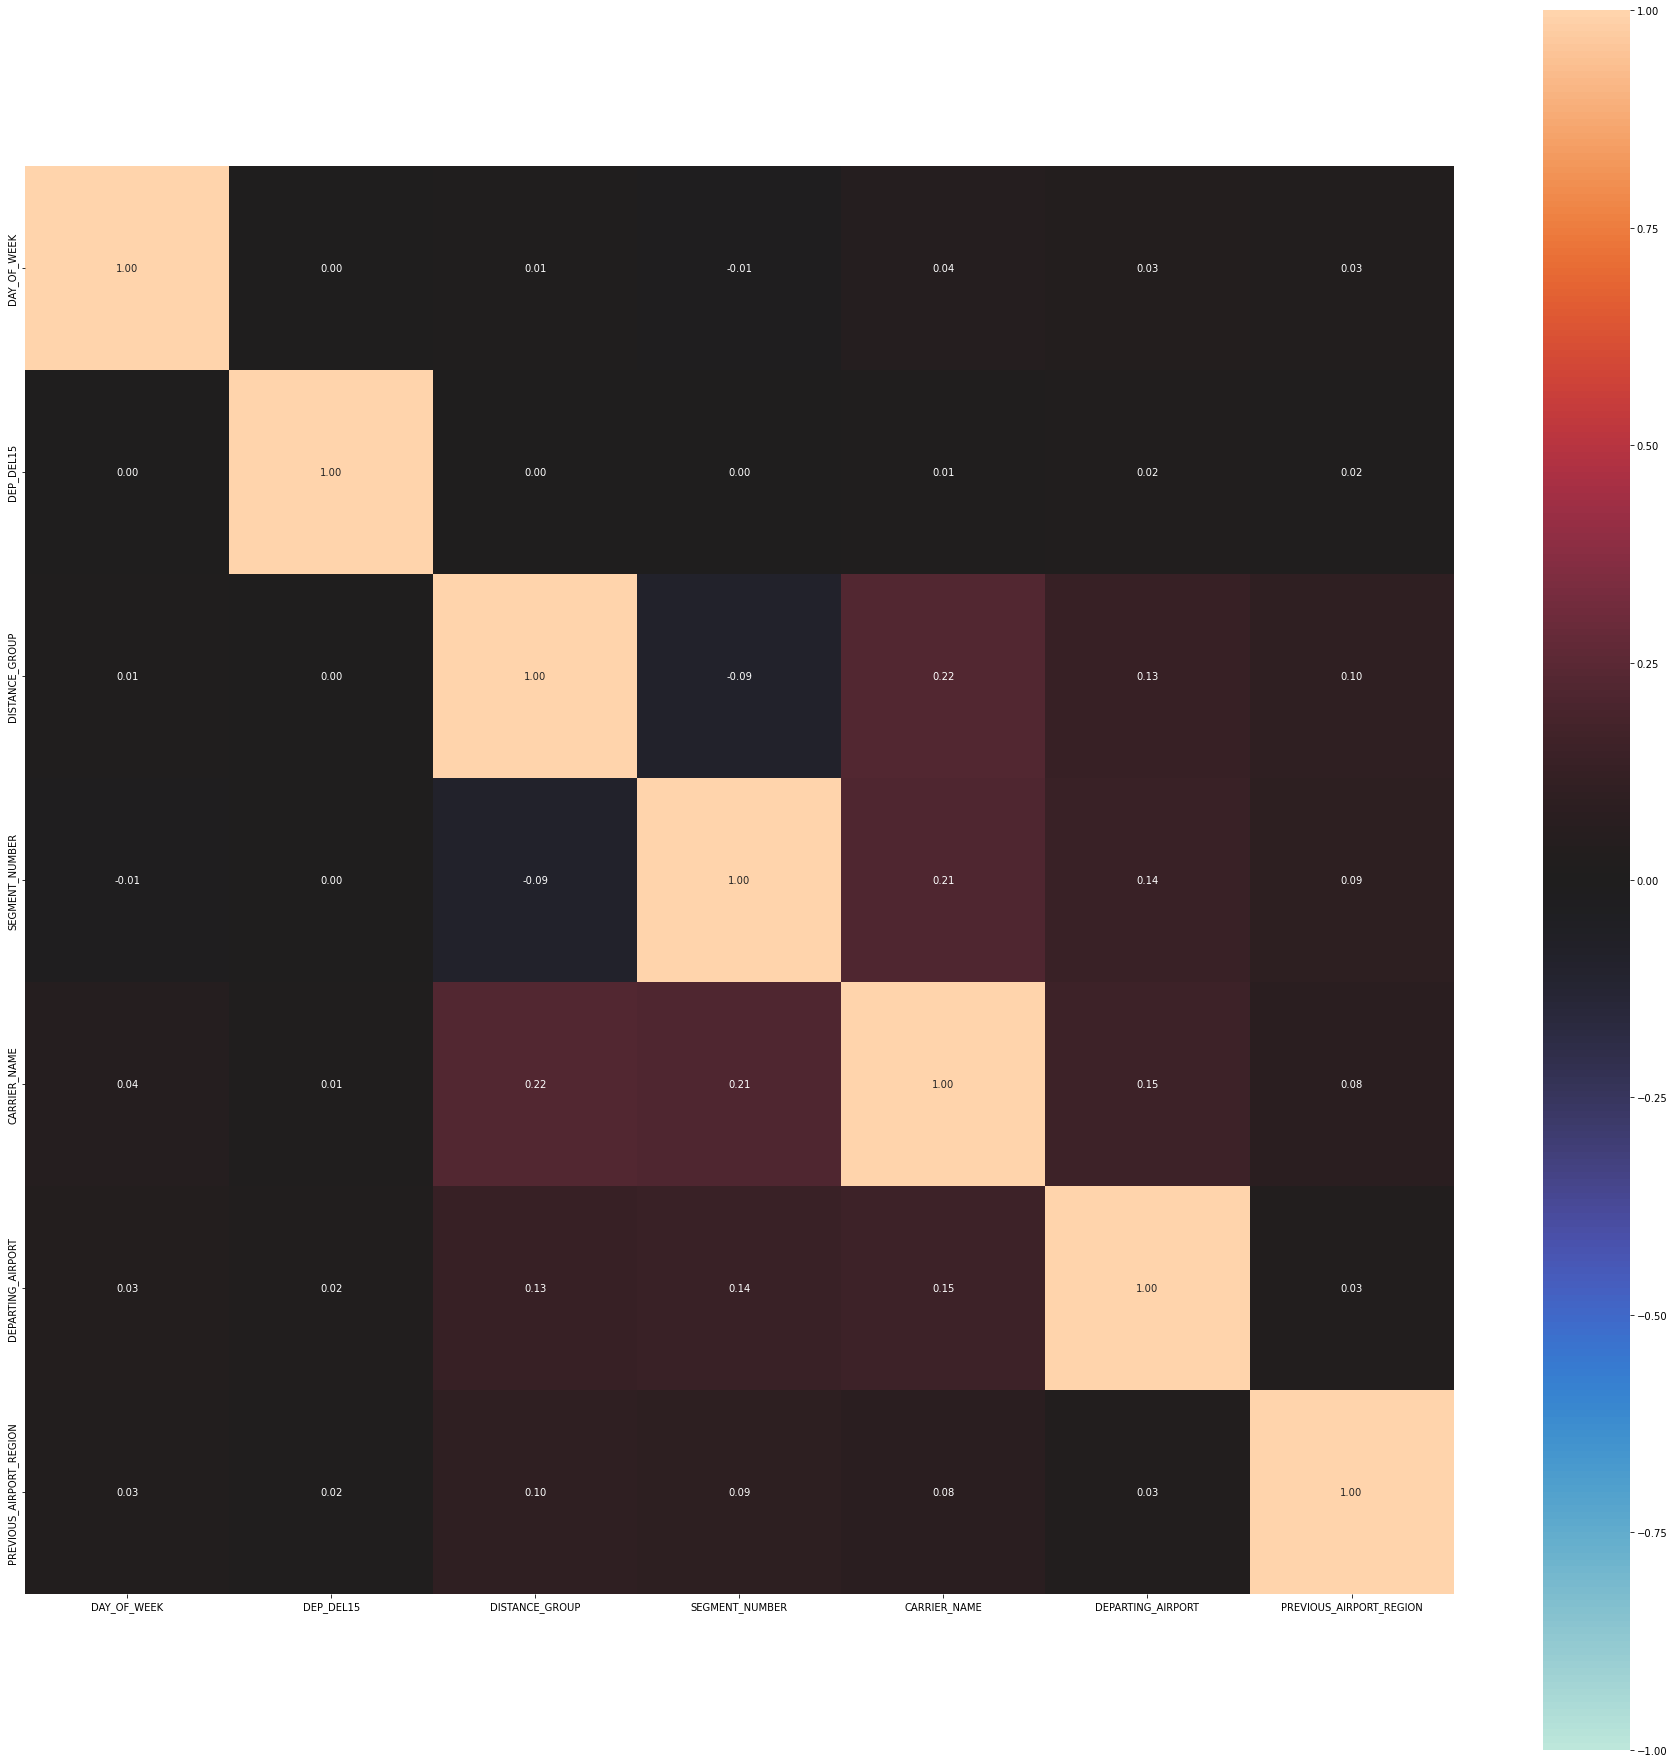

In [117]:
categorical_correlation = associations(categorical_df,
                                       filename='categorical_correlation.png',
                                       figsize=(32, 32))

# Train Test Split

In [118]:
df.select_dtypes(include=np.number).head()

,CONCURRENT_FLIGHTS,NUMBER_OF_SEATS,AIRPORT_FLIGHTS_MONTH,AIRLINE_FLIGHTS_MONTH,AIRLINE_AIRPORT_FLIGHTS_MONTH,AVG_MONTHLY_PASS_AIRPORT,AVG_MONTHLY_PASS_AIRLINE,FLT_ATTENDANTS_PER_PASS,GROUND_SERV_PER_PASS,PLANE_AGE,PRCP,SNOW,SNWD,TMAX,AWND
0,22.0,143.0,4728.0,107363.0,3201.0,2711399.0,13382999.0,0.000061,0.000099,11.0,0.00,0.25,0.00,51.0,4.93
1,25.0,76.0,4728.0,61899.0,189.0,1022110.0,3027151.0,0.000116,0.000099,2.0,0.00,0.25,0.00,57.0,4.93
2,19.0,174.0,4728.0,45432.0,94.0,1686287.0,2742196.0,0.000000,0.000099,11.0,0.00,0.25,0.00,77.0,7.58
3,28.0,143.0,4150.0,61925.0,684.0,165157.0,13382999.0,0.000000,0.000099,6.0,0.00,0.25,1.65,39.0,6.98
4,28.0,49.0,7565.0,23248.0,277.0,1485501.0,11680845.0,0.000098,0.000177,6.0,0.34,0.25,1.65,35.0,13.79


In [119]:
X = df.drop(columns=['DEP_DEL15'], axis=1)
y = df.DEP_DEL15
xtrain, xtest, ytrain, ytest = train_test_split(X, y,
                                                test_size=0.3,
                                                random_state=0)

# Scaling Data

In [120]:
xtrain_num = xtrain.select_dtypes(include=np.number)
xtrain_cat = xtrain.select_dtypes(include='object')

In [121]:
xtest_num = xtest.select_dtypes(include=np.number)
xtest_cat = xtest.select_dtypes(include='object')

In [122]:
df_num = df.select_dtypes(include=np.number)
df_cat = df.select_dtypes(include=object)

In [123]:
df_num.columns, df_cat.columns, len(df_num.columns), len(df_cat.columns)

(Index(['CONCURRENT_FLIGHTS', 'NUMBER_OF_SEATS', 'AIRPORT_FLIGHTS_MONTH',
        'AIRLINE_FLIGHTS_MONTH', 'AIRLINE_AIRPORT_FLIGHTS_MONTH',
        'AVG_MONTHLY_PASS_AIRPORT', 'AVG_MONTHLY_PASS_AIRLINE',
        'FLT_ATTENDANTS_PER_PASS', 'GROUND_SERV_PER_PASS', 'PLANE_AGE', 'PRCP',
        'SNOW', 'SNWD', 'TMAX', 'AWND'],
       dtype='object'),
 Index(['DAY_OF_WEEK', 'DEP_DEL15', 'DISTANCE_GROUP', 'SEGMENT_NUMBER',
        'CARRIER_NAME', 'DEPARTING_AIRPORT', 'PREVIOUS_AIRPORT_REGION'],
       dtype='object'),
 15,
 7)

In [124]:
rscalable = ['AIRLINE_FLIGHTS_MONTH', 'PRCP', 'SNOW', 'SNWD']
sscalable = ['TMAX']
mmscalable = ['NUMBER_OF_SEATS', 'AVG_MONTHLY_PASS_AIRLINE',
              'GROUND_SERV_PER_PASS', 'PLANE_AGE', 'CONCURRENT_FLIGHTS',
              'AIRLINE_AIRPORT_FLIGHTS_MONTH', 'AVG_MONTHLY_PASS_AIRPORT',
              'FLT_ATTENDANTS_PER_PASS', 'AIRPORT_FLIGHTS_MONTH', 'AWND']

rdf_train = xtrain_num[rscalable]
rdf_test = xtest_num[rscalable]
ssdf_train = xtrain_num[sscalable]
ssdf_test = xtest_num[sscalable]
mmdf_train = xtrain_num[mmscalable]
mmdf_test = xtest_num[mmscalable]
rdf_train.shape, rdf_test.shape, ssdf_train.shape, ssdf_test.shape, mmdf_train.shape, mmdf_test.shape

((140000, 4), (60000, 4), (140000, 1), (60000, 1), (140000, 10), (60000, 10))

In [125]:
transformer = RobustScaler()
rdf_train_scaled = transformer.fit_transform(rdf_train)
rdf_train_scaled = pd.DataFrame(rdf_train_scaled,
                                columns=rdf_train.columns)
rdf_test_scaled = transformer.fit_transform(rdf_test)
rdf_test_scaled = pd.DataFrame(rdf_test_scaled,
                               columns=rdf_test.columns)

In [126]:
transformer = StandardScaler()
ssdf_train_scaled = transformer.fit_transform(ssdf_train)
ssdf_train_scaled = pd.DataFrame(ssdf_train_scaled,
                                 columns=ssdf_train.columns)
ssdf_test_scaled = transformer.fit_transform(ssdf_test)
ssdf_test_scaled = pd.DataFrame(ssdf_test_scaled,
                                columns=ssdf_test.columns)

In [127]:
transformer = MinMaxScaler()
mmdf_train_scaled = transformer.fit_transform(mmdf_train)
mmdf_train_scaled = pd.DataFrame(mmdf_train_scaled,
                                 columns=mmdf_train.columns)
mmdf_test_scaled = transformer.fit_transform(mmdf_test)
mmdf_test_scaled = pd.DataFrame(mmdf_test_scaled,
                                columns=mmdf_test.columns)

# Transforming Data

In [128]:
xtrain_num = pd.concat([rdf_train_scaled, ssdf_train_scaled,
                        mmdf_train_scaled], axis=1)
xtrain_num.shape

(140000, 15)

In [129]:
xtest_num = pd.concat([rdf_test_scaled, ssdf_test_scaled,
                       mmdf_test_scaled], axis=1)
xtest_num.shape

(60000, 15)

In [130]:
normal = ['AIRLINE_FLIGHTS_MONTH', 'TMAX']
left_skew = ['NUMBER_OF_SEATS', 'AVG_MONTHLY_PASS_AIRLINE']
right_skew = ['CONCURRENT_FLIGHTS', 'AIRLINE_AIRPORT_FLIGHTS_MONTH',
              'AVG_MONTHLY_PASS_AIRPORT', 'FLT_ATTENDANTS_PER_PASS',
              'AIRPORT_FLIGHTS_MONTH', 'PRCP', 'SNOW', 'SNWD', 'AWND',
              'GROUND_SERV_PER_PASS', 'PLANE_AGE']

ndf_train = xtrain_num[normal]
ndf_test = xtest_num[normal]
ldf_train = xtrain_num[left_skew]
ldf_test = xtest_num[left_skew]
rdf_train = xtrain_num[right_skew]
rdf_test = xtest_num[right_skew]
ndf_train.shape, ndf_test.shape, ldf_train.shape, ldf_test.shape, rdf_train.shape, rdf_test.shape

((140000, 2), (60000, 2), (140000, 2), (60000, 2), (140000, 11), (60000, 11))

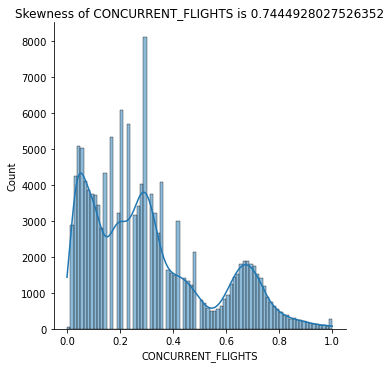

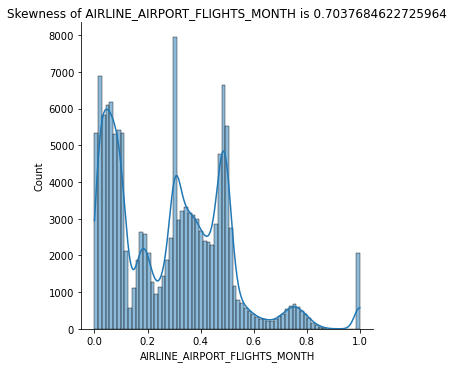

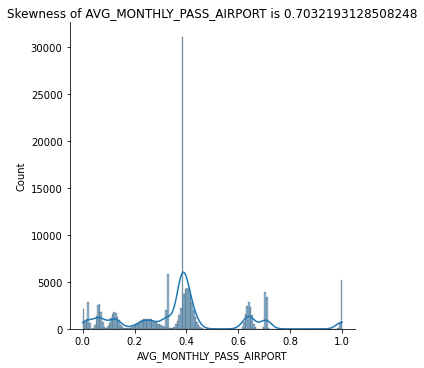

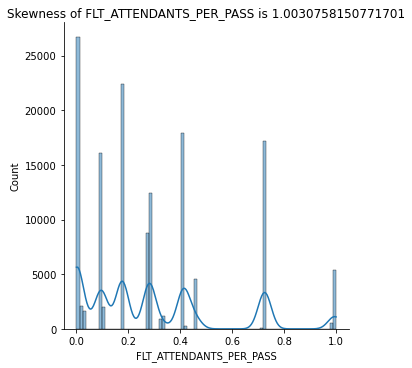

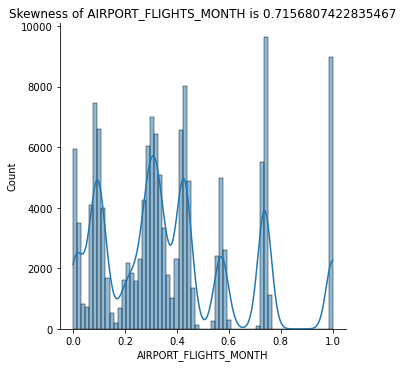

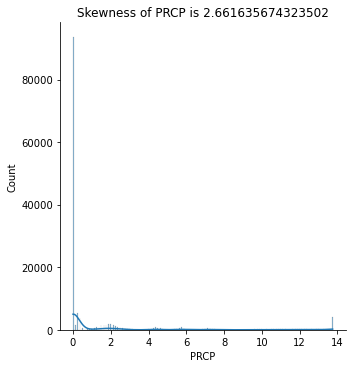

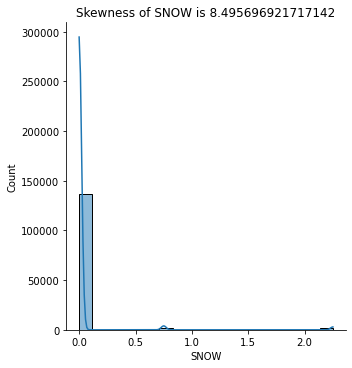

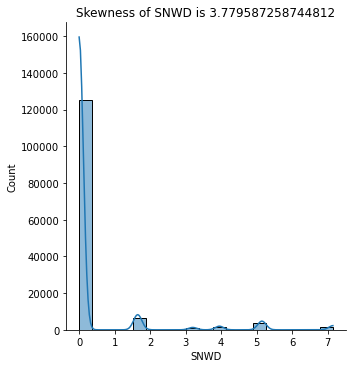

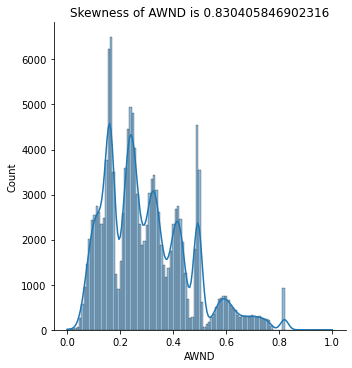

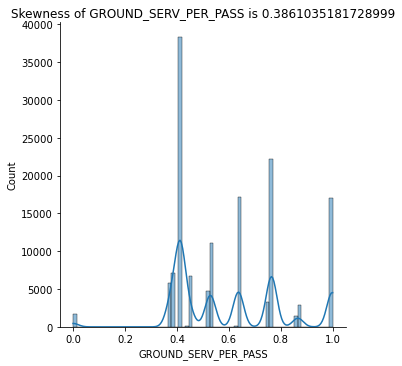

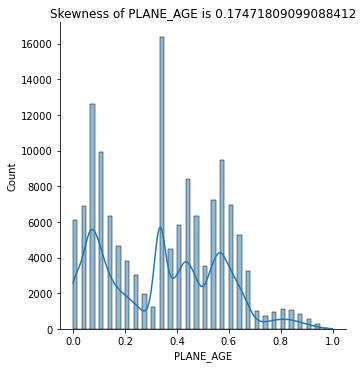

In [131]:
for i in rdf_train.columns:
    sns.displot(data=rdf_train, x=i, kde=True)
    plt.title(f'Skewness of {i} is {rdf_train[i].skew()}')
    plt.show()

In [132]:
for i in rdf_train.columns:
    rdf_train.loc[:, i] = np.log(rdf_train[i])
    rdf_test.loc[:, i] = np.log(rdf_test[i])

C:\Users\shiva\.conda\envs\tf\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\shiva\.conda\envs\tf\lib\site-packages\pandas\core\indexing.py:1951: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[selected_item_labels] = value


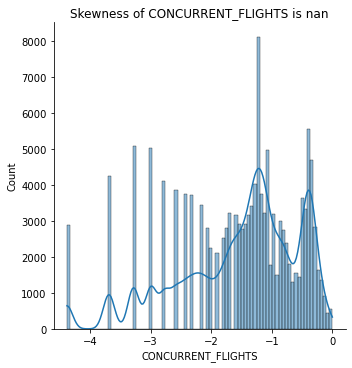

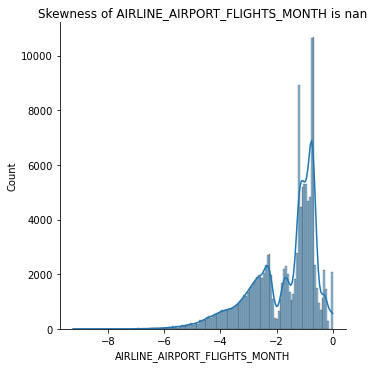

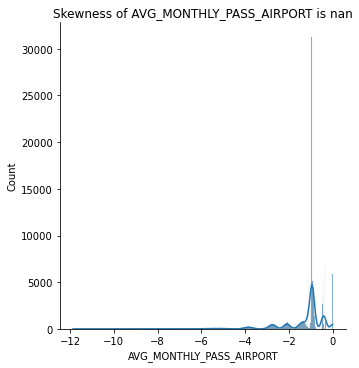

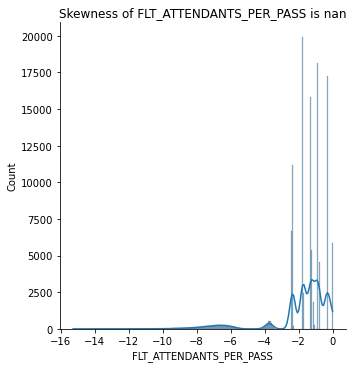

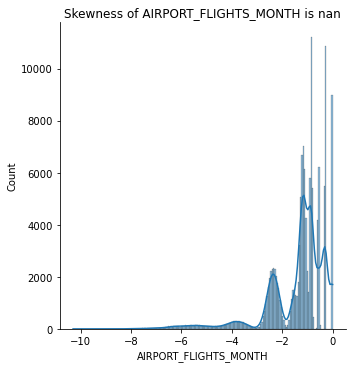

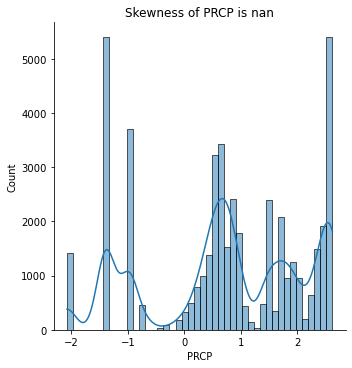

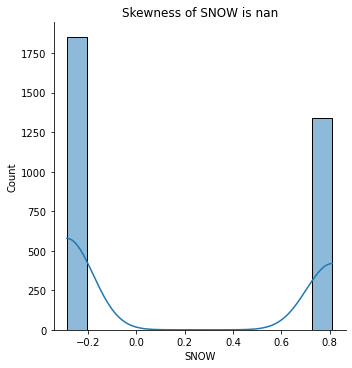

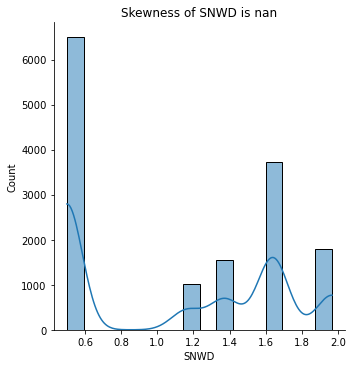

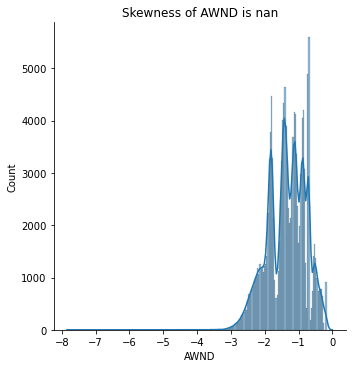

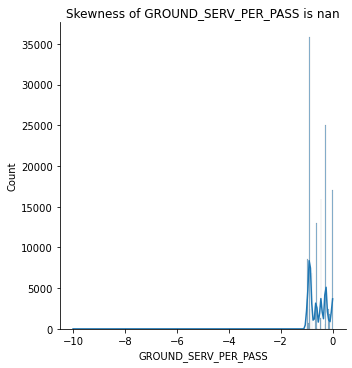

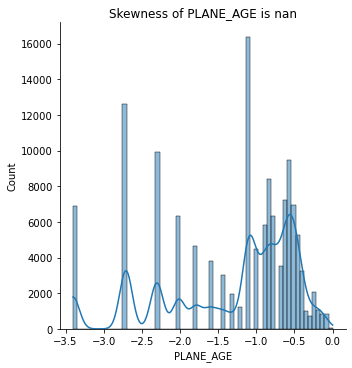

In [133]:
for i in rdf_train.columns:
    sns.displot(data=rdf_train, x=i, kde=True)
    plt.title(f'Skewness of {i} is {rdf_train[i].skew()}')
    plt.show()

In [134]:
rdf_train.isnull().sum()

CONCURRENT_FLIGHTS               0
AIRLINE_AIRPORT_FLIGHTS_MONTH    0
AVG_MONTHLY_PASS_AIRPORT         0
FLT_ATTENDANTS_PER_PASS          0
AIRPORT_FLIGHTS_MONTH            0
PRCP                             0
SNOW                             0
SNWD                             0
AWND                             0
GROUND_SERV_PER_PASS             0
PLANE_AGE                        0
dtype: int64

In [135]:
xtrain_num = pd.concat([ndf_train, ldf_train,
                        rdf_train], axis=1)
xtrain_num.shape

(140000, 15)

In [136]:
xtrain_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140000 entries, 0 to 139999
Data columns (total 15 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   AIRLINE_FLIGHTS_MONTH          140000 non-null  float64
 1   TMAX                           140000 non-null  float64
 2   NUMBER_OF_SEATS                140000 non-null  float64
 3   AVG_MONTHLY_PASS_AIRLINE       140000 non-null  float64
 4   CONCURRENT_FLIGHTS             140000 non-null  float64
 5   AIRLINE_AIRPORT_FLIGHTS_MONTH  140000 non-null  float64
 6   AVG_MONTHLY_PASS_AIRPORT       140000 non-null  float64
 7   FLT_ATTENDANTS_PER_PASS        140000 non-null  float64
 8   AIRPORT_FLIGHTS_MONTH          140000 non-null  float64
 9   PRCP                           140000 non-null  float64
 10  SNOW                           140000 non-null  float64
 11  SNWD                           140000 non-null  float64
 12  AWND                          

In [137]:
xtest_num = pd.concat([ndf_test, ldf_test,
                       rdf_test], axis=1)
xtest_num.shape

(60000, 15)

# Encoding

In [138]:
for i in xtrain_cat.columns:
    print(f'Unique values in {i}: {xtrain_cat[i].unique()}', end='\n\n')

Unique values in DAY_OF_WEEK: [4 3 1 7 5 2 6]

Unique values in DISTANCE_GROUP: [1.0 3.0 2.0 5.0 4.0 6.0 10.0 7.0 8.0 9.0]

Unique values in SEGMENT_NUMBER: [2.0 5.0 3.0 1.0 4.0 6.0 7.0 8.0]

Unique values in CARRIER_NAME: ['Southwest Airlines Co.' 'Atlantic Southeast Airlines' 'Comair Inc.'
 'SkyWest Airlines Inc.' 'United Air Lines Inc.' 'Midwest Airline, Inc.'
 'Mesa Airlines Inc.' 'American Airlines Inc.' 'Delta Air Lines Inc.'
 'JetBlue Airways' 'Alaska Airlines Inc.' 'Spirit Air Lines'
 'Endeavor Air Inc.' 'Frontier Airlines Inc.'
 'American Eagle Airlines Inc.' 'Allegiant Air' 'Hawaiian Airlines Inc.']

Unique values in DEPARTING_AIRPORT: ['Douglas Municipal' 'Detroit Metro Wayne County'
 'Newark Liberty International' 'Port Columbus International'
 'Atlanta Municipal' 'Houston Intercontinental'
 'Phoenix Sky Harbor International' "Chicago O'Hare International"
 'Raleigh-Durham International' 'Austin - Bergstrom International'
 'McCarran International' 'Greenville-Spartanburg'
 

In [139]:
lencodable = ['DAY_OF_WEEK', 'DISTANCE_GROUP', 'SEGMENT_NUMBER']
ohencodable = ['CARRIER_NAME', 'DEPARTING_AIRPORT', 'PREVIOUS_AIRPORT_REGION']
lextrain = xtrain_cat[lencodable]
lextest = xtest_cat[lencodable]
ohxtrain = xtrain_cat[ohencodable]
ohxtest = xtest_cat[ohencodable]

In [140]:
ohxtrain_encoded = pd.get_dummies(ohxtrain, drop_first=True)
ohxtest_encoded = pd.get_dummies(ohxtest, drop_first=True)
ohxtrain_encoded.shape, ohxtest_encoded.shape

((140000, 147), (60000, 147))

In [141]:
ohxtrain_encoded.head()

,CARRIER_NAME_Allegiant Air,CARRIER_NAME_American Airlines Inc.,CARRIER_NAME_American Eagle Airlines Inc.,CARRIER_NAME_Atlantic Southeast Airlines,CARRIER_NAME_Comair Inc.,CARRIER_NAME_Delta Air Lines Inc.,CARRIER_NAME_Endeavor Air Inc.,CARRIER_NAME_Frontier Airlines Inc.,CARRIER_NAME_Hawaiian Airlines Inc.,CARRIER_NAME_JetBlue Airways,CARRIER_NAME_Mesa Airlines Inc.,"CARRIER_NAME_Midwest Airline, Inc.",CARRIER_NAME_SkyWest Airlines Inc.,CARRIER_NAME_Southwest Airlines Co.,CARRIER_NAME_Spirit Air Lines,CARRIER_NAME_United Air Lines Inc.,DEPARTING_AIRPORT_Anchorage International,DEPARTING_AIRPORT_Atlanta Municipal,DEPARTING_AIRPORT_Austin - Bergstrom International,DEPARTING_AIRPORT_Birmingham Airport,DEPARTING_AIRPORT_Boise Air Terminal,DEPARTING_AIRPORT_Bradley International,DEPARTING_AIRPORT_Charleston International,DEPARTING_AIRPORT_Chicago Midway International,DEPARTING_AIRPORT_Chicago O'Hare International,DEPARTING_AIRPORT_Cincinnati/Northern Kentucky International,DEPARTING_AIRPORT_Cleveland-Hopkins International,DEPARTING_AIRPORT_Dallas Fort Worth Regional,DEPARTING_AIRPORT_Dallas Love Field,DEPARTING_AIRPORT_Des Moines Municipal,DEPARTING_AIRPORT_Detroit Metro Wayne County,DEPARTING_AIRPORT_Douglas Municipal,DEPARTING_AIRPORT_El Paso International,DEPARTING_AIRPORT_Eppley Airfield,DEPARTING_AIRPORT_Fort Lauderdale-Hollywood International,DEPARTING_AIRPORT_Friendship International,DEPARTING_AIRPORT_General Mitchell Field,DEPARTING_AIRPORT_Greater Buffalo International,DEPARTING_AIRPORT_Greenville-Spartanburg,DEPARTING_AIRPORT_Hollywood-Burbank Midpoint,DEPARTING_AIRPORT_Honolulu International,DEPARTING_AIRPORT_Houston Intercontinental,DEPARTING_AIRPORT_Indianapolis Muni/Weir Cook,DEPARTING_AIRPORT_Jacksonville International,DEPARTING_AIRPORT_John F. Kennedy International,DEPARTING_AIRPORT_Kansas City International,DEPARTING_AIRPORT_Keahole,DEPARTING_AIRPORT_Kent County,DEPARTING_AIRPORT_LaGuardia,DEPARTING_AIRPORT_Lambert-St. Louis International,DEPARTING_AIRPORT_Logan International,DEPARTING_AIRPORT_Los Angeles International,DEPARTING_AIRPORT_Louis Armstrong New Orleans International,DEPARTING_AIRPORT_McCarran International,DEPARTING_AIRPORT_McGhee Tyson,DEPARTING_AIRPORT_Memphis International,DEPARTING_AIRPORT_Metropolitan Oakland International,DEPARTING_AIRPORT_Miami International,DEPARTING_AIRPORT_Minneapolis-St Paul International,DEPARTING_AIRPORT_Nashville International,DEPARTING_AIRPORT_Newark Liberty International,DEPARTING_AIRPORT_Norfolk International,DEPARTING_AIRPORT_Ontario International,DEPARTING_AIRPORT_Orange County,DEPARTING_AIRPORT_Orlando International,DEPARTING_AIRPORT_Palm Beach International,DEPARTING_AIRPORT_Palm Springs International,DEPARTING_AIRPORT_Philadelphia International,DEPARTING_AIRPORT_Phoenix Sky Harbor International,DEPARTING_AIRPORT_Piedmont Triad International,DEPARTING_AIRPORT_Pittsburgh International,DEPARTING_AIRPORT_Port Columbus International,DEPARTING_AIRPORT_Portland International,DEPARTING_AIRPORT_Raleigh-Durham International,DEPARTING_AIRPORT_Reno/Tahoe International,DEPARTING_AIRPORT_Richmond International,DEPARTING_AIRPORT_Ronald Reagan Washington National,DEPARTING_AIRPORT_Sacramento International,DEPARTING_AIRPORT_Salt Lake City International,DEPARTING_AIRPORT_San Antonio International,DEPARTING_AIRPORT_San Diego International Lindbergh Fl,DEPARTING_AIRPORT_San Francisco International,DEPARTING_AIRPORT_San Jose International,DEPARTING_AIRPORT_Savannah/Hilton Head International,DEPARTING_AIRPORT_Seattle International,DEPARTING_AIRPORT_Southwest Florida International,DEPARTING_AIRPORT_Standiford Field,DEPARTING_AIRPORT_Stapleton International,DEPARTING_AIRPORT_Tampa International,DEPARTING_AIRPORT_Theodore Francis Green State,DEPARTING_AIRPORT_Tucson International,DEPARTING_AIRPORT_Tulsa International,DEPARTING_AIRPORT_Washington Dulles International,DEPARTING_AIRPORT_Will Rogers World,DEPARTING_AIRPORT_William P Hobby,PREVIOUS_AIRPORT_REGION_alabama,PREVIOUS_AIRPORT_REGIO

In [142]:
ohxtest_encoded.head()

,CARRIER_NAME_Allegiant Air,CARRIER_NAME_American Airlines Inc.,CARRIER_NAME_American Eagle Airlines Inc.,CARRIER_NAME_Atlantic Southeast Airlines,CARRIER_NAME_Comair Inc.,CARRIER_NAME_Delta Air Lines Inc.,CARRIER_NAME_Endeavor Air Inc.,CARRIER_NAME_Frontier Airlines Inc.,CARRIER_NAME_Hawaiian Airlines Inc.,CARRIER_NAME_JetBlue Airways,CARRIER_NAME_Mesa Airlines Inc.,"CARRIER_NAME_Midwest Airline, Inc.",CARRIER_NAME_SkyWest Airlines Inc.,CARRIER_NAME_Southwest Airlines Co.,CARRIER_NAME_Spirit Air Lines,CARRIER_NAME_United Air Lines Inc.,DEPARTING_AIRPORT_Anchorage International,DEPARTING_AIRPORT_Atlanta Municipal,DEPARTING_AIRPORT_Austin - Bergstrom International,DEPARTING_AIRPORT_Birmingham Airport,DEPARTING_AIRPORT_Boise Air Terminal,DEPARTING_AIRPORT_Bradley International,DEPARTING_AIRPORT_Charleston International,DEPARTING_AIRPORT_Chicago Midway International,DEPARTING_AIRPORT_Chicago O'Hare International,DEPARTING_AIRPORT_Cincinnati/Northern Kentucky International,DEPARTING_AIRPORT_Cleveland-Hopkins International,DEPARTING_AIRPORT_Dallas Fort Worth Regional,DEPARTING_AIRPORT_Dallas Love Field,DEPARTING_AIRPORT_Des Moines Municipal,DEPARTING_AIRPORT_Detroit Metro Wayne County,DEPARTING_AIRPORT_Douglas Municipal,DEPARTING_AIRPORT_El Paso International,DEPARTING_AIRPORT_Eppley Airfield,DEPARTING_AIRPORT_Fort Lauderdale-Hollywood International,DEPARTING_AIRPORT_Friendship International,DEPARTING_AIRPORT_General Mitchell Field,DEPARTING_AIRPORT_Greater Buffalo International,DEPARTING_AIRPORT_Greenville-Spartanburg,DEPARTING_AIRPORT_Hollywood-Burbank Midpoint,DEPARTING_AIRPORT_Honolulu International,DEPARTING_AIRPORT_Houston Intercontinental,DEPARTING_AIRPORT_Indianapolis Muni/Weir Cook,DEPARTING_AIRPORT_Jacksonville International,DEPARTING_AIRPORT_John F. Kennedy International,DEPARTING_AIRPORT_Kansas City International,DEPARTING_AIRPORT_Keahole,DEPARTING_AIRPORT_Kent County,DEPARTING_AIRPORT_LaGuardia,DEPARTING_AIRPORT_Lambert-St. Louis International,DEPARTING_AIRPORT_Logan International,DEPARTING_AIRPORT_Los Angeles International,DEPARTING_AIRPORT_Louis Armstrong New Orleans International,DEPARTING_AIRPORT_McCarran International,DEPARTING_AIRPORT_McGhee Tyson,DEPARTING_AIRPORT_Memphis International,DEPARTING_AIRPORT_Metropolitan Oakland International,DEPARTING_AIRPORT_Miami International,DEPARTING_AIRPORT_Minneapolis-St Paul International,DEPARTING_AIRPORT_Nashville International,DEPARTING_AIRPORT_Newark Liberty International,DEPARTING_AIRPORT_Norfolk International,DEPARTING_AIRPORT_Ontario International,DEPARTING_AIRPORT_Orange County,DEPARTING_AIRPORT_Orlando International,DEPARTING_AIRPORT_Palm Beach International,DEPARTING_AIRPORT_Palm Springs International,DEPARTING_AIRPORT_Philadelphia International,DEPARTING_AIRPORT_Phoenix Sky Harbor International,DEPARTING_AIRPORT_Piedmont Triad International,DEPARTING_AIRPORT_Pittsburgh International,DEPARTING_AIRPORT_Port Columbus International,DEPARTING_AIRPORT_Portland International,DEPARTING_AIRPORT_Raleigh-Durham International,DEPARTING_AIRPORT_Reno/Tahoe International,DEPARTING_AIRPORT_Richmond International,DEPARTING_AIRPORT_Ronald Reagan Washington National,DEPARTING_AIRPORT_Sacramento International,DEPARTING_AIRPORT_Salt Lake City International,DEPARTING_AIRPORT_San Antonio International,DEPARTING_AIRPORT_San Diego International Lindbergh Fl,DEPARTING_AIRPORT_San Francisco International,DEPARTING_AIRPORT_San Jose International,DEPARTING_AIRPORT_Savannah/Hilton Head International,DEPARTING_AIRPORT_Seattle International,DEPARTING_AIRPORT_Southwest Florida International,DEPARTING_AIRPORT_Standiford Field,DEPARTING_AIRPORT_Stapleton International,DEPARTING_AIRPORT_Tampa International,DEPARTING_AIRPORT_Theodore Francis Green State,DEPARTING_AIRPORT_Tucson International,DEPARTING_AIRPORT_Tulsa International,DEPARTING_AIRPORT_Washington Dulles International,DEPARTING_AIRPORT_Will Rogers World,DEPARTING_AIRPORT_William P Hobby,PREVIOUS_AIRPORT_REGION_alabama,PREVIOUS_AIRPORT_REGIO

In [143]:
lextrain_encoded = pd.DataFrame()
le = LabelEncoder()
lextrain_encoded[lextrain.columns] = lextrain[lextrain.columns].apply(le.fit_transform)
lextrain_encoded.head()

,DAY_OF_WEEK,DISTANCE_GROUP,SEGMENT_NUMBER
32759,3,0,1
28335,3,2,4
36594,2,1,4
160228,3,4,2
132979,2,0,2


In [144]:
lextest_encoded = pd.DataFrame()
le = LabelEncoder()
lextest_encoded[lextest.columns] = lextest[lextest.columns].apply(le.fit_transform)
lextest_encoded.head()

,DAY_OF_WEEK,DISTANCE_GROUP,SEGMENT_NUMBER
54458,2,2,1
118646,4,6,1
57401,5,6,2
115324,3,2,2
71684,3,2,1


In [145]:
xtrain_cat = pd.concat([ohxtrain_encoded, lextrain_encoded], axis=1)
xtrain_cat.shape

(140000, 150)

In [146]:
xtest_cat = pd.concat([ohxtest_encoded, lextest_encoded], axis=1)
xtest_cat.shape

(60000, 150)

In [147]:
xtrain_num.reset_index(drop=True, inplace=True)
xtrain_cat.reset_index(drop=True, inplace=True)
xtest_num.reset_index(drop=True, inplace=True)
xtest_cat.reset_index(drop=True, inplace=True)

In [148]:
xtrain_new = pd.concat([xtrain_num, xtrain_cat], axis=1)
xtrain_new.shape

(140000, 165)

In [149]:
xtest_new = pd.concat([xtest_num, xtest_cat], axis=1)
xtest_new.shape

(60000, 165)

xtrain_new.drop_duplicates(inplace=True)
xtrain_new.shape

In [150]:
xtrain_new.head()

,AIRLINE_FLIGHTS_MONTH,TMAX,NUMBER_OF_SEATS,AVG_MONTHLY_PASS_AIRLINE,CONCURRENT_FLIGHTS,AIRLINE_AIRPORT_FLIGHTS_MONTH,AVG_MONTHLY_PASS_AIRPORT,FLT_ATTENDANTS_PER_PASS,AIRPORT_FLIGHTS_MONTH,PRCP,SNOW,SNWD,AWND,GROUND_SERV_PER_PASS,PLANE_AGE,CARRIER_NAME_Allegiant Air,CARRIER_NAME_American Airlines Inc.,CARRIER_NAME_American Eagle Airlines Inc.,CARRIER_NAME_Atlantic Southeast Airlines,CARRIER_NAME_Comair Inc.,CARRIER_NAME_Delta Air Lines Inc.,CARRIER_NAME_Endeavor Air Inc.,CARRIER_NAME_Frontier Airlines Inc.,CARRIER_NAME_Hawaiian Airlines Inc.,CARRIER_NAME_JetBlue Airways,CARRIER_NAME_Mesa Airlines Inc.,"CARRIER_NAME_Midwest Airline, Inc.",CARRIER_NAME_SkyWest Airlines Inc.,CARRIER_NAME_Southwest Airlines Co.,CARRIER_NAME_Spirit Air Lines,CARRIER_NAME_United Air Lines Inc.,DEPARTING_AIRPORT_Anchorage International,DEPARTING_AIRPORT_Atlanta Municipal,DEPARTING_AIRPORT_Austin - Bergstrom International,DEPARTING_AIRPORT_Birmingham Airport,DEPARTING_AIRPORT_Boise Air Terminal,DEPARTING_AIRPORT_Bradley International,DEPARTING_AIRPORT_Charleston International,DEPARTING_AIRPORT_Chicago Midway International,DEPARTING_AIRPORT_Chicago O'Hare International,DEPARTING_AIRPORT_Cincinnati/Northern Kentucky International,DEPARTING_AIRPORT_Cleveland-Hopkins International,DEPARTING_AIRPORT_Dallas Fort Worth Regional,DEPARTING_AIRPORT_Dallas Love Field,DEPARTING_AIRPORT_Des Moines Municipal,DEPARTING_AIRPORT_Detroit Metro Wayne County,DEPARTING_AIRPORT_Douglas Municipal,DEPARTING_AIRPORT_El Paso International,DEPARTING_AIRPORT_Eppley Airfield,DEPARTING_AIRPORT_Fort Lauderdale-Hollywood International,DEPARTING_AIRPORT_Friendship International,DEPARTING_AIRPORT_General Mitchell Field,DEPARTING_AIRPORT_Greater Buffalo International,DEPARTING_AIRPORT_Greenville-Spartanburg,DEPARTING_AIRPORT_Hollywood-Burbank Midpoint,DEPARTING_AIRPORT_Honolulu International,DEPARTING_AIRPORT_Houston Intercontinental,DEPARTING_AIRPORT_Indianapolis Muni/Weir Cook,DEPARTING_AIRPORT_Jacksonville International,DEPARTING_AIRPORT_John F. Kennedy International,DEPARTING_AIRPORT_Kansas City International,DEPARTING_AIRPORT_Keahole,DEPARTING_AIRPORT_Kent County,DEPARTING_AIRPORT_LaGuardia,DEPARTING_AIRPORT_Lambert-St. Louis International,DEPARTING_AIRPORT_Logan International,DEPARTING_AIRPORT_Los Angeles International,DEPARTING_AIRPORT_Louis Armstrong New Orleans International,DEPARTING_AIRPORT_McCarran International,DEPARTING_AIRPORT_McGhee Tyson,DEPARTING_AIRPORT_Memphis International,DEPARTING_AIRPORT_Metropolitan Oakland International,DEPARTING_AIRPORT_Miami International,DEPARTING_AIRPORT_Minneapolis-St Paul International,DEPARTING_AIRPORT_Nashville International,DEPARTING_AIRPORT_Newark Liberty International,DEPARTING_AIRPORT_Norfolk International,DEPARTING_AIRPORT_Ontario International,DEPARTING_AIRPORT_Orange County,DEPARTING_AIRPORT_Orlando International,DEPARTING_AIRPORT_Palm Beach International,DEPARTING_AIRPORT_Palm Springs International,DEPARTING_AIRPORT_Philadelphia International,DEPARTING_AIRPORT_Phoenix Sky Harbor International,DEPARTING_AIRPORT_Piedmont Triad International,DEPARTING_AIRPORT_Pittsburgh International,DEPARTING_AIRPORT_Port Columbus International,DEPARTING_AIRPORT_Portland International,DEPARTING_AIRPORT_Raleigh-Durham International,DEPARTING_AIRPORT_Reno/Tahoe International,DEPARTING_AIRPORT_Richmond International,DEPARTING_AIRPORT_Ronald Reagan Washington National,DEPARTING_AIRPORT_Sacramento International,DEPARTING_AIRPORT_Salt Lake City International,DEPARTING_AIRPORT_San Antonio International,DEPARTING_AIRPORT_San Diego International Lindbergh Fl,DEPARTING_AIRPORT_San Francisco International,DEPARTING_AIRPORT_San Jose International,DEPARTING_AIRPORT_Savannah/Hilton Head International,DEPARTING_AIRPORT_Seattle International,DEPARTING_AIRPORT_Southwest Florida International,DEPARTING_AIRPORT_Standiford Field,DEPARTING_AIRPORT_Stapleton International,DEPARTING_AIRPORT_Tampa International,DEPARTING_AIRPORT_Theodore Francis Green State,DEPARTING_AI

In [151]:
xtest_new.head()

,AIRLINE_FLIGHTS_MONTH,TMAX,NUMBER_OF_SEATS,AVG_MONTHLY_PASS_AIRLINE,CONCURRENT_FLIGHTS,AIRLINE_AIRPORT_FLIGHTS_MONTH,AVG_MONTHLY_PASS_AIRPORT,FLT_ATTENDANTS_PER_PASS,AIRPORT_FLIGHTS_MONTH,PRCP,SNOW,SNWD,AWND,GROUND_SERV_PER_PASS,PLANE_AGE,CARRIER_NAME_Allegiant Air,CARRIER_NAME_American Airlines Inc.,CARRIER_NAME_American Eagle Airlines Inc.,CARRIER_NAME_Atlantic Southeast Airlines,CARRIER_NAME_Comair Inc.,CARRIER_NAME_Delta Air Lines Inc.,CARRIER_NAME_Endeavor Air Inc.,CARRIER_NAME_Frontier Airlines Inc.,CARRIER_NAME_Hawaiian Airlines Inc.,CARRIER_NAME_JetBlue Airways,CARRIER_NAME_Mesa Airlines Inc.,"CARRIER_NAME_Midwest Airline, Inc.",CARRIER_NAME_SkyWest Airlines Inc.,CARRIER_NAME_Southwest Airlines Co.,CARRIER_NAME_Spirit Air Lines,CARRIER_NAME_United Air Lines Inc.,DEPARTING_AIRPORT_Anchorage International,DEPARTING_AIRPORT_Atlanta Municipal,DEPARTING_AIRPORT_Austin - Bergstrom International,DEPARTING_AIRPORT_Birmingham Airport,DEPARTING_AIRPORT_Boise Air Terminal,DEPARTING_AIRPORT_Bradley International,DEPARTING_AIRPORT_Charleston International,DEPARTING_AIRPORT_Chicago Midway International,DEPARTING_AIRPORT_Chicago O'Hare International,DEPARTING_AIRPORT_Cincinnati/Northern Kentucky International,DEPARTING_AIRPORT_Cleveland-Hopkins International,DEPARTING_AIRPORT_Dallas Fort Worth Regional,DEPARTING_AIRPORT_Dallas Love Field,DEPARTING_AIRPORT_Des Moines Municipal,DEPARTING_AIRPORT_Detroit Metro Wayne County,DEPARTING_AIRPORT_Douglas Municipal,DEPARTING_AIRPORT_El Paso International,DEPARTING_AIRPORT_Eppley Airfield,DEPARTING_AIRPORT_Fort Lauderdale-Hollywood International,DEPARTING_AIRPORT_Friendship International,DEPARTING_AIRPORT_General Mitchell Field,DEPARTING_AIRPORT_Greater Buffalo International,DEPARTING_AIRPORT_Greenville-Spartanburg,DEPARTING_AIRPORT_Hollywood-Burbank Midpoint,DEPARTING_AIRPORT_Honolulu International,DEPARTING_AIRPORT_Houston Intercontinental,DEPARTING_AIRPORT_Indianapolis Muni/Weir Cook,DEPARTING_AIRPORT_Jacksonville International,DEPARTING_AIRPORT_John F. Kennedy International,DEPARTING_AIRPORT_Kansas City International,DEPARTING_AIRPORT_Keahole,DEPARTING_AIRPORT_Kent County,DEPARTING_AIRPORT_LaGuardia,DEPARTING_AIRPORT_Lambert-St. Louis International,DEPARTING_AIRPORT_Logan International,DEPARTING_AIRPORT_Los Angeles International,DEPARTING_AIRPORT_Louis Armstrong New Orleans International,DEPARTING_AIRPORT_McCarran International,DEPARTING_AIRPORT_McGhee Tyson,DEPARTING_AIRPORT_Memphis International,DEPARTING_AIRPORT_Metropolitan Oakland International,DEPARTING_AIRPORT_Miami International,DEPARTING_AIRPORT_Minneapolis-St Paul International,DEPARTING_AIRPORT_Nashville International,DEPARTING_AIRPORT_Newark Liberty International,DEPARTING_AIRPORT_Norfolk International,DEPARTING_AIRPORT_Ontario International,DEPARTING_AIRPORT_Orange County,DEPARTING_AIRPORT_Orlando International,DEPARTING_AIRPORT_Palm Beach International,DEPARTING_AIRPORT_Palm Springs International,DEPARTING_AIRPORT_Philadelphia International,DEPARTING_AIRPORT_Phoenix Sky Harbor International,DEPARTING_AIRPORT_Piedmont Triad International,DEPARTING_AIRPORT_Pittsburgh International,DEPARTING_AIRPORT_Port Columbus International,DEPARTING_AIRPORT_Portland International,DEPARTING_AIRPORT_Raleigh-Durham International,DEPARTING_AIRPORT_Reno/Tahoe International,DEPARTING_AIRPORT_Richmond International,DEPARTING_AIRPORT_Ronald Reagan Washington National,DEPARTING_AIRPORT_Sacramento International,DEPARTING_AIRPORT_Salt Lake City International,DEPARTING_AIRPORT_San Antonio International,DEPARTING_AIRPORT_San Diego International Lindbergh Fl,DEPARTING_AIRPORT_San Francisco International,DEPARTING_AIRPORT_San Jose International,DEPARTING_AIRPORT_Savannah/Hilton Head International,DEPARTING_AIRPORT_Seattle International,DEPARTING_AIRPORT_Southwest Florida International,DEPARTING_AIRPORT_Standiford Field,DEPARTING_AIRPORT_Stapleton International,DEPARTING_AIRPORT_Tampa International,DEPARTING_AIRPORT_Theodore Francis Green State,DEPARTING_AI

In [152]:
xtrain_new.to_csv("xtest.csv", index=False)
xtest_new.to_csv("xtrain.csv", index=False)
ytrain.to_csv("ytrain.csv", index=False)
ytest.to_csv("ytest.csv", index=False)